# SDA: Project

**Name**: Nitai Nijholt

**Student ID**: 12709018

In [127]:
#loading the Twitter sentiment dataset

In [128]:
import pandas as pd
import numpy as np
import sklearn as sk
import os
import matplotlib.pyplot as plt
import datetime
import yfinance as yf
import sys
from datetime import datetime as dt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import VAR, VARMAX
from scipy.stats import pearsonr
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import het_arch
from scipy.stats import kstest


In [129]:
#returning the filenames

dirname = 'C:\\Users\\Nitai Nijholt\\OneDrive\\Desktop\\Scientific Data Analaysis Uva Course\\Project\\'
filenames = os.listdir(dirname)
filenames


['companiesmarketcap.com - Companies ranked by Market Cap - CompaniesMarketCap.com.csv',
 'tweets_labelled_09042020_16072020.csv',
 'tweets_remaining_09042020_16072020.csv',
 'us_equities_news_dataset.csv']

In [130]:
# Twitter sentiment data about stocks, labeled: 'tweets_labelled_09042020_16072020.csv',
# reference to dataset: https://www.kaggle.com/datasets/utkarshxy/stock-markettweets-lexicon-data

twitter_sentiment_data_labled = pd.read_csv(dirname + filenames[1], sep=';',error_bad_lines=False )

df = twitter_sentiment_data_labled

C:\Users\Nitai Nijholt\AppData\Local\Temp\ipykernel_32348\3568267276.py:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  twitter_sentiment_data_labled = pd.read_csv(dirname + filenames[1], sep=';',error_bad_lines=False )


In [131]:
twitter_sentiment_data_labled.shape

(5000, 4)

In [132]:
df.columns

Index(['id', 'created_at', 'text', 'sentiment'], dtype='object')

In [133]:
#data cleaning



In [134]:
df[df['sentiment'].isnull()]

id                 created_at  \
1300  254563  2020-04-29 01:57:02+00:00   
1301  280832  2020-05-05 17:58:44+00:00   
1302  672447  2020-06-26 15:29:14+00:00   
1303  146759  2020-04-21 11:53:54+00:00   
1304  116538  2020-04-19 23:34:14+00:00   
...      ...                        ...   
4995  411380  2020-06-04 18:14:57+00:00   
4996   62318  2020-04-14 02:15:01+00:00   
4997  627230  2020-06-23 14:08:15+00:00   
4998  890123  2020-07-14 23:18:34+00:00   
4999  301411  2020-05-06 04:22:19+00:00   

                                                   text sentiment  
1300  - @investbamboo get $ share on Bamboo then. [ ...       NaN  
1301  H&amp;S just formed on 4h chart $spx $spy http...       NaN  
1302               @EddyElfenbein what happened to $FB?       NaN  
1303  RT @CHItraders: $AAPL expands services busines...       NaN  
1304  RT @Lakshmi_888: #SPX $SPX #ES_F $NQ $RUT #DAX...       NaN  
...                                                 ...       ...  
4995  With ad revenues falling, what’s the impact on...       NaN  
4996  RT @KelvinSCWong: Well another point to add to...       NaN  
4997  $ITOX working on a contract with a fortune 500...       NaN  
4998  $DIS it could break the 120 pin, then 125&gt; ...       NaN  
4999  Amedisys Inc $AMED COO Christopher Gerard Sell...       NaN  

[3700 rows x 4 columns]

In [135]:
df[df['sentiment'].notnull()]


id                 created_at  \
0      77522  2020-04-15 01:03:46+00:00   
1     661634  2020-06-25 06:20:06+00:00   
2     413231  2020-06-04 15:41:45+00:00   
3     760262  2020-07-03 19:39:35+00:00   
4     830153  2020-07-09 14:39:14+00:00   
...      ...                        ...   
1295   75519  2020-04-15 06:00:10+00:00   
1296  739234  2020-07-01 11:29:10+00:00   
1297  254379  2020-04-29 02:21:50+00:00   
1298  580441  2020-06-19 17:56:57+00:00   
1299  625070  2020-06-23 15:47:11+00:00   

                                                   text sentiment  
0     RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...  positive  
1     #SriLanka surcharge on fuel removed!\n⛽📉\nThe ...  negative  
2     Net issuance increases to fund fiscal programs...  positive  
3     RT @bentboolean: How much of Amazon's traffic ...  positive  
4     $AMD Ryzen 4000 desktop CPUs looking ‘great’ a...  positive  
...                                                 ...       ...  
1295  #stocks back from the recovery room: https://t...  positive  
1296  RT @MacroCharts: Breadth – expanding last week...  positive  
1297  RT @MawsonResource: Rompas-Rajapalot: A Big Ne...   neutral  
1298  $AAPL $QQQ Top may now be in. https://t.co/iNK...  positive  
1299  GLG Partners LP short position in HILTON FOOD ...  negative  

[1300 rows x 4 columns]

We can see the first 1300 rows have sentiment data, so we quantify the sentiment data for only these rows

In [136]:
subset_data_with_sentiment = df.iloc[0:1300]

In [137]:
subset_data_with_sentiment.shape
df = subset_data_with_sentiment
# shape looks good

In [138]:
#positive

list_of_sentiment = []
list_of_rows_without_sentiment =[]
for i in df[ 'sentiment']:
    if i == 'positive':
        list_of_sentiment.append(1)
    if i == 'neutral':
        list_of_sentiment.append(0)
    if i == 'negative':
        list_of_sentiment.append(-1)
    
        



In [139]:
df['quantitative sentiment'] = list_of_sentiment

C:\Users\Nitai Nijholt\AppData\Local\Temp\ipykernel_32348\3881601052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['quantitative sentiment'] = list_of_sentiment


In [140]:
df

id                 created_at  \
0      77522  2020-04-15 01:03:46+00:00   
1     661634  2020-06-25 06:20:06+00:00   
2     413231  2020-06-04 15:41:45+00:00   
3     760262  2020-07-03 19:39:35+00:00   
4     830153  2020-07-09 14:39:14+00:00   
...      ...                        ...   
1295   75519  2020-04-15 06:00:10+00:00   
1296  739234  2020-07-01 11:29:10+00:00   
1297  254379  2020-04-29 02:21:50+00:00   
1298  580441  2020-06-19 17:56:57+00:00   
1299  625070  2020-06-23 15:47:11+00:00   

                                                   text sentiment  \
0     RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...  positive   
1     #SriLanka surcharge on fuel removed!\n⛽📉\nThe ...  negative   
2     Net issuance increases to fund fiscal programs...  positive   
3     RT @bentboolean: How much of Amazon's traffic ...  positive   
4     $AMD Ryzen 4000 desktop CPUs looking ‘great’ a...  positive   
...                                                 ...       ...   
1295  #stocks back from the recovery room: https://t...  positive   
1296  RT @MacroCharts: Breadth – expanding last week...  positive   
1297  RT @MawsonResource: Rompas-Rajapalot: A Big Ne...   neutral   
1298  $AAPL $QQQ Top may now be in. https://t.co/iNK...  positive   
1299  GLG Partners LP short position in HILTON FOOD ...  negative   

      quantitative sentiment  
0                          1  
1                         -1  
2                          1  
3                          1  
4                          1  
...                      ...  
1295                       1  
1296                       1  
1297                       0  
1298                       1  
1299                      -1  

[1300 rows x 5 columns]

In [141]:
    # FINANCIAL NEWS 
news = pd.read_csv('C:\\Users\\Nitai Nijholt\\OneDrive\\Desktop\\Scientific Data Analaysis Uva Course\\Project\\us_equities_news_dataset.csv')

    # TOP 7106 COMPANIES BY MARKET CAP
market = pd.read_csv('C:\\Users\\Nitai Nijholt\\OneDrive\\Desktop\\Scientific Data Analaysis Uva Course\\Project\\companiesmarketcap.com - Companies ranked by Market Cap - CompaniesMarketCap.com.csv')

In [142]:
# FIND MOST FREQUENTLY MENTIONED TICKERS
tickers = news['ticker'].value_counts()
tick_mc = market[['Rank','Symbol','marketcap']]
tick_an = pd.DataFrame({'Symbol':list(tickers.index),'Article_n':list(tickers)})
# tick_mc_an = tick_mc.merge(tick_an, on = 'Symbol').head(n=20).sort_values(by= 'Article_n', ascending= False)
tick_mc_an = tick_mc.merge(tick_an, on = 'Symbol').head(n=20).sort_values(by= 'Article_n', ascending= False)
tick_mc_an.head(n = 20)


Rank Symbol      marketcap  Article_n
0      1   AAPL  2245746491392      20231
1      3   MSFT  1791532859392       8110
16    25    BAC   296829911040       7409
2      5   AMZN   942841135104       6330
3      7   TSLA   562562130000       4283
6     10    XOM   455235764224       2831
9     14    JPM   400557768704       2600
19    32     KO   270195392512       1367
8     12    WMT   415197298688       1267
11    17    CVX   350046846976       1105
5      9    JNJ   460383748096        763
15    23     HD   322023260160        614
13    20     PG   344743968768        584
18    30    MRK   275952926720        575
17    29    PFE   277802713088        545
12    19    LLY   345817284608        469
10    15   NVDA   389723881472        415
14    21     MA   329905766400        378
4      8    UNH   493336264704        327
7     11      V   442776518656        193

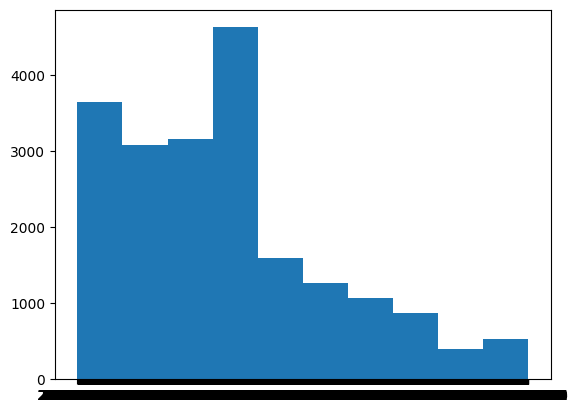

In [143]:
apple_data = news[news['ticker'] == 'AAPL']
plt.hist(apple_data['release_date'])
plt.xticks()

max(apple_data['release_date'])[8:10]
date_max = datetime.date(int(max(apple_data['release_date'])[0:4]),int(max(apple_data['release_date'])[5:7]),int(max(apple_data['release_date'])[8:10]))
date_min = datetime.date(int(min(apple_data['release_date'])[0:4]),int(min(apple_data['release_date'])[5:7]),int(min(apple_data['release_date'])[8:10]))

In [144]:
top_20_ranked_stocks_by_article_count = tick_mc_an.loc[:,"Symbol"].head(20)
top_20_ranked_stocks_by_article_count

0     AAPL
1     MSFT
16     BAC
2     AMZN
3     TSLA
6      XOM
9      JPM
19      KO
8      WMT
11     CVX
5      JNJ
15      HD
13      PG
18     MRK
17     PFE
12     LLY
10    NVDA
14      MA
4      UNH
7        V
Name: Symbol, dtype: object

In [145]:
top_20_ranked_stocks_by_article_count = top_20_ranked_stocks_by_article_count.astype(str).values.tolist()

In [146]:
top_20_ranked_stocks_by_article_count

['AAPL',
 'MSFT',
 'BAC',
 'AMZN',
 'TSLA',
 'XOM',
 'JPM',
 'KO',
 'WMT',
 'CVX',
 'JNJ',
 'HD',
 'PG',
 'MRK',
 'PFE',
 'LLY',
 'NVDA',
 'MA',
 'UNH',
 'V']

In [147]:
msft = yf.Ticker("MSFT")

In [148]:
hist = msft.history(period="5d")

In [149]:
hist

Open        High         Low       Close  \
Date                                                                        
2022-12-05 00:00:00-05:00  252.009995  253.820007  248.059998  250.199997   
2022-12-06 00:00:00-05:00  250.820007  251.860001  243.779999  245.119995   
2022-12-07 00:00:00-05:00  244.830002  246.160004  242.210007  244.369995   
2022-12-08 00:00:00-05:00  244.839996  248.740005  243.059998  247.399994   
2022-12-09 00:00:00-05:00  244.699997  248.309998  244.160004  245.419998   

                             Volume  Dividends  Stock Splits  
Date                                                          
2022-12-05 00:00:00-05:00  23435300          0             0  
2022-12-06 00:00:00-05:00  22463700          0             0  
2022-12-07 00:00:00-05:00  20481500          0             0  
2022-12-08 00:00:00-05:00  22611800          0             0  
2022-12-09 00:00:00-05:00  20607100          0             0

In [150]:
# downloaded_stock_data = yf.download(top_10_ranked_stocks_by_marketcap_str, start="2011-01-01", end="2019-12-31", group_by="ticker")

In [151]:
dataframe_stock_data = pd.read_csv(r'C:\Users\Nitai Nijholt\OneDrive\Documents\GitHub\Project_SDA\Data\stock_data.csv')

In [152]:
dataframe_stock_data.columns

Index(['Unnamed: 0', 'CVX', 'CVX.1', 'CVX.2', 'CVX.3', 'CVX.4', 'CVX.5',
       'NVDA', 'NVDA.1', 'NVDA.2',
       ...
       'AMZN.2', 'AMZN.3', 'AMZN.4', 'AMZN.5', 'V', 'V.1', 'V.2', 'V.3', 'V.4',
       'V.5'],
      dtype='object', length=121)

In [153]:
# we only need the .4 as this is the column that holds the adjusted close, so making this loop to mask the dataframe

for i in range(len(top_20_ranked_stocks_by_article_count)):
    top_20_ranked_stocks_by_article_count[i] = top_20_ranked_stocks_by_article_count[i] +'.4'
top_20_ranked_stocks_by_article_count

['AAPL.4',
 'MSFT.4',
 'BAC.4',
 'AMZN.4',
 'TSLA.4',
 'XOM.4',
 'JPM.4',
 'KO.4',
 'WMT.4',
 'CVX.4',
 'JNJ.4',
 'HD.4',
 'PG.4',
 'MRK.4',
 'PFE.4',
 'LLY.4',
 'NVDA.4',
 'MA.4',
 'UNH.4',
 'V.4']

In [154]:

column_indexer_adjusted_close_only = top_20_ranked_stocks_by_article_count

In [155]:
dataframe_stock_data["Date"] = dataframe_stock_data["Unnamed: 0"]
dataframe_stock_data.columns

Index(['Unnamed: 0', 'CVX', 'CVX.1', 'CVX.2', 'CVX.3', 'CVX.4', 'CVX.5',
       'NVDA', 'NVDA.1', 'NVDA.2',
       ...
       'AMZN.3', 'AMZN.4', 'AMZN.5', 'V', 'V.1', 'V.2', 'V.3', 'V.4', 'V.5',
       'Date'],
      dtype='object', length=122)

In [156]:
#dropping first two rows

dataframe_stock_data_selected_stocks = dataframe_stock_data[column_indexer_adjusted_close_only].loc[2:,:]
#renaming date column to be a date

dataframe_stock_data_selected_stocks

AAPL.4              MSFT.4               BAC.4  \
2       10.0332612991333  21.856332778930664  12.012041091918945   
3     10.085627555847168    21.9422550201416  12.054369926452637   
4      10.16812801361084    21.8719539642334  12.274459838867188   
5     10.159910202026367  22.512489318847656  12.223673820495605   
6     10.232666969299316  22.340635299682617  12.062838554382324   
...                  ...                 ...                 ...   
2260    69.5571060180664  153.03126525878906   33.03183364868164   
2261   69.62322235107422   153.0020751953125  33.078800201416016   
2262   71.00457000732422   154.2561798095703  33.360565185546875   
2263   70.97764587402344  154.53814697265625  33.200889587402344   
2264   71.39889526367188  153.20620727539062   33.01305389404297   

                 AMZN.4              TSLA.4               XOM.4  \
2     9.211000442504883  1.7746670246124268   46.50217056274414   
3     9.250499725341797   1.777999997138977  46.720497131347656   
4     9.371000289916992  1.7886669635772705  46.595733642578125   
5     9.293000221252441   1.858667016029358    46.8951530456543   
6     9.274499893188477  1.8826669454574585   47.15089416503906   
...                 ...                 ...                 ...   
2260   89.6500015258789  27.947999954223633  58.981143951416016   
2261  89.46050262451172  28.350000381469727   58.75456237792969   
2262   93.4384994506836  28.729333877563477   58.84687042236328   
2263  93.48999786376953  28.691999435424805   58.64549255371094   
2264  92.34449768066406   27.64666748046875  58.301448822021484   

                   JPM.4                KO.4               WMT.4  \
2     31.384624481201172  22.505250930786133   41.66514587402344   
3     31.838842391967773  22.039405822753906   41.82551574707031   
4      32.22818374633789   21.90827751159668  41.550594329833984   
5      32.06956100463867  21.749547958374023  41.206966400146484   
6      31.46392822265625  21.711589813232422   41.29860305786133   
...                  ...                 ...                 ...   
2260  125.19734954833984  49.991432189941406  113.88716888427734   
2261  125.54412841796875   49.80934143066406  114.34645080566406   
2262  126.87639617919922  50.091583251953125  114.35600280761719   
2263  126.96766662597656   50.39202117919922  114.42298126220703   
2264  126.50225067138672   50.31918716430664  114.24119567871094   

                   CVX.4               JNJ.4                HD.4  \
2      57.01817321777344   44.52234649658203  26.823223114013672   
3      56.80732345581055  44.897972106933594  26.337039947509766   
4      56.70808410644531  44.869625091552734   26.25349235534668   
5      56.24293899536133   44.79874801635742   26.14712905883789   
6     56.553035736083984  44.366432189941406   26.11674690246582   
...                  ...                 ...                 ...   
2260   104.4437026977539  135.49964904785156  204.62692260742188   
2261  104.45237731933594  135.02774047851562     205.98974609375   
2262  104.67803955078125  134.93521118164062   206.1298065185547   
2263  104.41765594482422  134.86122131347656   205.3363494873047   
2264   104.0270767211914  134.44480895996094  202.85330200195312   

                    PG.4               MRK.4               PFE.4  \
2      45.26420974731445   23.10027313232422  10.830879211425781   
3      45.39000701904297  23.298973083496094  11.020782470703125   
4      45.28517532348633  23.433578491210938  11.094297409057617   
5      45.20829772949219   23.75405502319336  11.137179374694824   
6      45.07553482055664      23.93994140625   11.23519515991211   
...                  ...                 ...                 ...   
2260  116.01876831054688   79.84685516357422  33.406890869140625   
2261   116.3160171508789   79.58573913574219   33.38139724731445   
2262   116.3160171508789   79.49871826171875   33.45787048339844   
2263   117.1241455078125   79.63796997070312  33.406890869140625   
2264  115.6193

In [157]:
dataframe_stock_data = dataframe_stock_data.loc[2:,:]
dataframe_stock_data

Unnamed: 0                 CVX               CVX.1               CVX.2  \
2     2011-01-03   91.66000366210938   92.37999725341797   91.30000305175781   
3     2011-01-04   92.27999877929688    92.4800033569336   91.22000122070312   
4     2011-01-05   90.91999816894531   92.06999969482422                90.5   
5     2011-01-06   91.76000213623047   91.83000183105469    90.2699966430664   
6     2011-01-07    90.9800033569336   91.30000305175781    90.2699966430664   
...          ...                 ...                 ...                 ...   
2260  2019-12-23  119.30999755859375   120.4000015258789   119.1500015258789   
2261  2019-12-24  120.43000030517578  120.77999877929688  120.08999633789062   
2262  2019-12-26  120.66999816894531  121.41999816894531  120.33999633789062   
2263  2019-12-27  120.88999938964844  121.29000091552734  120.23999786376953   
2264  2019-12-30  120.44000244140625  121.33999633789062  119.80999755859375   

                   CVX.3               CVX.4    CVX.5                NVDA  \
2      91.94000244140625   57.01817321777344  7802300   3.880000114440918   
3       91.5999984741211   56.80732345581055  8513900  3.9625000953674316   
4      91.44000244140625   56.70808410644531  6659500   4.014999866485596   
5      90.69000244140625   56.24293899536133  6220800   4.355000019073486   
6      91.19000244140625  56.553035736083984  6346300   4.777500152587891   
...                  ...                 ...      ...                 ...   
2260  120.33000183105469   104.4437026977539  5875000  60.130001068115234   
2261  120.33999633789062  104.45237731933594  1640100   59.54999923706055   
2262   120.5999984741211  104.67803955078125  3648600  59.689998626708984   
2263  120.30000305175781  104.41765594482422  4138300   59.95000076293945   
2264   119.8499984741211   104.0270767211914  4580200  58.997501373291016   

                  NVDA.1              NVDA.2  ...             AMZN.3  \
2      3.992500066757202               3.875  ...  9.211000442504883   
3     3.9800000190734863  3.8550000190734863  ...  9.250499725341797   
4                   4.25  3.9749999046325684  ...  9.371000289916992   
5      4.835000038146973    4.34250020980835  ...  9.293000221252441   
6      4.982500076293945   4.670000076293945  ...  9.274499893188477   
...                  ...                 ...  ...                ...   
2260   60.45249938964844   59.59749984741211  ...   89.6500015258789   
2261   59.82749938964844   59.20500183105469  ...  89.46050262451172   
2262   60.08000183105469                59.5  ...   93.4384994506836   
2263  60.084999084472656   58.95249938964844  ...  93.48999786376953   
2264   59.04999923706055   57.76499938964844  ...  92.34449768066406   

                 AMZN.4     AMZN.5                   V                 V.1  \
2     9.211000442504883  106628000  17.600000381469727  17.729999542236328   
3     9.250499725341797  100636000  17.732500076293945  17.737499237060547   
4     9.371000289916992   68376000  17.709999084472656  18.082500457763672   
5     9.293000221252441   63594000    18.1825008392334  18.387500762939453   
6     9.274499893188477  104434000  18.360000610351562  18.387500762939453   
...                 ...        ...                 ...                 ...   
2260   89.6500015258789   42728000  188.14999389648438  188.41000366210938   
2261  89.46050262451172   17626000  187.10000610351562  188.02000427246094   
2262   93.4384994506836  120108000  187.88999938964844  189.17999267578125   
2263  93.48999786376953  123732000  189.74000549316406  189.88999938964844   
2264  92.34449768066406   73494000  189.30999755859375  189.47999572753906   

                     V.2                 V.3                 V.4       V.5  \
2     17.547500610351562    17.6299991607666  16.184938430786133  25710000   
3     17.565000534057617  17.649999618530273   16.20330047607422  18138000   
4     17.670000076293945  18.022499084472656  16.545263290405273  38512800   
5     

In [158]:

#casting the date column as a date
dataframe_stock_data_selected_stocks['Date'] = [dt.strptime(str(d), "%Y-%m-%d").date() for d in dataframe_stock_data["Unnamed: 0"]]


In [159]:

dataframe_stock_data_selected_stocks.columns

Index(['AAPL.4', 'MSFT.4', 'BAC.4', 'AMZN.4', 'TSLA.4', 'XOM.4', 'JPM.4',
       'KO.4', 'WMT.4', 'CVX.4', 'JNJ.4', 'HD.4', 'PG.4', 'MRK.4', 'PFE.4',
       'LLY.4', 'NVDA.4', 'MA.4', 'UNH.4', 'V.4', 'Date'],
      dtype='object')

In [160]:
#date column is at the last index of columns, so reinndexing to put it at the first

dataframe_stock_data_selected_stocks = dataframe_stock_data_selected_stocks[['Date','AAPL.4', 'MSFT.4', 'BAC.4', 'AMZN.4', 'TSLA.4', 'XOM.4', 'JPM.4',
       'KO.4', 'WMT.4', 'CVX.4', 'JNJ.4', 'HD.4', 'PG.4', 'MRK.4', 'PFE.4',
       'LLY.4', 'NVDA.4', 'MA.4', 'UNH.4', 'V.4']]

In [161]:
dataframe_stock_data_selected_stocks

Date              AAPL.4              MSFT.4               BAC.4  \
2     2011-01-03    10.0332612991333  21.856332778930664  12.012041091918945   
3     2011-01-04  10.085627555847168    21.9422550201416  12.054369926452637   
4     2011-01-05   10.16812801361084    21.8719539642334  12.274459838867188   
5     2011-01-06  10.159910202026367  22.512489318847656  12.223673820495605   
6     2011-01-07  10.232666969299316  22.340635299682617  12.062838554382324   
...          ...                 ...                 ...                 ...   
2260  2019-12-23    69.5571060180664  153.03126525878906   33.03183364868164   
2261  2019-12-24   69.62322235107422   153.0020751953125  33.078800201416016   
2262  2019-12-26   71.00457000732422   154.2561798095703  33.360565185546875   
2263  2019-12-27   70.97764587402344  154.53814697265625  33.200889587402344   
2264  2019-12-30   71.39889526367188  153.20620727539062   33.01305389404297   

                 AMZN.4              TSLA.4               XOM.4  \
2     9.211000442504883  1.7746670246124268   46.50217056274414   
3     9.250499725341797   1.777999997138977  46.720497131347656   
4     9.371000289916992  1.7886669635772705  46.595733642578125   
5     9.293000221252441   1.858667016029358    46.8951530456543   
6     9.274499893188477  1.8826669454574585   47.15089416503906   
...                 ...                 ...                 ...   
2260   89.6500015258789  27.947999954223633  58.981143951416016   
2261  89.46050262451172  28.350000381469727   58.75456237792969   
2262   93.4384994506836  28.729333877563477   58.84687042236328   
2263  93.48999786376953  28.691999435424805   58.64549255371094   
2264  92.34449768066406   27.64666748046875  58.301448822021484   

                   JPM.4                KO.4               WMT.4  ...  \
2     31.384624481201172  22.505250930786133   41.66514587402344  ...   
3     31.838842391967773  22.039405822753906   41.82551574707031  ...   
4      32.22818374633789   21.90827751159668  41.550594329833984  ...   
5      32.06956100463867  21.749547958374023  41.206966400146484  ...   
6      31.46392822265625  21.711589813232422   41.29860305786133  ...   
...                  ...                 ...                 ...  ...   
2260  125.19734954833984  49.991432189941406  113.88716888427734  ...   
2261  125.54412841796875   49.80934143066406  114.34645080566406  ...   
2262  126.87639617919922  50.091583251953125  114.35600280761719  ...   
2263  126.96766662597656   50.39202117919922  114.42298126220703  ...   
2264  126.50225067138672   50.31918716430664  114.24119567871094  ...   

                   JNJ.4                HD.4                PG.4  \
2      44.52234649658203  26.823223114013672   45.26420974731445   
3     44.897972106933594  26.337039947509766   45.39000701904297   
4     44.869625091552734   26.25349235534668   45.28517532348633   
5      44.79874801635742   26.14712905883789   45.20829772949219   
6     44.366432189941406   26.11674690246582   45.07553482055664   
...                  ...                 ...                 ...   
2260  135.49964904785156  204.62692260742188  116.01876831054688   
2261  135.02774047851562     205.98974609375   116.3160171508789   
2262  134.93521118164062   206.1298065185547   116.3160171508789   
2263  134.86122131347656   205.3363494873047   117.1241455078125   
2264  134.44480895996094  202.85330200195312  115.61933898925781   

                   MRK.4               PFE.4               LLY.4  \
2      23.10027313232422  10.830879211425781  24.827224731445312   
3     23.298973083496094  11.020782470703125  24.848499298095703   
4     23.433578491210938  11.094297409057617   24.67116355895996   
5      23.75405502319336  11.137179374694824  24.784664154052734   
6         23.93994140625   11.23519515991211  24.756290435791016   
...                  ...                 ...                 ...   
2260   79.84685516357422  33.406890869140625  124.94463348388672   
2261   7

In [162]:
new_colnames_dict = {dataframe_stock_data_selected_stocks.columns[1:][i]:top_20_ranked_stocks_by_article_count[i][:-2] for i in range(len(top_20_ranked_stocks_by_article_count))}

In [163]:
new_colnames_dict

{'AAPL.4': 'AAPL',
 'MSFT.4': 'MSFT',
 'BAC.4': 'BAC',
 'AMZN.4': 'AMZN',
 'TSLA.4': 'TSLA',
 'XOM.4': 'XOM',
 'JPM.4': 'JPM',
 'KO.4': 'KO',
 'WMT.4': 'WMT',
 'CVX.4': 'CVX',
 'JNJ.4': 'JNJ',
 'HD.4': 'HD',
 'PG.4': 'PG',
 'MRK.4': 'MRK',
 'PFE.4': 'PFE',
 'LLY.4': 'LLY',
 'NVDA.4': 'NVDA',
 'MA.4': 'MA',
 'UNH.4': 'UNH',
 'V.4': 'V'}

In [164]:
dataframe_stock_data_selected_stocks = dataframe_stock_data_selected_stocks.rename(columns=new_colnames_dict)

In [165]:
dataframe_stock_data_selected_stocks

Date                AAPL                MSFT                 BAC  \
2     2011-01-03    10.0332612991333  21.856332778930664  12.012041091918945   
3     2011-01-04  10.085627555847168    21.9422550201416  12.054369926452637   
4     2011-01-05   10.16812801361084    21.8719539642334  12.274459838867188   
5     2011-01-06  10.159910202026367  22.512489318847656  12.223673820495605   
6     2011-01-07  10.232666969299316  22.340635299682617  12.062838554382324   
...          ...                 ...                 ...                 ...   
2260  2019-12-23    69.5571060180664  153.03126525878906   33.03183364868164   
2261  2019-12-24   69.62322235107422   153.0020751953125  33.078800201416016   
2262  2019-12-26   71.00457000732422   154.2561798095703  33.360565185546875   
2263  2019-12-27   70.97764587402344  154.53814697265625  33.200889587402344   
2264  2019-12-30   71.39889526367188  153.20620727539062   33.01305389404297   

                   AMZN                TSLA                 XOM  \
2     9.211000442504883  1.7746670246124268   46.50217056274414   
3     9.250499725341797   1.777999997138977  46.720497131347656   
4     9.371000289916992  1.7886669635772705  46.595733642578125   
5     9.293000221252441   1.858667016029358    46.8951530456543   
6     9.274499893188477  1.8826669454574585   47.15089416503906   
...                 ...                 ...                 ...   
2260   89.6500015258789  27.947999954223633  58.981143951416016   
2261  89.46050262451172  28.350000381469727   58.75456237792969   
2262   93.4384994506836  28.729333877563477   58.84687042236328   
2263  93.48999786376953  28.691999435424805   58.64549255371094   
2264  92.34449768066406   27.64666748046875  58.301448822021484   

                     JPM                  KO                 WMT  ...  \
2     31.384624481201172  22.505250930786133   41.66514587402344  ...   
3     31.838842391967773  22.039405822753906   41.82551574707031  ...   
4      32.22818374633789   21.90827751159668  41.550594329833984  ...   
5      32.06956100463867  21.749547958374023  41.206966400146484  ...   
6      31.46392822265625  21.711589813232422   41.29860305786133  ...   
...                  ...                 ...                 ...  ...   
2260  125.19734954833984  49.991432189941406  113.88716888427734  ...   
2261  125.54412841796875   49.80934143066406  114.34645080566406  ...   
2262  126.87639617919922  50.091583251953125  114.35600280761719  ...   
2263  126.96766662597656   50.39202117919922  114.42298126220703  ...   
2264  126.50225067138672   50.31918716430664  114.24119567871094  ...   

                     JNJ                  HD                  PG  \
2      44.52234649658203  26.823223114013672   45.26420974731445   
3     44.897972106933594  26.337039947509766   45.39000701904297   
4     44.869625091552734   26.25349235534668   45.28517532348633   
5      44.79874801635742   26.14712905883789   45.20829772949219   
6     44.366432189941406   26.11674690246582   45.07553482055664   
...                  ...                 ...                 ...   
2260  135.49964904785156  204.62692260742188  116.01876831054688   
2261  135.02774047851562     205.98974609375   116.3160171508789   
2262  134.93521118164062   206.1298065185547   116.3160171508789   
2263  134.86122131347656   205.3363494873047   117.1241455078125   
2264  134.44480895996094  202.85330200195312  115.61933898925781   

                     MRK                 PFE                 LLY  \
2      23.10027313232422  10.830879211425781  24.827224731445312   
3     23.298973083496094  11.020782470703125  24.848499298095703   
4     23.433578491210938  11.094297409057617   24.67116355895996   
5      23.75405502319336  11.137179374694824  24.784664154052734   
6         23.93994140625   11.23519515991211  24.756290435791016   
...                  ...                 ...                 ...   
2260   79.84685516357422  33.406890869140625  124.94463348388672   
2261   7

In [166]:
def plot_single_stock(df: pd.DataFrame, ticker:str):
    x_values = [date for date in df["Date"]]
    y_values = [float(price) for price in df[ticker]]
    plt.plot(x_values, y_values, label = ticker)
    plt.ylabel("Price (USD)")
    plt.legend()
    plt.show()

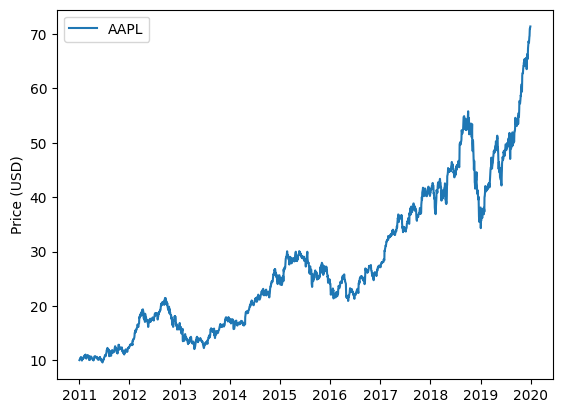

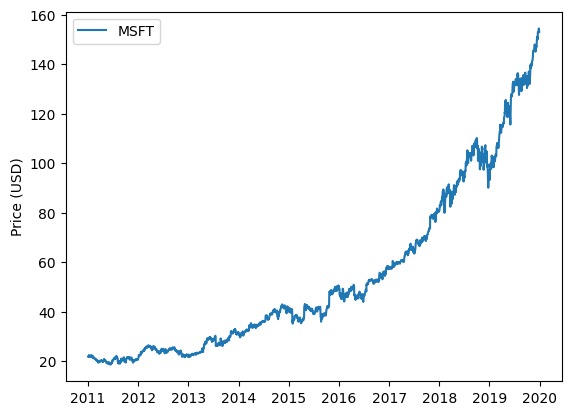

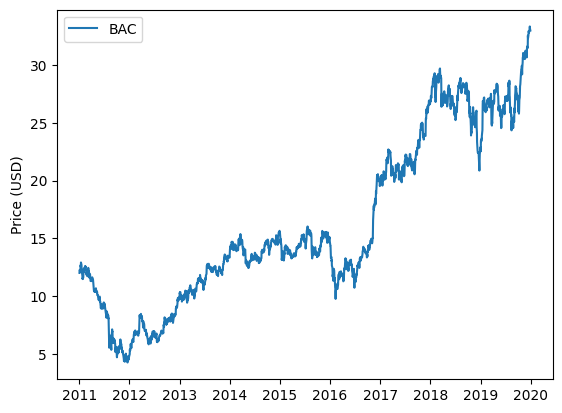

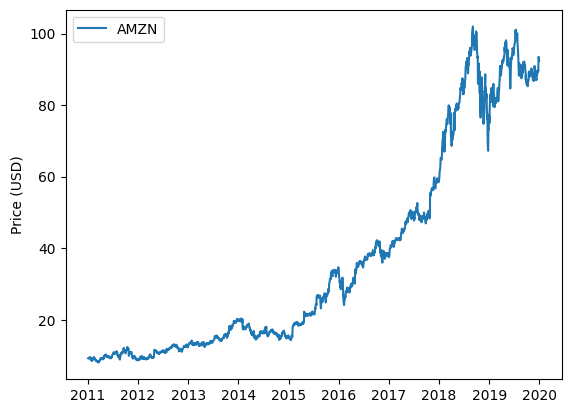

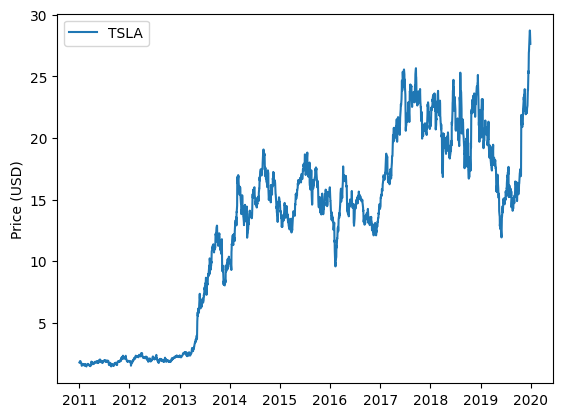

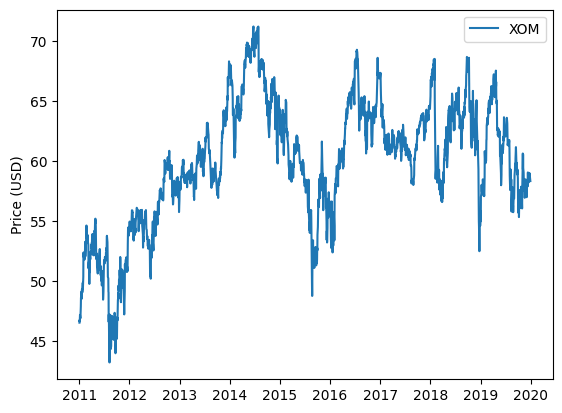

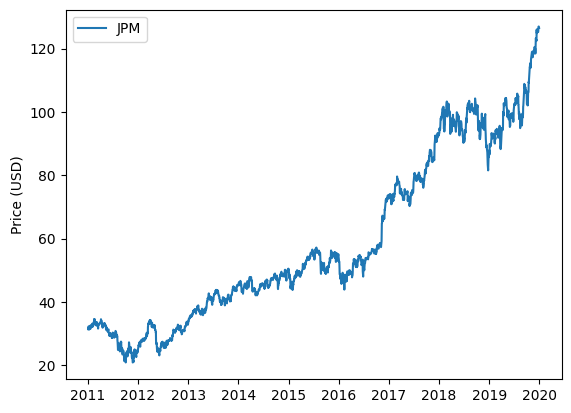

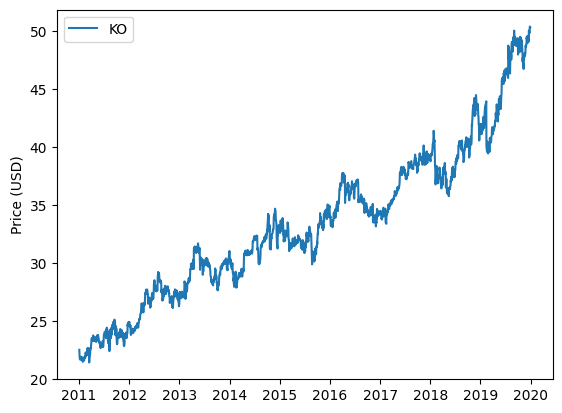

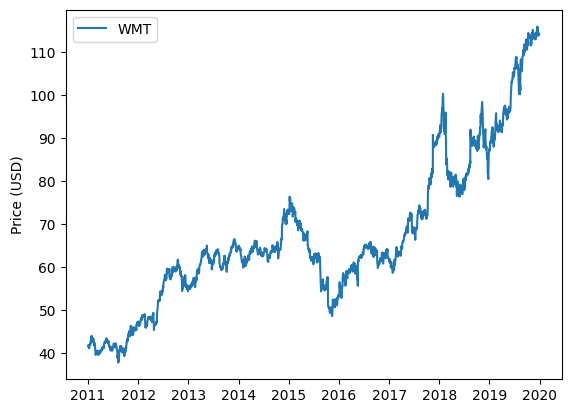

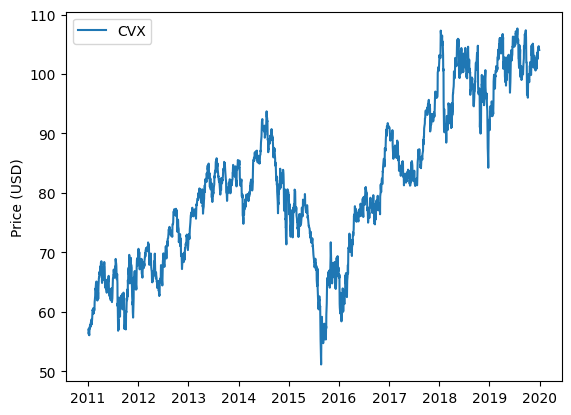

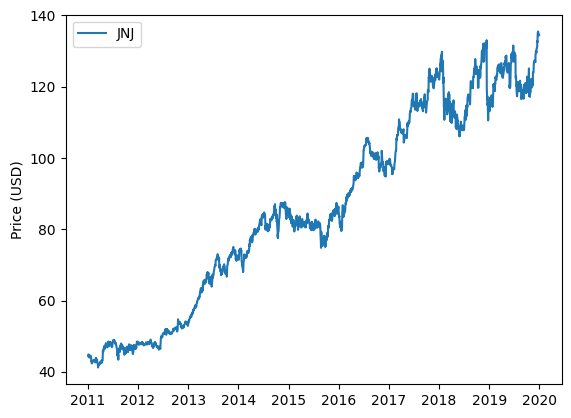

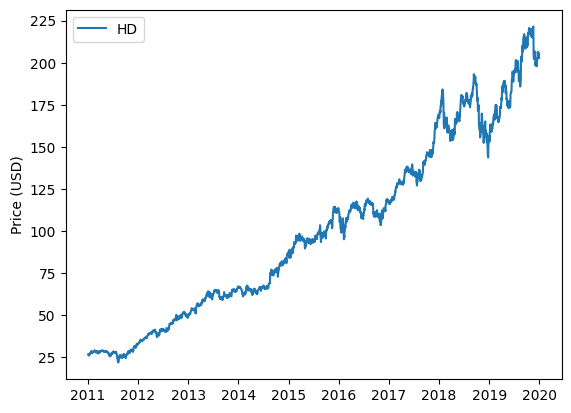

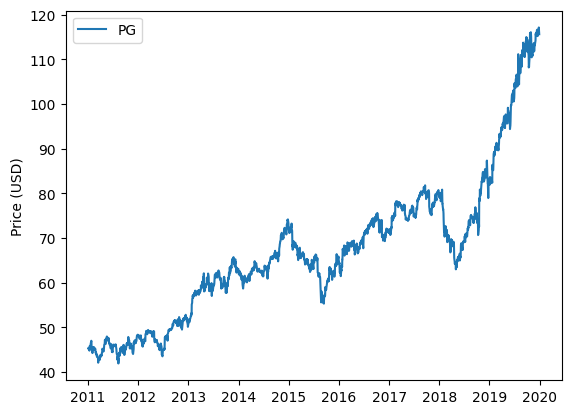

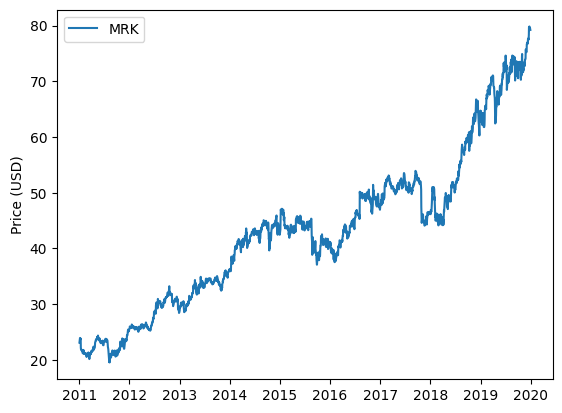

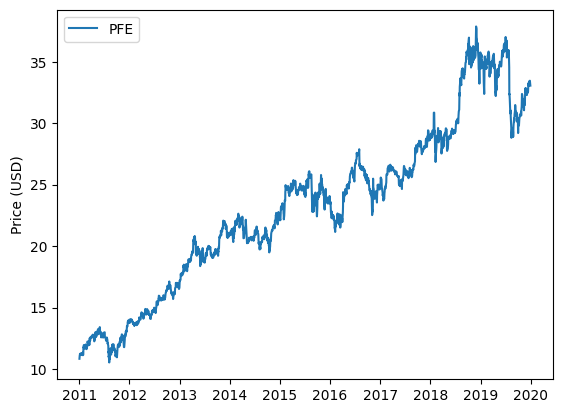

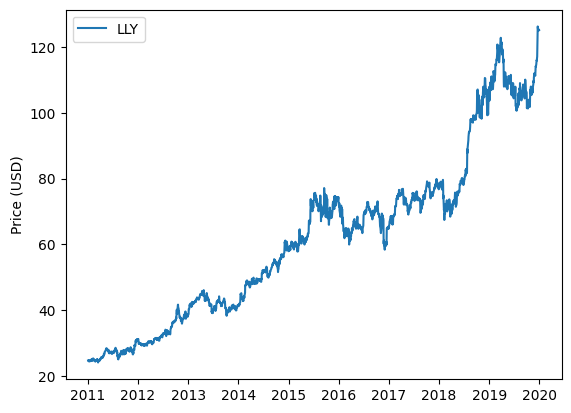

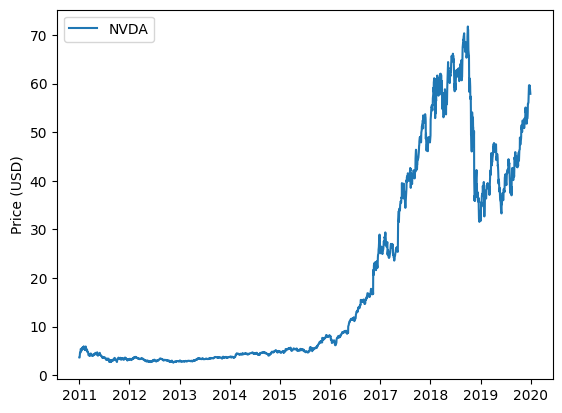

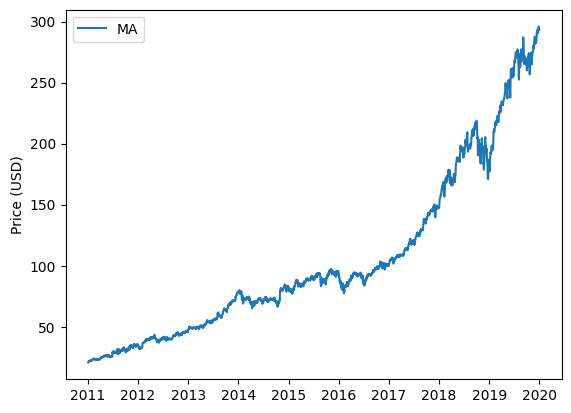

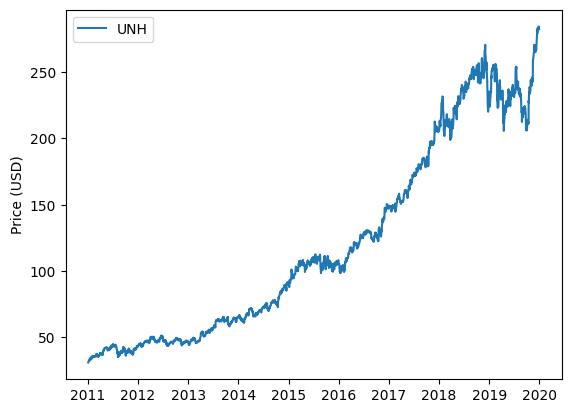

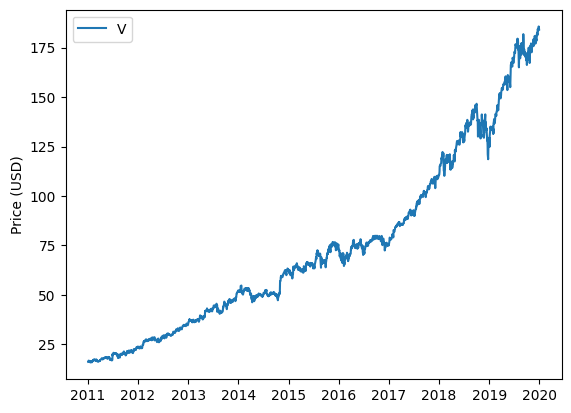

In [167]:
for stock in dataframe_stock_data_selected_stocks.columns[1:]:
    plot_single_stock(dataframe_stock_data_selected_stocks, str(stock))

In [168]:
# printing the dataframe without date column

df = dataframe_stock_data_selected_stocks.iloc[:,1:]
df

AAPL                MSFT                 BAC  \
2       10.0332612991333  21.856332778930664  12.012041091918945   
3     10.085627555847168    21.9422550201416  12.054369926452637   
4      10.16812801361084    21.8719539642334  12.274459838867188   
5     10.159910202026367  22.512489318847656  12.223673820495605   
6     10.232666969299316  22.340635299682617  12.062838554382324   
...                  ...                 ...                 ...   
2260    69.5571060180664  153.03126525878906   33.03183364868164   
2261   69.62322235107422   153.0020751953125  33.078800201416016   
2262   71.00457000732422   154.2561798095703  33.360565185546875   
2263   70.97764587402344  154.53814697265625  33.200889587402344   
2264   71.39889526367188  153.20620727539062   33.01305389404297   

                   AMZN                TSLA                 XOM  \
2     9.211000442504883  1.7746670246124268   46.50217056274414   
3     9.250499725341797   1.777999997138977  46.720497131347656   
4     9.371000289916992  1.7886669635772705  46.595733642578125   
5     9.293000221252441   1.858667016029358    46.8951530456543   
6     9.274499893188477  1.8826669454574585   47.15089416503906   
...                 ...                 ...                 ...   
2260   89.6500015258789  27.947999954223633  58.981143951416016   
2261  89.46050262451172  28.350000381469727   58.75456237792969   
2262   93.4384994506836  28.729333877563477   58.84687042236328   
2263  93.48999786376953  28.691999435424805   58.64549255371094   
2264  92.34449768066406   27.64666748046875  58.301448822021484   

                     JPM                  KO                 WMT  \
2     31.384624481201172  22.505250930786133   41.66514587402344   
3     31.838842391967773  22.039405822753906   41.82551574707031   
4      32.22818374633789   21.90827751159668  41.550594329833984   
5      32.06956100463867  21.749547958374023  41.206966400146484   
6      31.46392822265625  21.711589813232422   41.29860305786133   
...                  ...                 ...                 ...   
2260  125.19734954833984  49.991432189941406  113.88716888427734   
2261  125.54412841796875   49.80934143066406  114.34645080566406   
2262  126.87639617919922  50.091583251953125  114.35600280761719   
2263  126.96766662597656   50.39202117919922  114.42298126220703   
2264  126.50225067138672   50.31918716430664  114.24119567871094   

                     CVX                 JNJ                  HD  \
2      57.01817321777344   44.52234649658203  26.823223114013672   
3      56.80732345581055  44.897972106933594  26.337039947509766   
4      56.70808410644531  44.869625091552734   26.25349235534668   
5      56.24293899536133   44.79874801635742   26.14712905883789   
6     56.553035736083984  44.366432189941406   26.11674690246582   
...                  ...                 ...                 ...   
2260   104.4437026977539  135.49964904785156  204.62692260742188   
2261  104.45237731933594  135.02774047851562     205.98974609375   
2262  104.67803955078125  134.93521118164062   206.1298065185547   
2263  104.41765594482422  134.86122131347656   205.3363494873047   
2264   104.0270767211914  134.44480895996094  202.85330200195312   

                      PG                 MRK                 PFE  \
2      45.26420974731445   23.10027313232422  10.830879211425781   
3      45.39000701904297  23.298973083496094  11.020782470703125   
4      45.28517532348633  23.433578491210938  11.094297409057617   
5      45.20829772949219   23.75405502319336  11.137179374694824   
6      45.07553482055664      23.93994140625   11.23519515991211   
...                  ...                 ...                 ...   
2260  116.01876831054688   79.84685516357422  33.406890869140625   
2261   116.3160171508789   79.58573913574219   33.38139724731445   
2262   116.3160171508789   79.49871826171875   33.45787048339844   
2263   117.1241455078125   79.63796997070312  33.406890869140625   
2264  115.619338

In [169]:
#checking if the timeseries are stationairy

Stationary_series =[]
Non_stationairy_series = []
#df.columns[:-1] cause we want to skip the date column
for variable in df.columns[:-1]:
    print(f"Output results augmented Dickey Fuller test for variable: {variable}")
    results_augmented_dickey_fuller = adfuller(df[variable])
    print('ADF Statistic: %f' % results_augmented_dickey_fuller[0])
    print('p-value: %f' % results_augmented_dickey_fuller[1])
    print('Critical Values:')
    for key, value in results_augmented_dickey_fuller[4].items():
        print('\t%s: %.3f' % (key, value))

    if results_augmented_dickey_fuller[1] <= 0.05:
        print("Conclusion: p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary")
        print('\n')
        Stationary_series.append(variable)
    else:
        print("Conclusion: p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary")
        print('\n')
        Non_stationairy_series.append(variable)
        
print(f'Stationary_series: {Stationary_series}, Non_stationairy_series: {Non_stationairy_series}')

Output results augmented Dickey Fuller test for variable: AAPL
ADF Statistic: 1.640140
p-value: 0.997973
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Conclusion: p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary


Output results augmented Dickey Fuller test for variable: MSFT
ADF Statistic: 4.091566
p-value: 1.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Conclusion: p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary


Output results augmented Dickey Fuller test for variable: BAC
ADF Statistic: 0.494716
p-value: 0.984712
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Conclusion: p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary


Output results augmented Dickey Fuller test for variable: AMZN
ADF Statistic: 0.545182
p-value: 0.986184
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Conclusion:

In [170]:
# differencing by taking percentage change in order to make the timeseries stationairy
dataframe_stock_data_selected_stocks_pct_change = pd.DataFrame([])
for stock in dataframe_stock_data_selected_stocks.columns[1:]:
    dataframe_stock_data_selected_stocks_pct_change[stock] = dataframe_stock_data_selected_stocks[stock].astype(float).pct_change()
#         print(value)

In [171]:
dataframe_stock_data_selected_stocks_pct_change['Date']= dataframe_stock_data_selected_stocks['Date']

In [172]:
dataframe_stock_data_selected_stocks_pct_change

AAPL      MSFT       BAC      AMZN      TSLA       XOM       JPM  \
2          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3     0.005219  0.003931  0.003524  0.004288  0.001878  0.004695  0.014473   
4     0.008180 -0.003204  0.018258  0.013026  0.005999 -0.002670  0.012229   
5    -0.000808  0.029286 -0.004138 -0.008324  0.039135  0.006426 -0.004922   
6     0.007161 -0.007634 -0.013158 -0.001991  0.012912  0.005453 -0.018885   
...        ...       ...       ...       ...       ...       ...       ...   
2260  0.016319  0.000000  0.006007  0.003638  0.033605  0.005004 -0.000292   
2261  0.000951 -0.000191  0.001422 -0.002114  0.014384 -0.003842  0.002770   
2262  0.019840  0.008197  0.008518  0.044467  0.013380  0.001571  0.010612   
2263 -0.000379  0.001828 -0.004786  0.000551 -0.001300 -0.003422  0.000719   
2264  0.005935 -0.008619 -0.005658 -0.012253 -0.036433 -0.005866 -0.003666   

            KO       WMT       CVX  ...        HD        PG       MRK  \
2          NaN       NaN       NaN  ...       NaN       NaN       NaN   
3    -0.020699  0.003849 -0.003698  ... -0.018125  0.002779  0.008602   
4    -0.005950 -0.006573 -0.001747  ... -0.003172 -0.002310  0.005777   
5    -0.007245 -0.008270 -0.008202  ... -0.004051 -0.001698  0.013676   
6    -0.001745  0.002224  0.005514  ... -0.001162 -0.002937  0.007825   
...        ...       ...       ...  ...       ...       ...       ...   
2260 -0.001092 -0.010475  0.005431  ... -0.008952 -0.003670  0.001747   
2261 -0.003642  0.004033  0.000083  ...  0.006660  0.002562 -0.003270   
2262  0.005666  0.000084  0.002160  ...  0.000680  0.000000 -0.001093   
2263  0.005998  0.000586 -0.002487  ... -0.003849  0.006948  0.001752   
2264 -0.001445 -0.001589 -0.003741  ... -0.012093 -0.012848 -0.005137   

           PFE       LLY      NVDA        MA       UNH         V        Date  
2          NaN       NaN       NaN       NaN       NaN       NaN  2011-01-03  
3     0.017534  0.000857 -0.003160  0.012905  0.009157  0.001135  2011-01-04  
4     0.006671 -0.007137  0.076728  0.029459  0.003202  0.021105  2011-01-05  
5     0.003865  0.004601  0.138398  0.004258  0.020751  0.014981  2011-01-06  
6     0.008801 -0.001145  0.027936 -0.000130  0.002084 -0.002870  2011-01-07  
...        ...       ...       ...       ...       ...       ...         ...  
2260  0.002294 -0.009665 -0.002298 -0.004354  0.008544 -0.004894  2019-12-23  
2261 -0.000763 -0.000305 -0.000837  0.000707 -0.001864  0.002619  2019-12-24  
2262  0.002291  0.000229  0.002389  0.005782  0.003769  0.008477  2019-12-26  
2263 -0.001524  0.002898 -0.009699  0.005147  0.001082  0.001216  2019-12-27  
2264 -0.010427 -0.001673 -0.019209 -0.010042 -0.007163 -0.008237  2019-12-30  

[2263 rows x 21 columns]

looking for missing values

In [173]:

for variable in dataframe_stock_data_selected_stocks_pct_change.columns:
    print(dataframe_stock_data_selected_stocks_pct_change[variable].isnull().sum())

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0


Looks like values are missing from the price columns. this is as expected, because by taking differences we are losing the value of the first timestep

In [174]:
#skipping the nans in the frist row (as the values there were lost during taking pct change.)
dataframe_stock_data_selected_stocks_pct_change =dataframe_stock_data_selected_stocks_pct_change[1:]

In [175]:
#skipping date column
dataframe_stock_data_selected_stocks_pct_change.iloc[:,:-1]

AAPL      MSFT       BAC      AMZN      TSLA       XOM       JPM  \
3     0.005219  0.003931  0.003524  0.004288  0.001878  0.004695  0.014473   
4     0.008180 -0.003204  0.018258  0.013026  0.005999 -0.002670  0.012229   
5    -0.000808  0.029286 -0.004138 -0.008324  0.039135  0.006426 -0.004922   
6     0.007161 -0.007634 -0.013158 -0.001991  0.012912  0.005453 -0.018885   
7     0.018833 -0.013287  0.010526 -0.004367  0.007436 -0.006086 -0.005500   
...        ...       ...       ...       ...       ...       ...       ...   
2260  0.016319  0.000000  0.006007  0.003638  0.033605  0.005004 -0.000292   
2261  0.000951 -0.000191  0.001422 -0.002114  0.014384 -0.003842  0.002770   
2262  0.019840  0.008197  0.008518  0.044467  0.013380  0.001571  0.010612   
2263 -0.000379  0.001828 -0.004786  0.000551 -0.001300 -0.003422  0.000719   
2264  0.005935 -0.008619 -0.005658 -0.012253 -0.036433 -0.005866 -0.003666   

            KO       WMT       CVX       JNJ        HD        PG       MRK  \
3    -0.020699  0.003849 -0.003698  0.008437 -0.018125  0.002779  0.008602   
4    -0.005950 -0.006573 -0.001747 -0.000631 -0.003172 -0.002310  0.005777   
5    -0.007245 -0.008270 -0.008202 -0.001580 -0.004051 -0.001698  0.013676   
6    -0.001745  0.002224  0.005514 -0.009650 -0.001162 -0.002937  0.007825   
7     0.002225 -0.006472 -0.008554 -0.007029  0.000291 -0.002171 -0.004016   
...        ...       ...       ...       ...       ...       ...       ...   
2260 -0.001092 -0.010475  0.005431  0.002602 -0.008952 -0.003670  0.001747   
2261 -0.003642  0.004033  0.000083 -0.003483  0.006660  0.002562 -0.003270   
2262  0.005666  0.000084  0.002160 -0.000685  0.000680  0.000000 -0.001093   
2263  0.005998  0.000586 -0.002487 -0.000548 -0.003849  0.006948  0.001752   
2264 -0.001445 -0.001589 -0.003741 -0.003088 -0.012093 -0.012848 -0.005137   

           PFE       LLY      NVDA        MA       UNH         V  
3     0.017534  0.000857 -0.003160  0.012905  0.009157  0.001135  
4     0.006671 -0.007137  0.076728  0.029459  0.003202  0.021105  
5     0.003865  0.004601  0.138398  0.004258  0.020751  0.014981  
6     0.008801 -0.001145  0.027936 -0.000130  0.002084 -0.002870  
7    -0.004362 -0.011748  0.038248 -0.003851  0.000000 -0.015762  
...        ...       ...       ...       ...       ...       ...  
2260  0.002294 -0.009665 -0.002298 -0.004354  0.008544 -0.004894  
2261 -0.000763 -0.000305 -0.000837  0.000707 -0.001864  0.002619  
2262  0.002291  0.000229  0.002389  0.005782  0.003769  0.008477  
2263 -0.001524  0.002898 -0.009699  0.005147  0.001082  0.001216  
2264 -0.010427 -0.001673 -0.019209 -0.010042 -0.007163 -0.008237  

[2262 rows x 20 columns]

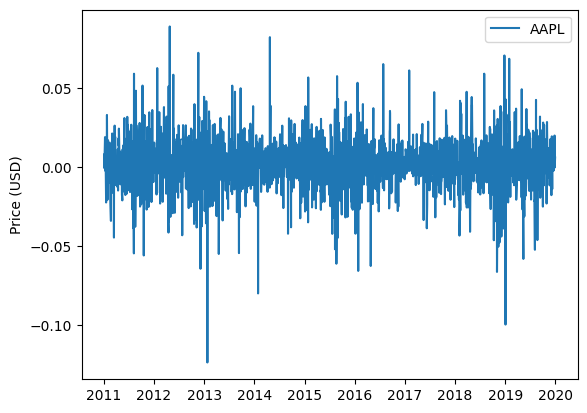

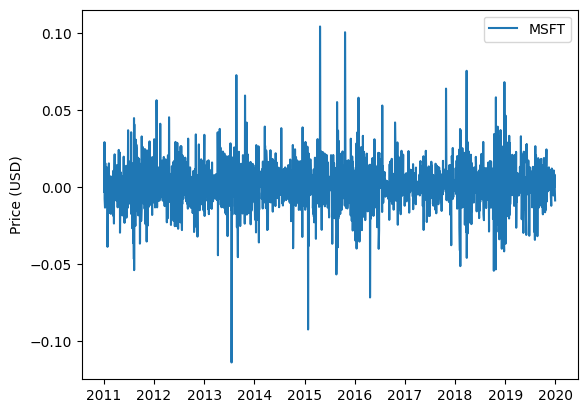

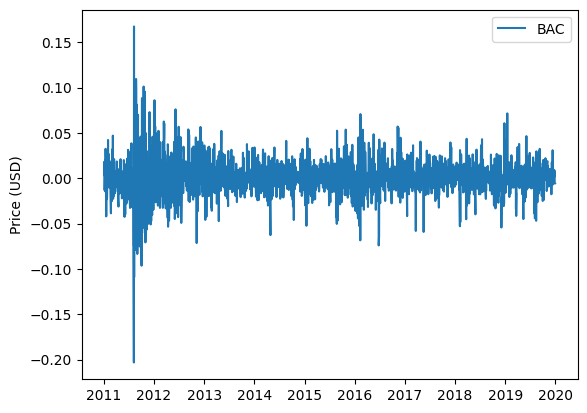

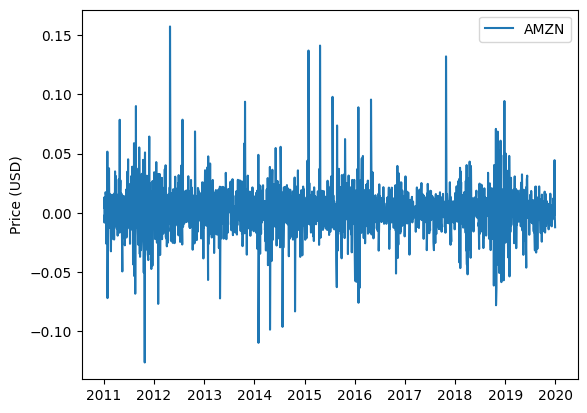

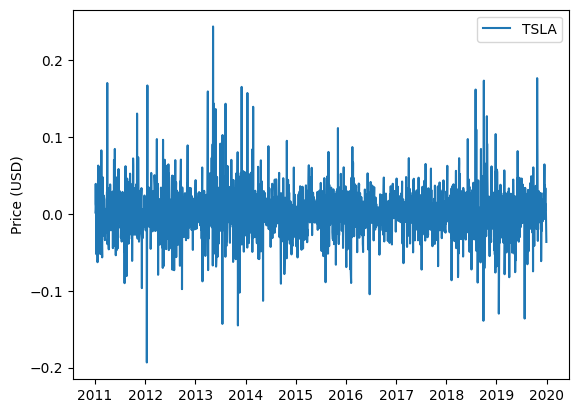

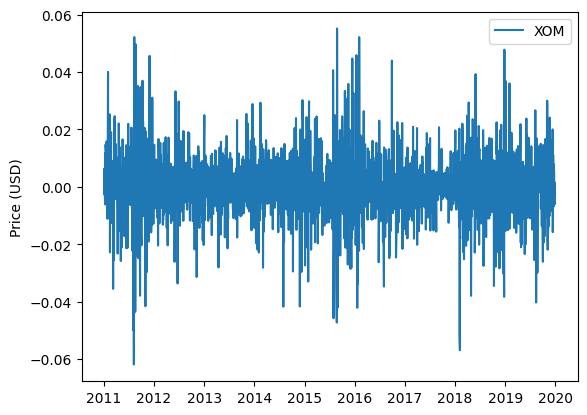

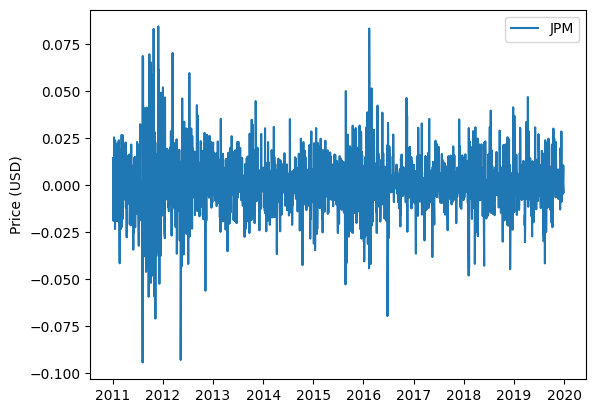

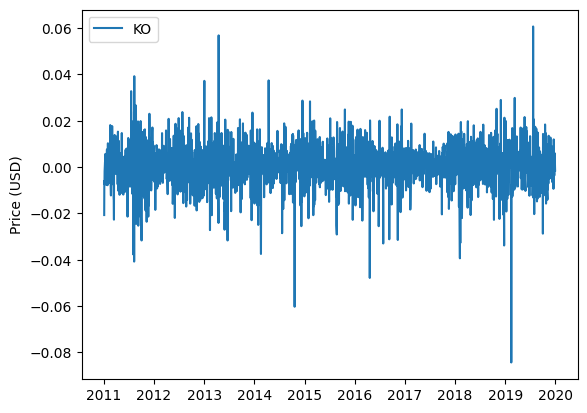

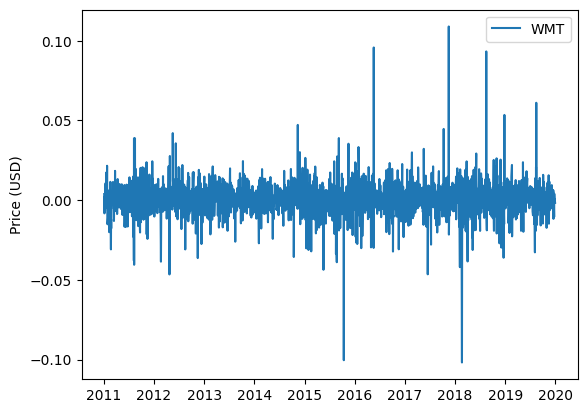

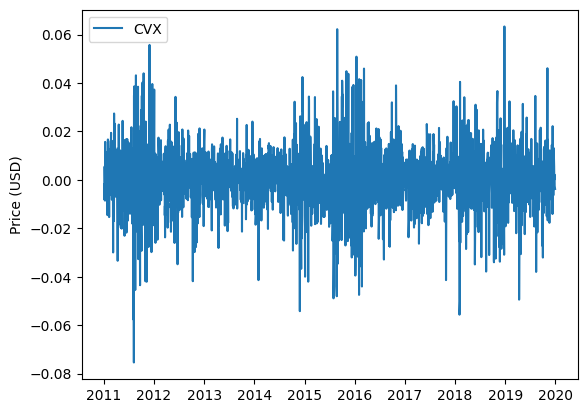

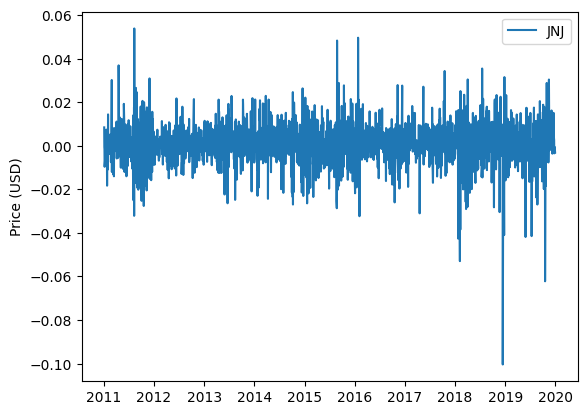

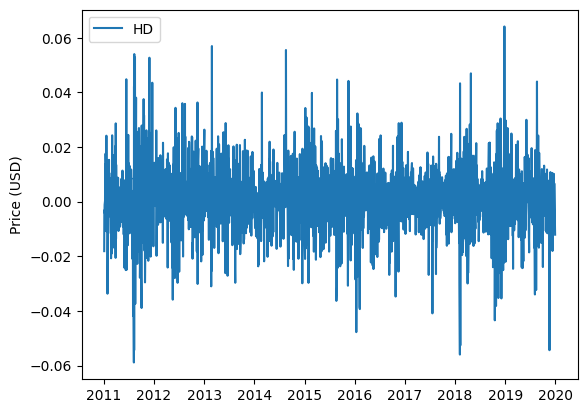

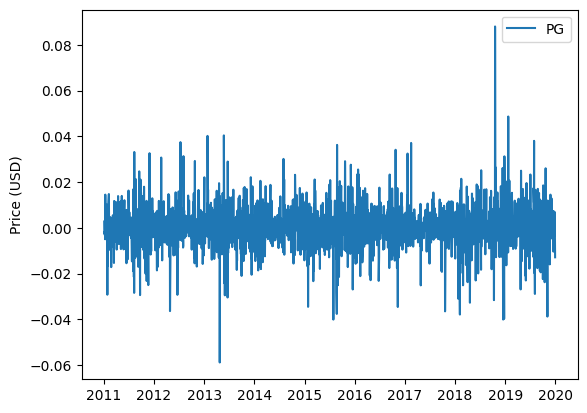

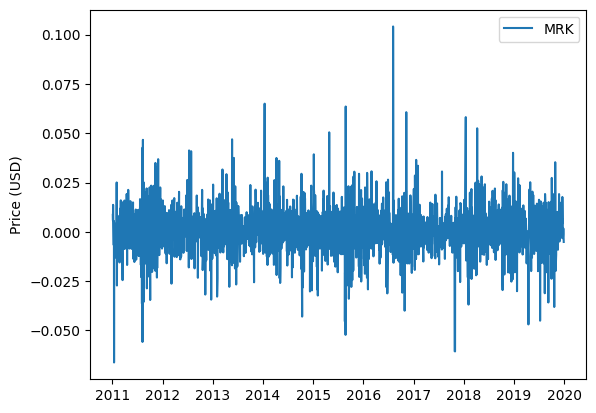

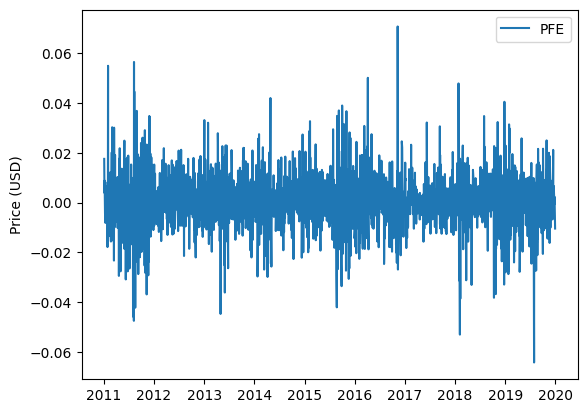

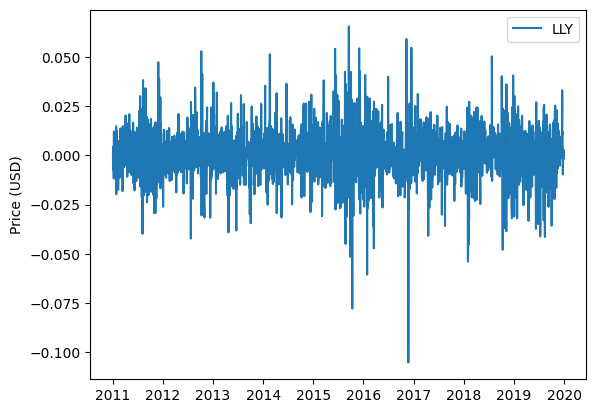

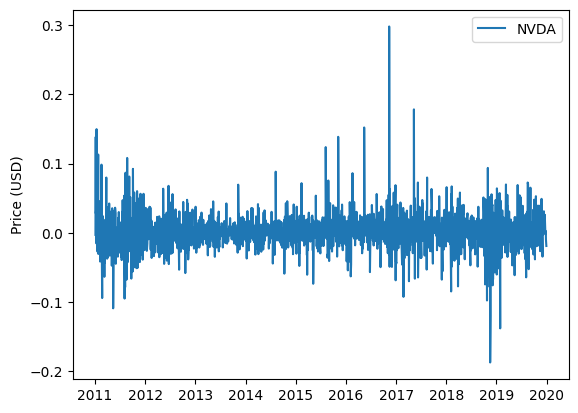

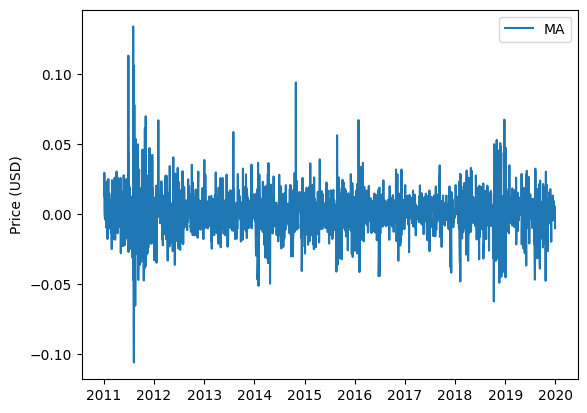

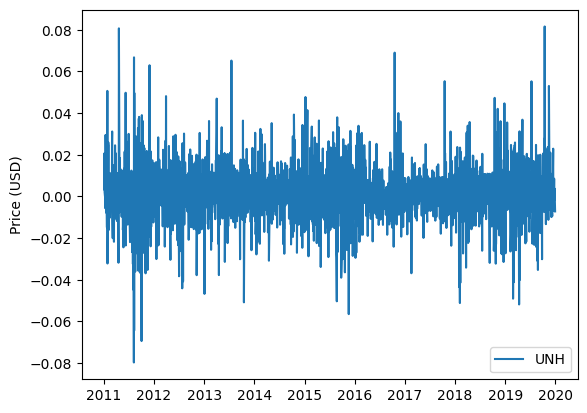

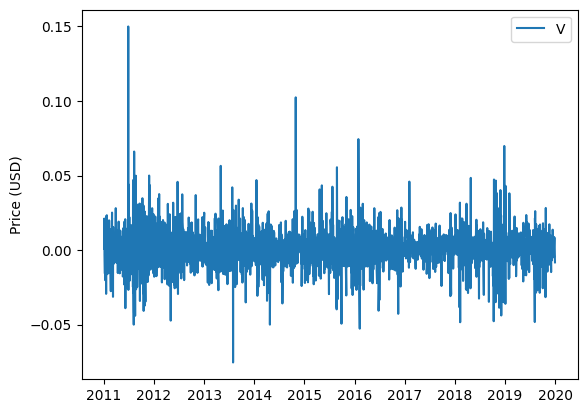

In [176]:
for stock in dataframe_stock_data_selected_stocks_pct_change.iloc[:,:-1]:
    plot_single_stock(dataframe_stock_data_selected_stocks_pct_change, str(stock))

Checking for stationarity. Mean looks constant over time, variance does not. Testing for stationarity statistically using the ADF test.

In [177]:
df = dataframe_stock_data_selected_stocks_pct_change

In [178]:
#dataframe excluding date column

df = dataframe_stock_data_selected_stocks_pct_change.iloc[:,:-2]

In [179]:
#checking if the timeseries are stationairy

Stationary_series =[]
Non_stationairy_series = []
#df.columns[:-1] cause we want to skip the date column
for variable in df.columns[:-1]:
    print(f"Output results augmented Dickey Fuller test for variable: {variable}")
    results_augmented_dickey_fuller = adfuller(df[variable])
    print('ADF Statistic: %f' % results_augmented_dickey_fuller[0])
    print('p-value: %f' % results_augmented_dickey_fuller[1])
    print('Critical Values:')
    for key, value in results_augmented_dickey_fuller[4].items():
        print('\t%s: %.3f' % (key, value))

    if results_augmented_dickey_fuller[1] <= 0.05:
        print("Conclusion: p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary")
        print('\n')
        Stationary_series.append(variable)
    else:
        print("Conclusion: p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary")
        print('\n')
        Non_stationairy_series.append(variable)
        
print(f'Stationary_series: {Stationary_series}, Non_stationairy_series: {Non_stationairy_series}')

Output results augmented Dickey Fuller test for variable: AAPL
ADF Statistic: -14.808812
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Conclusion: p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary


Output results augmented Dickey Fuller test for variable: MSFT
ADF Statistic: -18.696631
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Conclusion: p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary


Output results augmented Dickey Fuller test for variable: BAC
ADF Statistic: -12.724699
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Conclusion: p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary


Output results augmented Dickey Fuller test for variable: AMZN
ADF Statistic: -34.969185
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Conclu

In [180]:
#printing skewness per variable

Skewed_variables = []
Kurtosis_containing_variables = []

for i in df.columns[:-1]:
    print(df[i].describe())
    print(f'Kurtosis: {df[i].kurtosis()}')
    print(f'Skewness: {df[i].skew()}')
    print('\n')
    if df[i].kurtosis() <= -10 or df[i].kurtosis() >= 10:
        Kurtosis_containing_variables.append(i)
    else: 
        continue
    if df[i].skew() >= 3 or df[i].skew() <= -3:
        Skewed_variables.append(i)


if len (Skewed_variables) == 0:
        print(f'All variables have skewness in acceptable ranges (-3 < skewness < 3)\n')
if len (Kurtosis_containing_variables) == 0:
        print(f'All variables have kurtosis in acceptable ranges (-10 < kurtosis < 10)\n')
        print('\n')
elif len (Kurtosis_containing_variables) != 0:
        print(f'Not all variables have kurtosis in acceptable ranges (-10 < kurtosis < 10). The variables which have kurtosis outside this range are: {Kurtosis_containing_variables}\n')
        print('\n')

count    2262.000000
mean        0.000999
std         0.016149
min        -0.123558
25%        -0.006868
50%         0.000887
75%         0.009683
max         0.088742
Name: AAPL, dtype: float64
Kurtosis: 4.713242422683797
Skewness: -0.2286657478994424


count    2262.000000
mean        0.000964
std         0.014369
min        -0.113996
25%        -0.006394
50%         0.000586
75%         0.008221
max         0.104523
Name: MSFT, dtype: float64
Kurtosis: 6.750712021762187
Skewness: 0.07487440766218907


count    2262.000000
mean        0.000650
std         0.020137
min        -0.203182
25%        -0.008724
50%         0.000423
75%         0.010365
max         0.167435
Name: BAC, dtype: float64
Kurtosis: 9.604514010556299
Skewness: -0.11935540758312584


count    2262.000000
mean        0.001207
std         0.019397
min        -0.126568
25%        -0.008078
50%         0.000980
75%         0.011139
max         0.157457
Name: AMZN, dtype: float64
Kurtosis: 8.89733652182917
Skewness: 0.4

# Auto Correlation Function (ACF) and Partial Auto Correlation Function (PACF)

ACF $\rightarrow$ taking in account all combinations for the Pearson correlation. Model example for correlation between now and two time units ago:

$$ \textrm{CORR}(s_{t-2}, s_t) $$

PACF $\rightarrow$ only taking in account the direct effect in the correlation and using linear regression with model:

$$ s_t = \beta_0 + \beta_1 s_{t-1} + \beta_2 s_{t-2} + \beta_3 s_{t-3} ... + \epsilon_t,$$

where $\beta_i$ gives us the direct effect of $s_{t-i}$ on $s_t$.


AAPL


C:\Users\Nitai Nijholt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


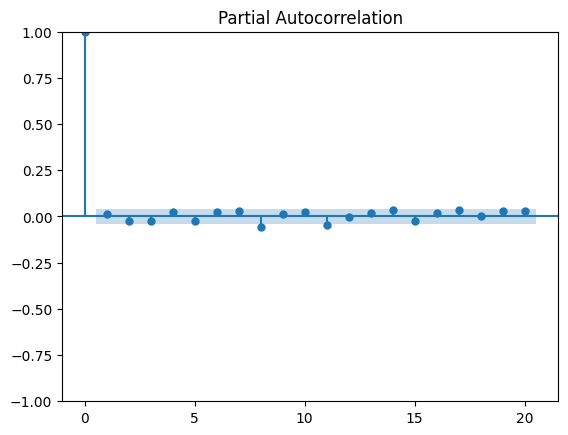

MSFT


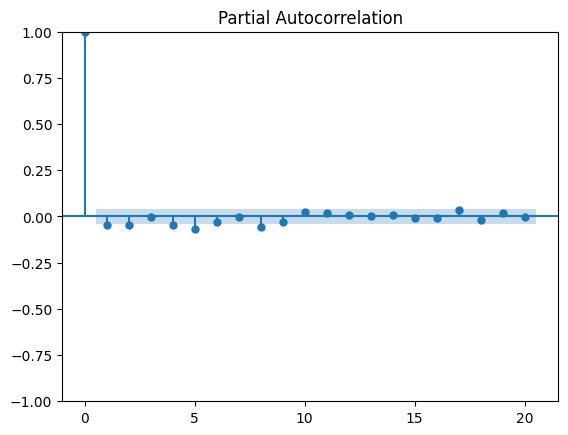

BAC


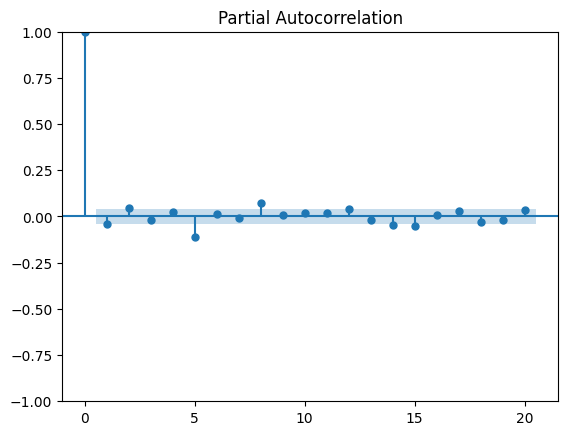

AMZN


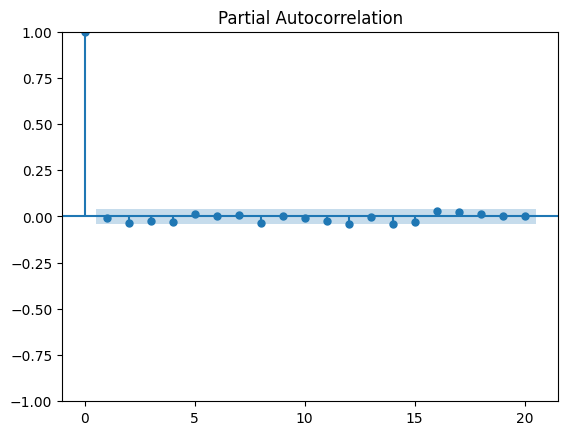

TSLA


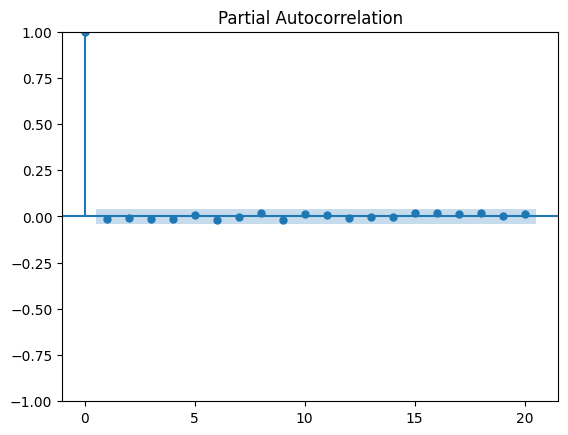

XOM


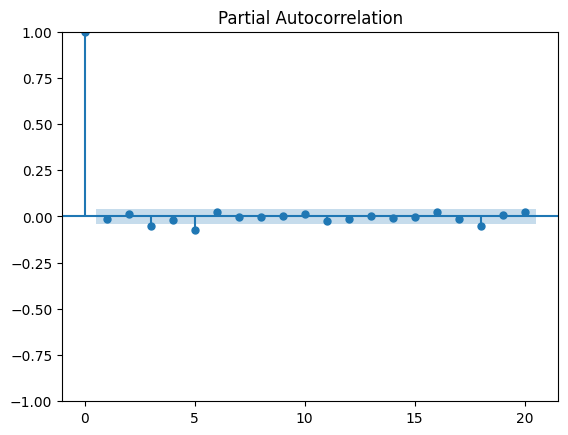

JPM


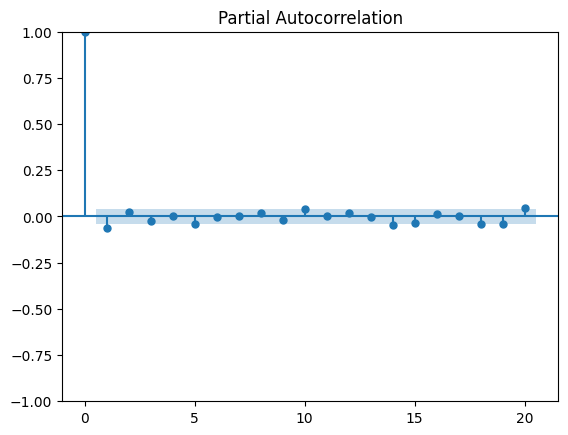

KO


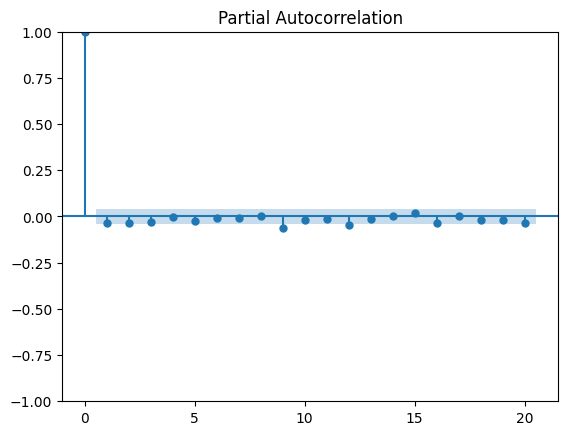

WMT


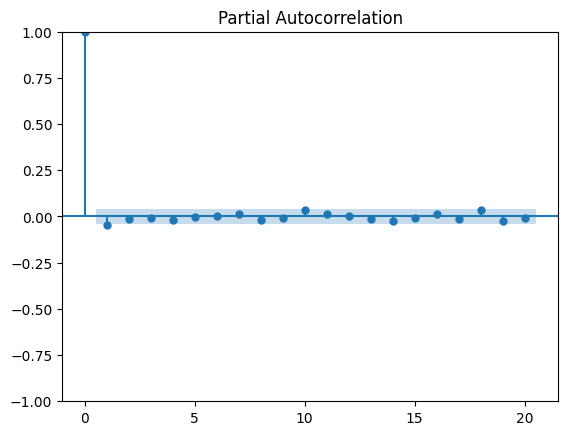

CVX


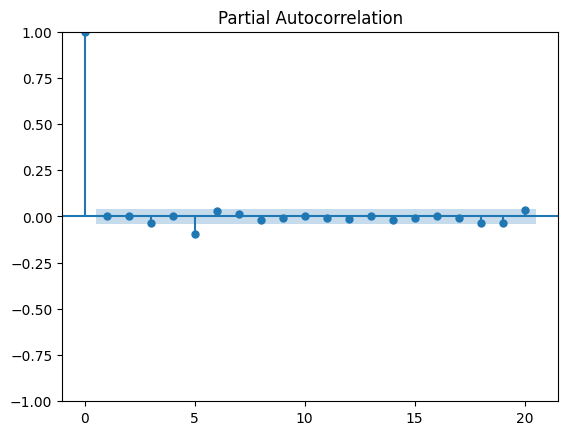

JNJ


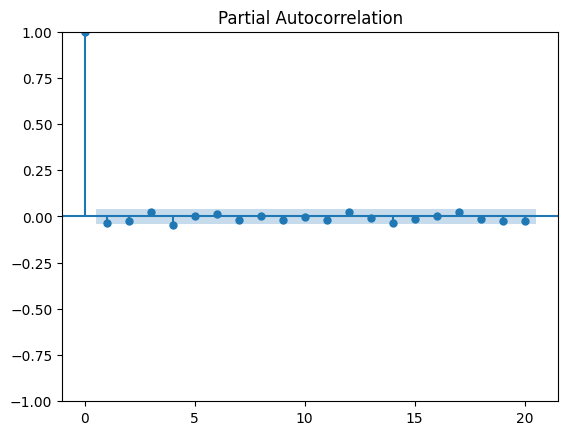

HD


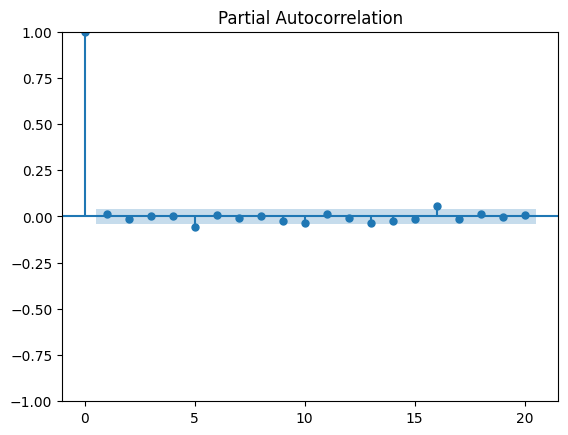

PG


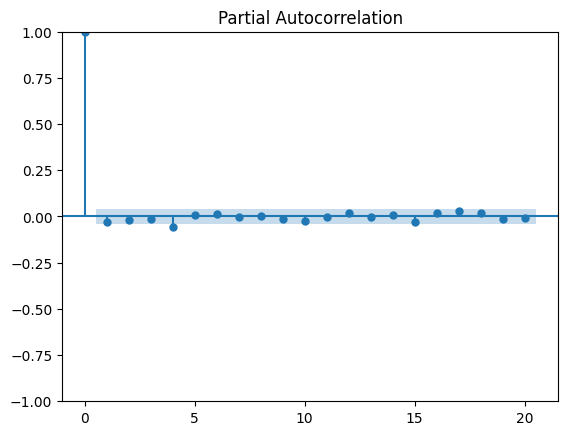

MRK


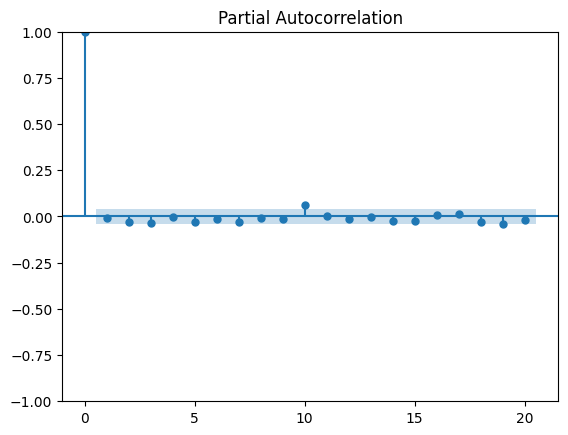

PFE


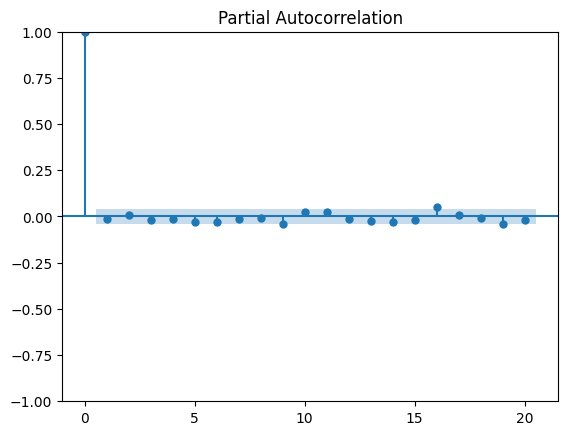

LLY


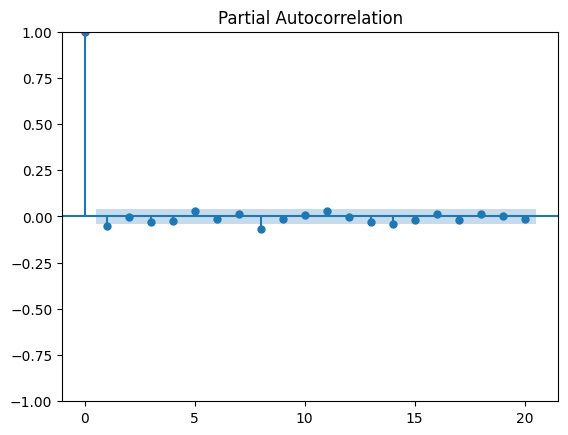

NVDA


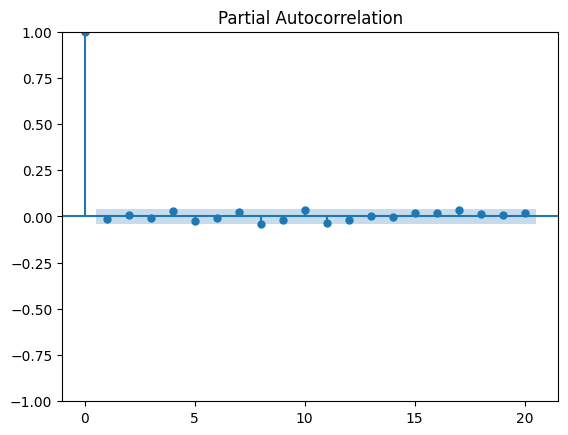

MA


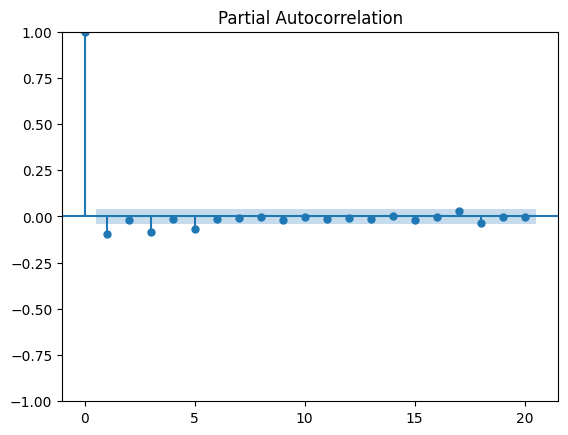

In [181]:
#testing partial auto correlations
for variable in df.columns[:-1]:
    plot_pacf(df[variable], lags = 20)
    print(variable)
    plt.show()

AAPL


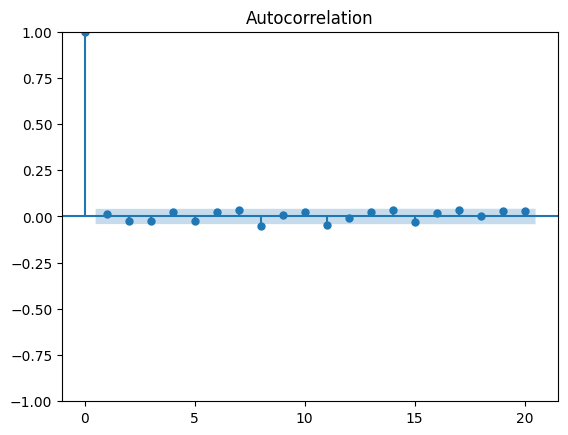

MSFT


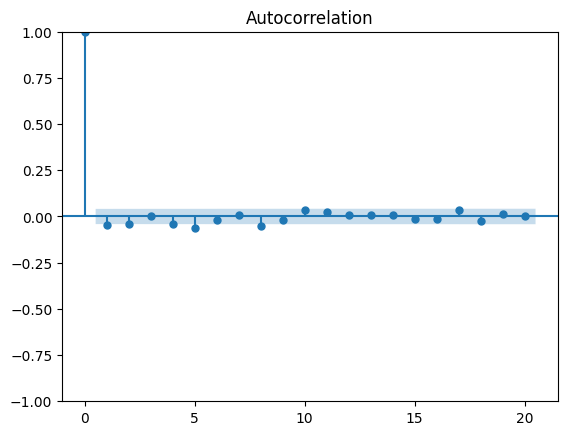

BAC


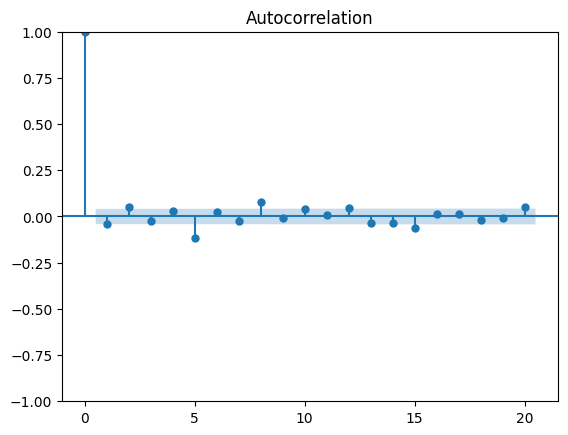

AMZN


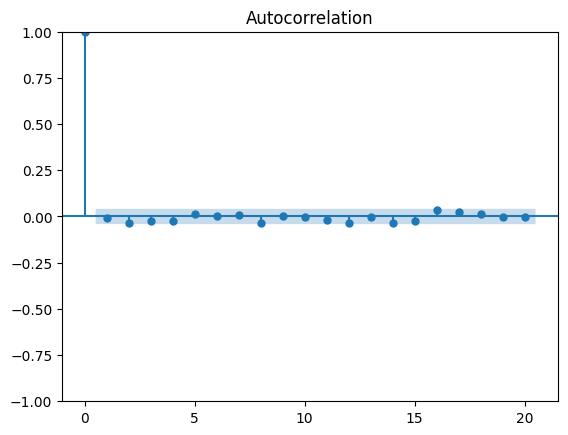

TSLA


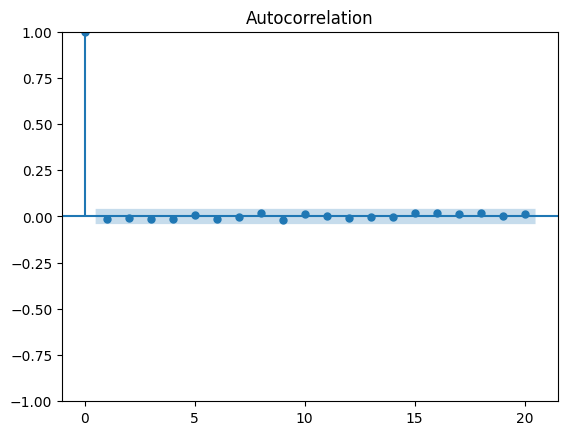

XOM


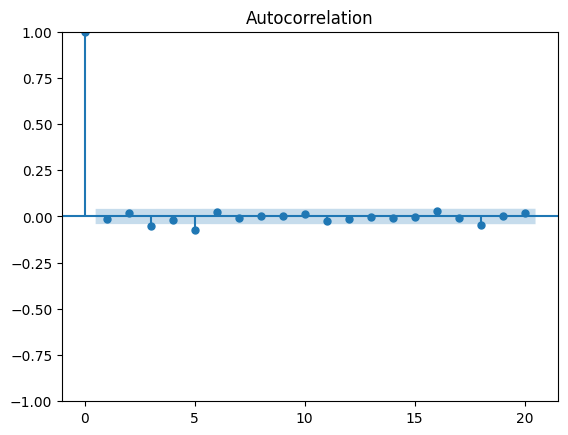

JPM


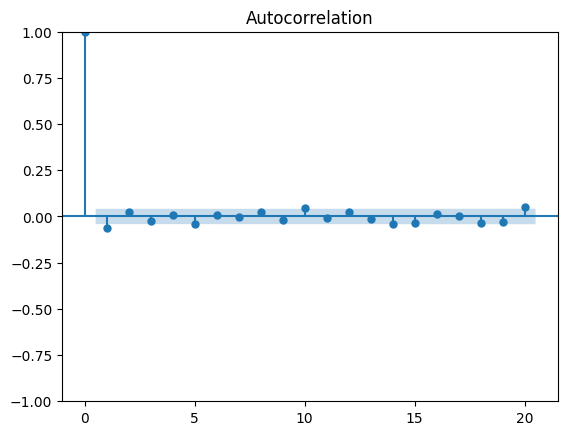

KO


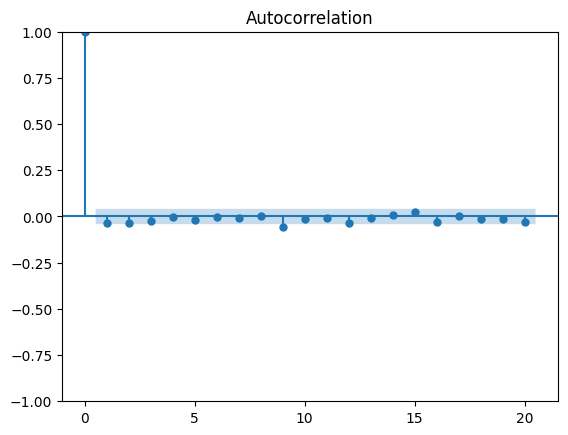

WMT


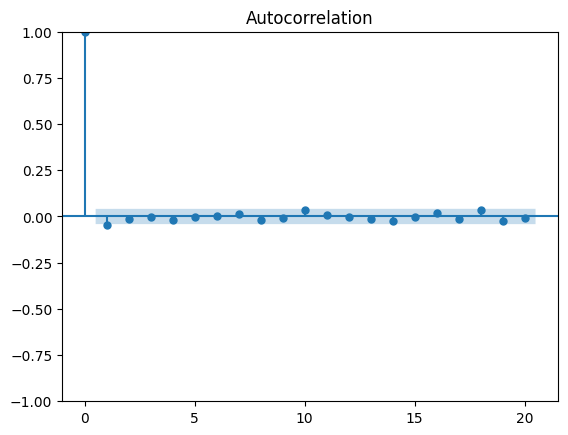

CVX


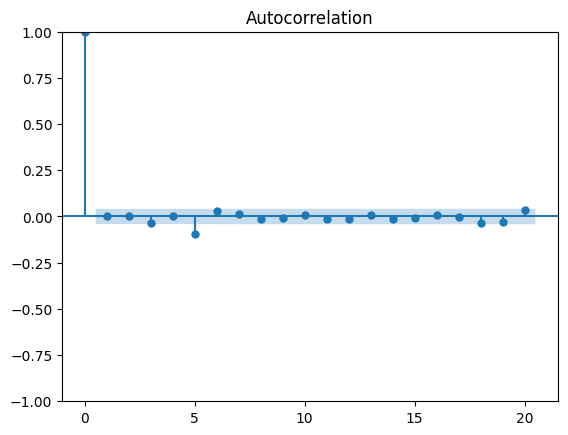

JNJ


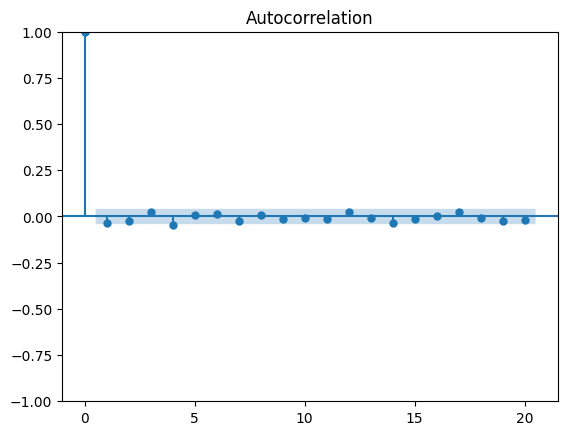

HD


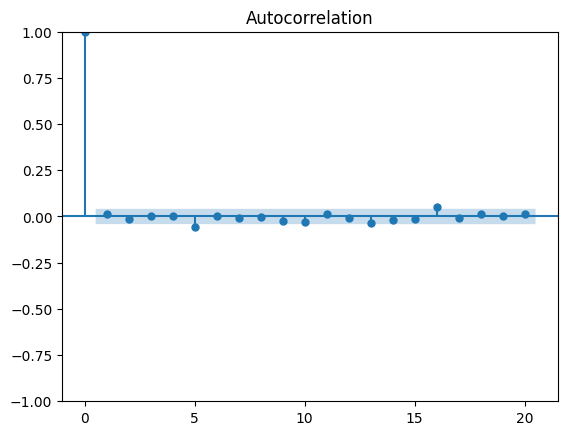

PG


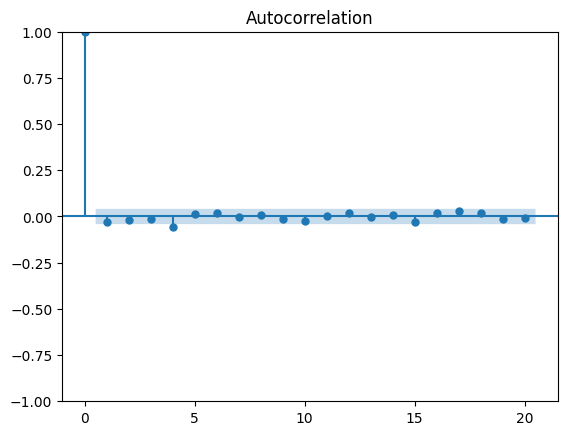

MRK


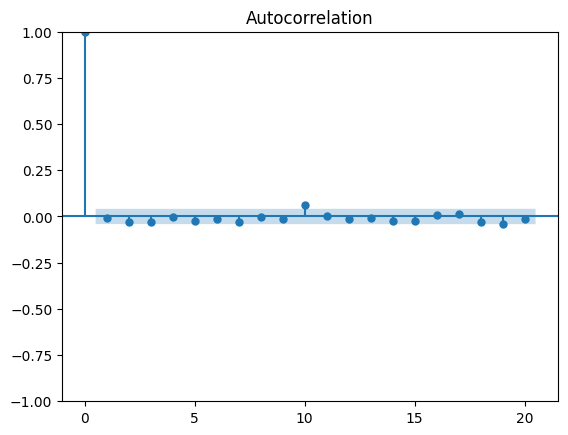

PFE


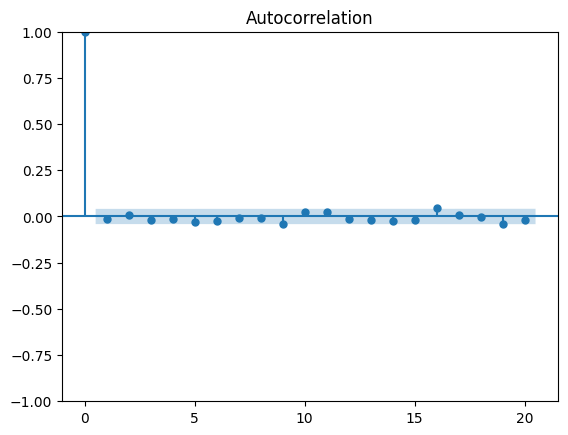

LLY


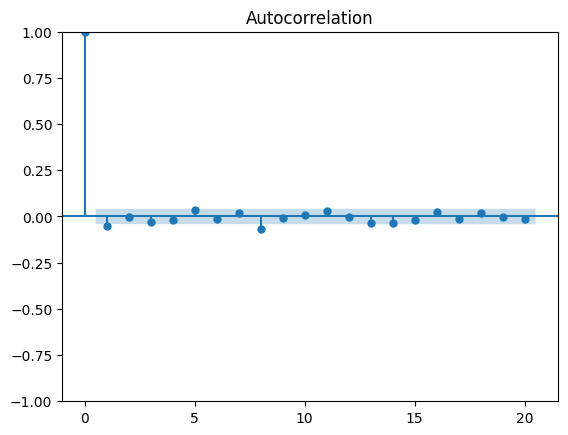

NVDA


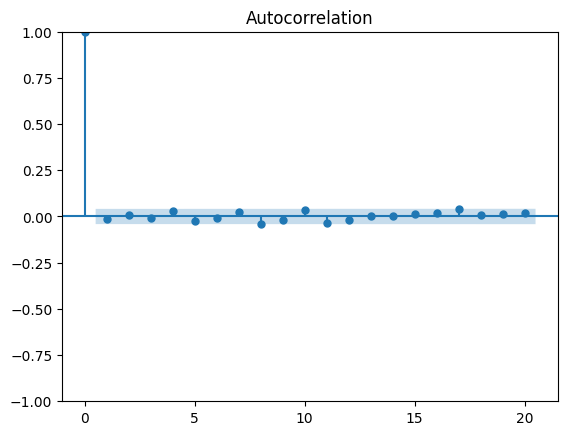

MA


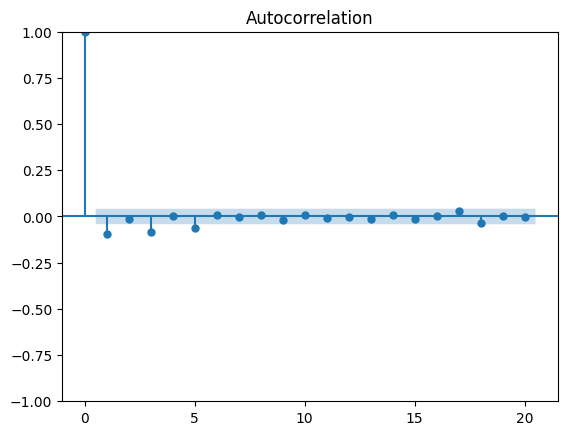

In [182]:
for variable in df.columns[:-1]:
    plot_acf(df[variable], lags = 20)
    print(variable)
    plt.show()

We can see from the auto and partial auto correlation plots that values of timestep t are not significantly correlated with values of previous timesteps.

In [183]:
dataframe_stock_data_selected_stocks_pct_change.to_csv('stock_data_daily_pct_change.csv')

# Testing for strong stationarity

Strong stationarity means that the distribution of values for each window of time is the same accross the timeseries. To test this, we can use a komlogrov smirnov test on each window, sliding the window across the timeseries

In [184]:
df

AAPL      MSFT       BAC      AMZN      TSLA       XOM       JPM  \
3     0.005219  0.003931  0.003524  0.004288  0.001878  0.004695  0.014473   
4     0.008180 -0.003204  0.018258  0.013026  0.005999 -0.002670  0.012229   
5    -0.000808  0.029286 -0.004138 -0.008324  0.039135  0.006426 -0.004922   
6     0.007161 -0.007634 -0.013158 -0.001991  0.012912  0.005453 -0.018885   
7     0.018833 -0.013287  0.010526 -0.004367  0.007436 -0.006086 -0.005500   
...        ...       ...       ...       ...       ...       ...       ...   
2260  0.016319  0.000000  0.006007  0.003638  0.033605  0.005004 -0.000292   
2261  0.000951 -0.000191  0.001422 -0.002114  0.014384 -0.003842  0.002770   
2262  0.019840  0.008197  0.008518  0.044467  0.013380  0.001571  0.010612   
2263 -0.000379  0.001828 -0.004786  0.000551 -0.001300 -0.003422  0.000719   
2264  0.005935 -0.008619 -0.005658 -0.012253 -0.036433 -0.005866 -0.003666   

            KO       WMT       CVX       JNJ        HD        PG       MRK  \
3    -0.020699  0.003849 -0.003698  0.008437 -0.018125  0.002779  0.008602   
4    -0.005950 -0.006573 -0.001747 -0.000631 -0.003172 -0.002310  0.005777   
5    -0.007245 -0.008270 -0.008202 -0.001580 -0.004051 -0.001698  0.013676   
6    -0.001745  0.002224  0.005514 -0.009650 -0.001162 -0.002937  0.007825   
7     0.002225 -0.006472 -0.008554 -0.007029  0.000291 -0.002171 -0.004016   
...        ...       ...       ...       ...       ...       ...       ...   
2260 -0.001092 -0.010475  0.005431  0.002602 -0.008952 -0.003670  0.001747   
2261 -0.003642  0.004033  0.000083 -0.003483  0.006660  0.002562 -0.003270   
2262  0.005666  0.000084  0.002160 -0.000685  0.000680  0.000000 -0.001093   
2263  0.005998  0.000586 -0.002487 -0.000548 -0.003849  0.006948  0.001752   
2264 -0.001445 -0.001589 -0.003741 -0.003088 -0.012093 -0.012848 -0.005137   

           PFE       LLY      NVDA        MA       UNH  
3     0.017534  0.000857 -0.003160  0.012905  0.009157  
4     0.006671 -0.007137  0.076728  0.029459  0.003202  
5     0.003865  0.004601  0.138398  0.004258  0.020751  
6     0.008801 -0.001145  0.027936 -0.000130  0.002084  
7    -0.004362 -0.011748  0.038248 -0.003851  0.000000  
...        ...       ...       ...       ...       ...  
2260  0.002294 -0.009665 -0.002298 -0.004354  0.008544  
2261 -0.000763 -0.000305 -0.000837  0.000707 -0.001864  
2262  0.002291  0.000229  0.002389  0.005782  0.003769  
2263 -0.001524  0.002898 -0.009699  0.005147  0.001082  
2264 -0.010427 -0.001673 -0.019209 -0.010042 -0.007163  

[2262 rows x 19 columns]

In [185]:
df.to_csv()

',AAPL,MSFT,BAC,AMZN,TSLA,XOM,JPM,KO,WMT,CVX,JNJ,HD,PG,MRK,PFE,LLY,NVDA,MA,UNH\r\n3,0.005219265715564525,0.003931228631994799,0.0035238669439923154,0.004288272819382488,0.0018780833138420938,0.00469497586803902,0.014472625314942755,-0.02069939630821771,0.0038490174385026332,-0.003697939622821278,0.008436788262730088,-0.018125456602935297,0.0027791774656129586,0.008601627783086041,0.01753350356608263,0.000856904743905762,-0.0031604480972184934,0.012904771543028826,0.009157089491711234\r\n4,0.008180002415005161,-0.003203912079395299,0.01825810173052478,0.013026384320090623,0.005999418703857007,-0.0026704229712877225,0.01222850220422389,-0.005949720796095459,-0.006573055043692655,-0.0017469464028248005,-0.0006313651608439441,-0.003172246855743799,-0.002309576544296643,0.005777310752386411,0.006670573396210244,-0.007136678034690536,0.0767281637997701,0.029458680770301005,0.0032021187243727045\r\n5,-0.0008081931672646592,0.029285694166223397,-0.004137535911011514,-0.008323558451756474,0.039

In [186]:
len(df.columns)

19

In [187]:
# Create sliding windows of timeseries

# create sliding windows of timeseries per stock:
list_of_windows_per_stock = []
for stock in df.columns:
  stock_timeseries = df[str(stock)]
  # Define the window size
  window_size = 20

  # Initialize the list of windows
  windows = []

  # Iterate over the time series
  for i in np.arange(len(stock_timeseries.index) - window_size + 1, step = window_size):
    # Take the last `window_size` elements of the time series
    # windows are non overlapping, i.e. the first window is from index 0-20, the next from 20-40 etc. 
    # instead of first window being index 0-20, second window being 1-21, etc.
    current_window = stock_timeseries[i:i+window_size]

    # Add the current window to the list of windows
    windows.append(np.array(current_window))
  list_of_windows_per_stock.append(windows)
    


C:\Users\Nitai Nijholt\AppData\Local\Temp\ipykernel_32348\814986450.py:18: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  current_window = stock_timeseries[i:i+window_size]


In [188]:
array_list_of_windows_per_stock = np.array(list_of_windows_per_stock)

In [189]:
# so, we have an array of lists of arrays.
# axis 0 contains all stocks
# axis 1 contains the windows per stock
# axis 2 contains the values per window

array_list_of_windows_per_stock.shape


(19, 113, 20)

In [190]:
ks_test_results_per_window_per_stock = []
for stock in range(len(df.columns)):
    ks_test_results_per_window = []
    windows = array_list_of_windows_per_stock[stock]
    # for bootstrap_iteration in range(1000):
    #     np.random.choice(windows, replace = True)
    for i in range(len(windows)-1):
        # do a ks test on each pair of subsequent windows and append the result to a list containing the ks test results per window
        results_kolmogrov_smirnow = kstest(windows[i],windows[i+1])
        ks_test_results_per_window.append(results_kolmogrov_smirnow)
    # append the ks test results per window, containting all the window results of 1 stock, to a list containing the kstest results of other stocks
    ks_test_results_per_window_per_stock.append(ks_test_results_per_window)

In [191]:
# we can see a dataframe containing the df test tuples of (test_statstic, p-value)
# H0 is that the distributions of two windows are the same which is, using alpha < 0.05 and a two sided test, rejected if p < 0.05


ks_test_pd = pd.DataFrame(ks_test_results_per_window_per_stock, index = df.columns)

In [192]:
ks_test_pd

0                           1    \
AAPL   (0.15, 0.9831368772656193)   (0.25, 0.571336004933722)   
MSFT    (0.25, 0.571336004933722)   (0.2, 0.8319696107963263)   
BAC     (0.25, 0.571336004933722)  (0.3, 0.33559098126008213)   
AMZN    (0.25, 0.571336004933722)   (0.2, 0.8319696107963263)   
TSLA    (0.2, 0.8319696107963263)   (0.2, 0.8319696107963263)   
XOM     (0.25, 0.571336004933722)   (0.2, 0.8319696107963263)   
JPM    (0.15, 0.9831368772656193)   (0.2, 0.8319696107963263)   
KO     (0.3, 0.33559098126008213)  (0.3, 0.33559098126008213)   
WMT     (0.25, 0.571336004933722)  (0.3, 0.33559098126008213)   
CVX     (0.2, 0.8319696107963263)  (0.15, 0.9831368772656193)   
JNJ    (0.3, 0.33559098126008213)   (0.2, 0.8319696107963263)   
HD      (0.25, 0.571336004933722)   (0.25, 0.571336004933722)   
PG     (0.15, 0.9831368772656193)  (0.15, 0.9831368772656193)   
MRK     (0.2, 0.8319696107963263)  (0.3, 0.33559098126008213)   
PFE     (0.2, 0.8319696107963263)   (0.2, 0.8319696107963263)   
LLY    (0.15, 0.9831368772656193)   (0.25, 0.571336004933722)   
NVDA  (0.35, 0.17453300569806826)   (0.25, 0.571336004933722)   
MA     (0.15, 0.9831368772656193)  (0.15, 0.9831368772656193)   
UNH     (0.25, 0.571336004933722)   (0.25, 0.571336004933722)   

                             2                            3    \
AAPL   (0.2, 0.8319696107963263)    (0.2, 0.8319696107963263)   
MSFT  (0.15, 0.9831368772656193)    (0.25, 0.571336004933722)   
BAC    (0.2, 0.8319696107963263)   (0.15, 0.9831368772656193)   
AMZN  (0.15, 0.9831368772656193)   (0.15, 0.9831368772656193)   
TSLA   (0.25, 0.571336004933722)    (0.2, 0.8319696107963263)   
XOM    (0.25, 0.571336004933722)    (0.25, 0.571336004933722)   
JPM   (0.15, 0.9831368772656193)   (0.3, 0.33559098126008213)   
KO     (0.25, 0.571336004933722)    (0.2, 0.8319696107963263)   
WMT    (0.2, 0.8319696107963263)    (0.25, 0.571336004933722)   
CVX   (0.15, 0.9831368772656193)    (0.25, 0.571336004933722)   
JNJ   (0.3, 0.33559098126008213)    (0.2, 0.8319696107963263)   
HD    (0.3, 0.33559098126008213)  (0.35, 0.17453300569806826)   
PG     (0.25, 0.571336004933722)    (0.25, 0.571336004933722)   
MRK    (0.2, 0.8319696107963263)    (0.25, 0.571336004933722)   
PFE    (0.2, 0.8319696107963263)    (0.1, 0.9999923931635496)   
LLY    (0.25, 0.571336004933722)    (0.2, 0.8319696107963263)   
NVDA  (0.3, 0.33559098126008213)    (0.1, 0.9999923931635496)   
MA    (0.15, 0.9831368772656193)   (0.15, 0.9831368772656193)   
UNH   (0.15, 0.9831368772656193)    (0.2, 0.8319696107963263)   

                              4                            5    \
AAPL    (0.25, 0.571336004933722)  (0.5, 0.012298612583953778)   
MSFT    (0.25, 0.571336004933722)  (0.35, 0.17453300569806826)   
BAC     (0.25, 0.571336004933722)    (0.2, 0.8319696107963263)   
AMZN   (0.15, 0.9831368772656193)    (0.2, 0.8319696107963263)   
TSLA   (0.15, 0.9831368772656193)    (0.2, 0.8319696107963263)   
XOM     (0.2, 0.8319696107963263)   (0.4, 0.08105771161340149)   
JPM     (0.25, 0.571336004933722)   (0.3, 0.33559098126008213)   
KO      (0.2, 0.8319696107963263)   (0.3, 0.33559098126008213)   
WMT     (0.25, 0.571336004933722)    (0.25, 0.571336004933722)   
CVX    (0.15, 0.9831368772656193)  (0.35, 0.17453300569806826)   
JNJ     (0.2, 0.8319696107963263)   (0.3, 0.33559098126008213)   
HD     (0.3, 0.33559098126008213)  (0.35, 0.17453300569806826)   
PG     (0.3, 0.33559098126008213)   (0.4, 0.08105771161340149)   
MRK   (0.35, 0.17453300569806826)    (0.25, 0.571336004933722)   
PFE    (0.3, 0.33559098126008213)   (0.15, 0.9831368772656193)   
LLY   (0.35, 0.17453300569806826)    (0.25, 0.571336004933722)   
NVDA   (0.4, 0.08105771161340149)    (0.25, 0.571336004933722)   
MA      (0.2, 0.8319696107963263)    (0.25, 0.571336004933722)   
UNH    (0.3, 0.33559098126008213)    (0.2, 0.8319696107963263)   

                              6                            7    \
AAPL   (0.45, 0.0335416594061465)  (0.35,

In [193]:
ks_test_results_per_window_per_stock_p_values = []
for stock in range(len(df.columns)):
    ks_test_results_per_window = []
    windows = array_list_of_windows_per_stock[stock]
    # for bootstrap_iteration in range(1000):
    #     np.random.choice(windows, replace = True)
    for i in range(len(windows)-1):
        # do a ks test on each pair of subsequent windows and append the result to a list containing the ks test results per window
        results_kolmogrov_smirnow = kstest(windows[i],windows[i+1])[1]
        ks_test_results_per_window.append(results_kolmogrov_smirnow)
    # append the ks test results per window, containting all the window results of 1 stock, to a list containing the kstest results of other stocks
    ks_test_results_per_window_per_stock_p_values.append(ks_test_results_per_window)

In [194]:
ks_test_pd.index

Index(['AAPL', 'MSFT', 'BAC', 'AMZN', 'TSLA', 'XOM', 'JPM', 'KO', 'WMT', 'CVX',
       'JNJ', 'HD', 'PG', 'MRK', 'PFE', 'LLY', 'NVDA', 'MA', 'UNH'],
      dtype='object')

In [195]:
df_ks_test_p_values = pd.DataFrame(np.array(ks_test_results_per_window_per_stock_p_values), index = ks_test_pd.index)

In [196]:
df_ks_test_p_values.index

Index(['AAPL', 'MSFT', 'BAC', 'AMZN', 'TSLA', 'XOM', 'JPM', 'KO', 'WMT', 'CVX',
       'JNJ', 'HD', 'PG', 'MRK', 'PFE', 'LLY', 'NVDA', 'MA', 'UNH'],
      dtype='object')

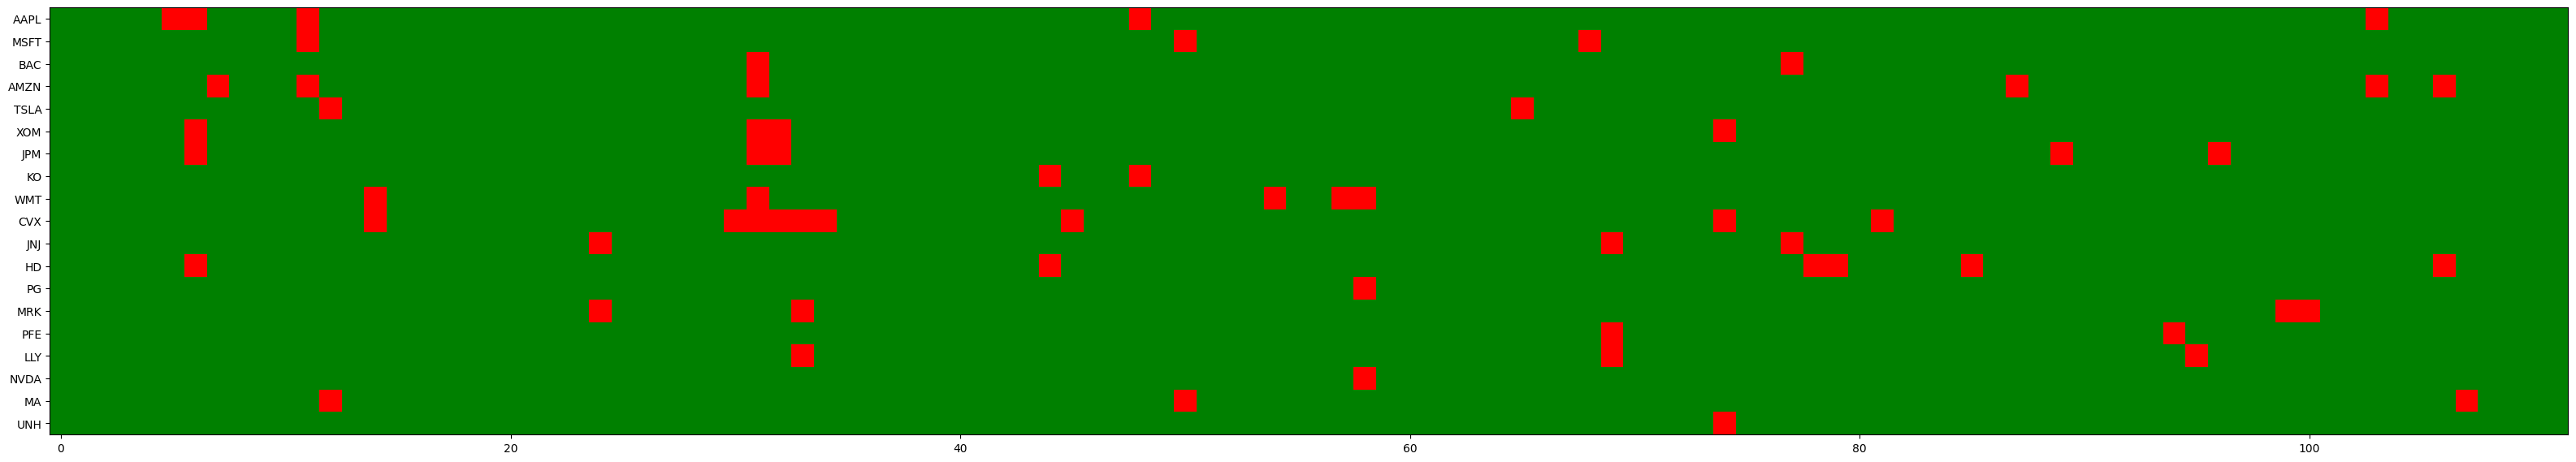

In [197]:
#creating the colormap

import matplotlib as mpl

cmap = (mpl.colors.ListedColormap(['red', 'green']))

bounds = [0,0.05]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

#

x_label_list = df_ks_test_p_values.index

fig, ax = plt.subplots(1,1)

labels = df_ks_test_p_values.index.to_list()

img = ax.imshow(df_ks_test_p_values, cmap=cmap, norm=norm)

y_label_list = labels

ax.set_yticks(range(19))

ax.set_yticklabels(x_label_list)


# fig.colorbar(
#     mpl.cm.ScalarMappable(cmap=cmap, norm=norm),
#     cax=ax,
#     ticks=bounds,
#     spacing='proportional',
#     orientation='horizontal',
#     label='Discrete intervals, some other units')

fig.set_size_inches(40,40)





# plt.figure(figsize = (30,30))
# plt.imshow(df_ks_test_p_values, )
# # plt.xticks(df_ks_test_p_values.index.to_list())
# plt.colorbar()

# plt.show()

ks_test_results_per_window_per_stock_p_values

In [198]:
print(ks_test_pd.iloc[0,:][1].pvalue)

0.571336004933722


In [199]:
# creating bolean mask to put on dataframe later, in order to only print occurences where p < 0.05
bolean_p_value_mask = []
for ks_tuple in ks_test_pd.iloc[1,:]:
    if ks_tuple[1] < 0.05:
        bolean_p_value_mask.append(True)
    else:
        bolean_p_value_mask.append(False)

In [200]:
bolean_p_value_mask.count(True)


3

In [201]:
#using the same code to print these occurences
non_stationairy_window_count = {}

for variable in range(len(ks_test_pd.index)):
    bolean_p_value_mask = []
    for ks_tuple in ks_test_pd.iloc[variable,:]:
        if ks_tuple[1] < 0.05:
            bolean_p_value_mask.append(True)
        else:
            bolean_p_value_mask.append(False)
    non_stationairy_window_count[(ks_test_pd.index.tolist()[variable])] = bolean_p_value_mask.count(True)
    print(f'windows in variable {ks_test_pd.index.tolist()[variable]} where p < 0.05 and timeseries is thus not strong stationary: {bolean_p_value_mask.count(True)}')


windows in variable AAPL where p < 0.05 and timeseries is thus not strong stationary: 5
windows in variable MSFT where p < 0.05 and timeseries is thus not strong stationary: 3
windows in variable BAC where p < 0.05 and timeseries is thus not strong stationary: 2
windows in variable AMZN where p < 0.05 and timeseries is thus not strong stationary: 6
windows in variable TSLA where p < 0.05 and timeseries is thus not strong stationary: 2
windows in variable XOM where p < 0.05 and timeseries is thus not strong stationary: 4
windows in variable JPM where p < 0.05 and timeseries is thus not strong stationary: 5
windows in variable KO where p < 0.05 and timeseries is thus not strong stationary: 2
windows in variable WMT where p < 0.05 and timeseries is thus not strong stationary: 5
windows in variable CVX where p < 0.05 and timeseries is thus not strong stationary: 9
windows in variable JNJ where p < 0.05 and timeseries is thus not strong stationary: 3
windows in variable HD where p < 0.05 an

In [202]:
non_stationairy_window_count = pd.DataFrame(non_stationairy_window_count, index = [0])
non_stationairy_window_count_T = non_stationairy_window_count.T
non_stationairy_window_count_T.columns = ['non-Stationairy window count']

In [203]:
non_stationairy_window_count_T

non-Stationairy window count
AAPL                             5
MSFT                             3
BAC                              2
AMZN                             6
TSLA                             2
XOM                              4
JPM                              5
KO                               2
WMT                              5
CVX                              9
JNJ                              3
HD                               6
PG                               1
MRK                              4
PFE                              2
LLY                              3
NVDA                             1
MA                               3
UNH                              1

We can see that the indexes where the ks_test p value is less then 5% are indeed printed. Next we do the same for all other stocks aswell, creating 1 dataframe

In [204]:
df_p_values_exceeding_5_percent_per_stock = pd.DataFrame([])


for stock in df.columns:
    bolean_p_value_mask = []
    for ks_tuple in ks_test_pd.iloc[df.columns.tolist().index(stock),:]:
        if ks_tuple[1] < 0.05:
            bolean_p_value_mask.append(True)
        else:
            bolean_p_value_mask.append(False)
    p_value_lowerthan_5_percent = ks_test_pd.loc[str(stock), bolean_p_value_mask]
    # print(p_value_lowerthan_5_percent)
    # print(df_p_values_exceeding_5_percent_per_stock)
    df_p_values_exceeding_5_percent_per_stock = pd.concat([df_p_values_exceeding_5_percent_per_stock, pd.DataFrame(p_value_lowerthan_5_percent)],axis = 1)


In [205]:
df_p_values_exceeding_5_percent_per_stock.shape

(38, 19)

In [206]:
df_p_values_exceeding_5_percent_per_stock

AAPL                         MSFT  \
5    (0.5, 0.012298612583953778)                          NaN   
6     (0.45, 0.0335416594061465)                          NaN   
11   (0.55, 0.00396729438660086)   (0.45, 0.0335416594061465)   
48   (0.5, 0.012298612583953778)                          NaN   
103   (0.45, 0.0335416594061465)                          NaN   
50                           NaN   (0.45, 0.0335416594061465)   
68                           NaN  (0.55, 0.00396729438660086)   
31                           NaN                          NaN   
77                           NaN                          NaN   
7                            NaN                          NaN   
87                           NaN                          NaN   
106                          NaN                          NaN   
12                           NaN                          NaN   
65                           NaN                          NaN   
32                           NaN                          NaN   
74                           NaN                          NaN   
89                           NaN                          NaN   
96                           NaN                          NaN   
44                           NaN                          NaN   
14                           NaN                          NaN   
54                           NaN                          NaN   
57                           NaN                          NaN   
58                           NaN                          NaN   
30                           NaN                          NaN   
33                           NaN                          NaN   
34                           NaN                          NaN   
45                           NaN                          NaN   
81                           NaN                          NaN   
24                           NaN                          NaN   
69                           NaN                          NaN   
78                           NaN                          NaN   
79                           NaN                          NaN   
85                           NaN                          NaN   
99                           NaN                          NaN   
100                          NaN                          NaN   
94                           NaN                          NaN   
95                           NaN                          NaN   
107                          NaN                          NaN   

                             BAC                         AMZN  \
5                            NaN                          NaN   
6                            NaN                          NaN   
11                           NaN   (0.45, 0.0335416594061465)   
48                           NaN                          NaN   
103                          NaN   (0.45, 0.0335416594061465)   
50                           NaN                          NaN   
68                           NaN                          NaN   
31   (0.5, 0.012298612583953778)  (0.55, 0.00396729438660086)   
77    (0.45, 0.0335416594061465)                          NaN   
7                            NaN   (0.45, 0.0335416594061465)   
87                           NaN  (0.6, 0.001115801546231492)   
106                          NaN  (0.55, 0.00396729438660086)   
12                           NaN                          NaN   
65                           NaN                          NaN   
32                           NaN                          NaN   
74                           NaN                          NaN   
89                           NaN                          NaN   
96                           NaN                          NaN   
44                           NaN                          NaN   
14                           NaN                          NaN   
54                           NaN                          NaN   
57                           NaN                          NaN 

df_p_values_exceeding_5_percent_per_stock

In [207]:
ks_test_pd.index

Index(['AAPL', 'MSFT', 'BAC', 'AMZN', 'TSLA', 'XOM', 'JPM', 'KO', 'WMT', 'CVX',
       'JNJ', 'HD', 'PG', 'MRK', 'PFE', 'LLY', 'NVDA', 'MA', 'UNH'],
      dtype='object')

In [208]:
ks_test_pd.iloc[1,:]

0        (0.25, 0.571336004933722)
1        (0.2, 0.8319696107963263)
2       (0.15, 0.9831368772656193)
3        (0.25, 0.571336004933722)
4        (0.25, 0.571336004933722)
                  ...             
107    (0.35, 0.17453300569806826)
108      (0.25, 0.571336004933722)
109     (0.15, 0.9831368772656193)
110    (0.35, 0.17453300569806826)
111      (0.2, 0.8319696107963263)
Name: MSFT, Length: 112, dtype: object

ks_test_pd[df['AAPL']]]

for stock in range(len(df.columns))
array_list_of_windows_per_stock[]

In [209]:
#making the index date time
dataframe_stock_data_selected_stocks_pct_change.index = pd.DatetimeIndex(dataframe_stock_data_selected_stocks_pct_change["Date"])

In [210]:
#slicing off the date column

dataframe_stock_data_selected_stocks_pct_change_with_date_index = dataframe_stock_data_selected_stocks_pct_change.iloc[:,:-1]

In [211]:
dataframe_stock_data_selected_stocks_pct_change_with_date_index

AAPL      MSFT       BAC      AMZN      TSLA       XOM  \
Date                                                                     
2011-01-04  0.005219  0.003931  0.003524  0.004288  0.001878  0.004695   
2011-01-05  0.008180 -0.003204  0.018258  0.013026  0.005999 -0.002670   
2011-01-06 -0.000808  0.029286 -0.004138 -0.008324  0.039135  0.006426   
2011-01-07  0.007161 -0.007634 -0.013158 -0.001991  0.012912  0.005453   
2011-01-10  0.018833 -0.013287  0.010526 -0.004367  0.007436 -0.006086   
...              ...       ...       ...       ...       ...       ...   
2019-12-23  0.016319  0.000000  0.006007  0.003638  0.033605  0.005004   
2019-12-24  0.000951 -0.000191  0.001422 -0.002114  0.014384 -0.003842   
2019-12-26  0.019840  0.008197  0.008518  0.044467  0.013380  0.001571   
2019-12-27 -0.000379  0.001828 -0.004786  0.000551 -0.001300 -0.003422   
2019-12-30  0.005935 -0.008619 -0.005658 -0.012253 -0.036433 -0.005866   

                 JPM        KO       WMT       CVX       JNJ        HD  \
Date                                                                     
2011-01-04  0.014473 -0.020699  0.003849 -0.003698  0.008437 -0.018125   
2011-01-05  0.012229 -0.005950 -0.006573 -0.001747 -0.000631 -0.003172   
2011-01-06 -0.004922 -0.007245 -0.008270 -0.008202 -0.001580 -0.004051   
2011-01-07 -0.018885 -0.001745  0.002224  0.005514 -0.009650 -0.001162   
2011-01-10 -0.005500  0.002225 -0.006472 -0.008554 -0.007029  0.000291   
...              ...       ...       ...       ...       ...       ...   
2019-12-23 -0.000292 -0.001092 -0.010475  0.005431  0.002602 -0.008952   
2019-12-24  0.002770 -0.003642  0.004033  0.000083 -0.003483  0.006660   
2019-12-26  0.010612  0.005666  0.000084  0.002160 -0.000685  0.000680   
2019-12-27  0.000719  0.005998  0.000586 -0.002487 -0.000548 -0.003849   
2019-12-30 -0.003666 -0.001445 -0.001589 -0.003741 -0.003088 -0.012093   

                  PG       MRK       PFE       LLY      NVDA        MA  \
Date                                                                     
2011-01-04  0.002779  0.008602  0.017534  0.000857 -0.003160  0.012905   
2011-01-05 -0.002310  0.005777  0.006671 -0.007137  0.076728  0.029459   
2011-01-06 -0.001698  0.013676  0.003865  0.004601  0.138398  0.004258   
2011-01-07 -0.002937  0.007825  0.008801 -0.001145  0.027936 -0.000130   
2011-01-10 -0.002171 -0.004016 -0.004362 -0.011748  0.038248 -0.003851   
...              ...       ...       ...       ...       ...       ...   
2019-12-23 -0.003670  0.001747  0.002294 -0.009665 -0.002298 -0.004354   
2019-12-24  0.002562 -0.003270 -0.000763 -0.000305 -0.000837  0.000707   
2019-12-26  0.000000 -0.001093  0.002291  0.000229  0.002389  0.005782   
2019-12-27  0.006948  0.001752 -0.001524  0.002898 -0.009699  0.005147   
2019-12-30 -0.012848 -0.005137 -0.010427 -0.001673 -0.019209 -0.010042   

                 UNH         V  
Date                            
2011-01-04  0.009157  0.001135  
2011-01-05  0.003202  0.021105  
2011-01-06  0.020751  0.014981  
2011-01-07  0.002084 -0.002870  
2011-01-10  0.000000 -0.015762  
...              ...       ...  
2019-12-23  0.008544 -0.004894  
2019-12-24 -0.001864  0.002619  
2019-12-26  0.003769  0.008477  
2019-12-27  0.001082  0.001216  
2019-12-30 -0.007163 -0.008237  

[2262 rows x 20 columns]

In [212]:
df_daily = dataframe_stock_data_selected_stocks_pct_change_with_date_index

In [213]:
Var_model_daily = VAR(df_daily)

C:\Users\Nitai Nijholt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [214]:
Var_model_daily.select_order(maxlags = 2).summary()

<class 'statsmodels.iolib.table.SimpleTable'>

The information criteria confirm that 0 lags is the right amount of lags to use

# Getting the sentiment Data

In [215]:
df_sentiment_daily = pd.read_csv(r"C:\Users\Nitai Nijholt\OneDrive\Documents\GitHub\Project_SDA\Data\sentiment_daily_data.csv")
print(df_sentiment_daily.index)

#changing index to date time
df_sentiment_daily.index = pd.DatetimeIndex(df_sentiment_daily["release_date"])

RangeIndex(start=0, stop=2137, step=1)


In [216]:
print(df_sentiment_daily.index)

DatetimeIndex(['2014-01-04', '2014-01-05', '2014-01-06', '2014-01-07',
               '2014-01-08', '2014-01-09', '2014-01-10', '2014-01-12',
               '2014-01-13', '2014-01-14',
               ...
               '2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07',
               '2020-02-08', '2020-02-09', '2020-02-10', '2020-02-11',
               '2020-02-12', '2020-02-13'],
              dtype='datetime64[ns]', name='release_date', length=2137, freq=None)


In [217]:
df_sentiment_daily_wo_release_date_col = df_sentiment_daily.drop('release_date', axis = 1)


In [218]:
df_sentiment_daily_wo_release_date_col.columns

Index(['AAPL_daily', 'AAPL_diff', 'AMZN_daily', 'AMZN_diff', 'BAC_daily',
       'BAC_diff', 'CVX_daily', 'CVX_diff', 'HD_daily', 'HD_diff', 'JNJ_daily',
       'JNJ_diff', 'JPM_daily', 'JPM_diff', 'KO_daily', 'KO_diff', 'LLY_daily',
       'LLY_diff', 'MRK_daily', 'MRK_diff', 'MSFT_daily', 'MSFT_diff',
       'PFE_daily', 'PFE_diff', 'PG_daily', 'PG_diff', 'TSLA_daily',
       'TSLA_diff', 'WMT_daily', 'WMT_diff', 'XOM_daily', 'XOM_diff'],
      dtype='object')

In [219]:
df_sentiment_daily_wo_release_date_col['AAPL_diff']



release_date
2014-01-04   -0.9876
2014-01-05    1.6635
2014-01-06    0.0000
2014-01-07   -2.9077
2014-01-08    0.0000
               ...  
2020-02-09    0.0000
2020-02-10    0.0000
2020-02-11    0.0000
2020-02-12    0.0000
2020-02-13    0.0000
Name: AAPL_diff, Length: 2137, dtype: float64

In [220]:
df = df_sentiment_daily_wo_release_date_col
Stationary_series =[]
Non_stationairy_series = []
#df.columns[:-1] cause we want to skip the date column
for variable in df.columns[:-1]:
    print(f"Output results augmented Dickey Fuller test for variable: {variable}")
    results_augmented_dickey_fuller = adfuller(df[variable])
    print('ADF Statistic: %f' % results_augmented_dickey_fuller[0])
    print('p-value: %f' % results_augmented_dickey_fuller[1])
    print('Critical Values:')
    for key, value in results_augmented_dickey_fuller[4].items():
        print('\t%s: %.3f' % (key, value))

    if results_augmented_dickey_fuller[1] <= 0.05:
        print("Conclusion: p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary")
        print('\n')
        Stationary_series.append(variable)
    else:
        print("Conclusion: p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary")
        print('\n')
        Non_stationairy_series.append(variable)
        
print(f'Stationary_series: {Stationary_series}, Non_stationairy_series: {Non_stationairy_series}')

Output results augmented Dickey Fuller test for variable: AAPL_daily
ADF Statistic: -4.180668
p-value: 0.000710
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Conclusion: p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary


Output results augmented Dickey Fuller test for variable: AAPL_diff
ADF Statistic: -17.721392
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Conclusion: p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary


Output results augmented Dickey Fuller test for variable: AMZN_daily
ADF Statistic: -3.578517
p-value: 0.006185
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Conclusion: p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary


Output results augmented Dickey Fuller test for variable: AMZN_diff
ADF Statistic: -13.775114
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.86

In [221]:
combined_df = pd.DataFrame(dataframe_stock_data_selected_stocks_pct_change_with_date_index['AAPL']).merge(df_sentiment_daily_wo_release_date_col['AAPL_diff'], left_index = True, right_index = True)
Var_Apple = VAR(combined_df)

C:\Users\Nitai Nijholt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [222]:
Var_Apple.select_order(maxlags = 35).summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [223]:
Var_Apple_results = Var_Apple.fit(13)

In [224]:
Var_Apple_results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 12, Dec, 2022
Time:                     15:27:23
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -3.27623
Nobs:                     1492.00    HQIC:                  -3.39675
Log likelihood:          -1592.73    FPE:                  0.0311691
AIC:                     -3.46833    Det(Omega_mle):       0.0300709
--------------------------------------------------------------------
Results for equation AAPL
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                 0.001052         0.000412            2.556           0.011
L1.AAPL               0.018722         0.026095            0.717           0.473
L1.AAPL_diff         -0.000015         0.000035           -0.

# Testing assumptions

assumption 1:Testing that the mean of the residuals = 0:

In [225]:
Var_Apple_results.resid['AAPL_diff'].mean()

-2.857410465523191e-15

<AxesSubplot: >

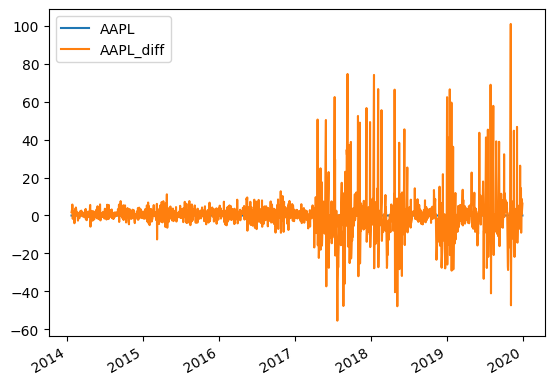

In [226]:
Var_Apple_results.resid.plot()

assumption 2: testing that the coarianve matrix of the errors is postiive semi definite

assumption 3: testing for residual auto correlation

In [227]:
Var_Apple_results.test_whiteness(14).summary()

<class 'statsmodels.iolib.table.SimpleTable'>

Testing for normally distributed data

In [228]:
Var_Apple_results.test_normality().summary()

<class 'statsmodels.iolib.table.SimpleTable'>

# Forecasting

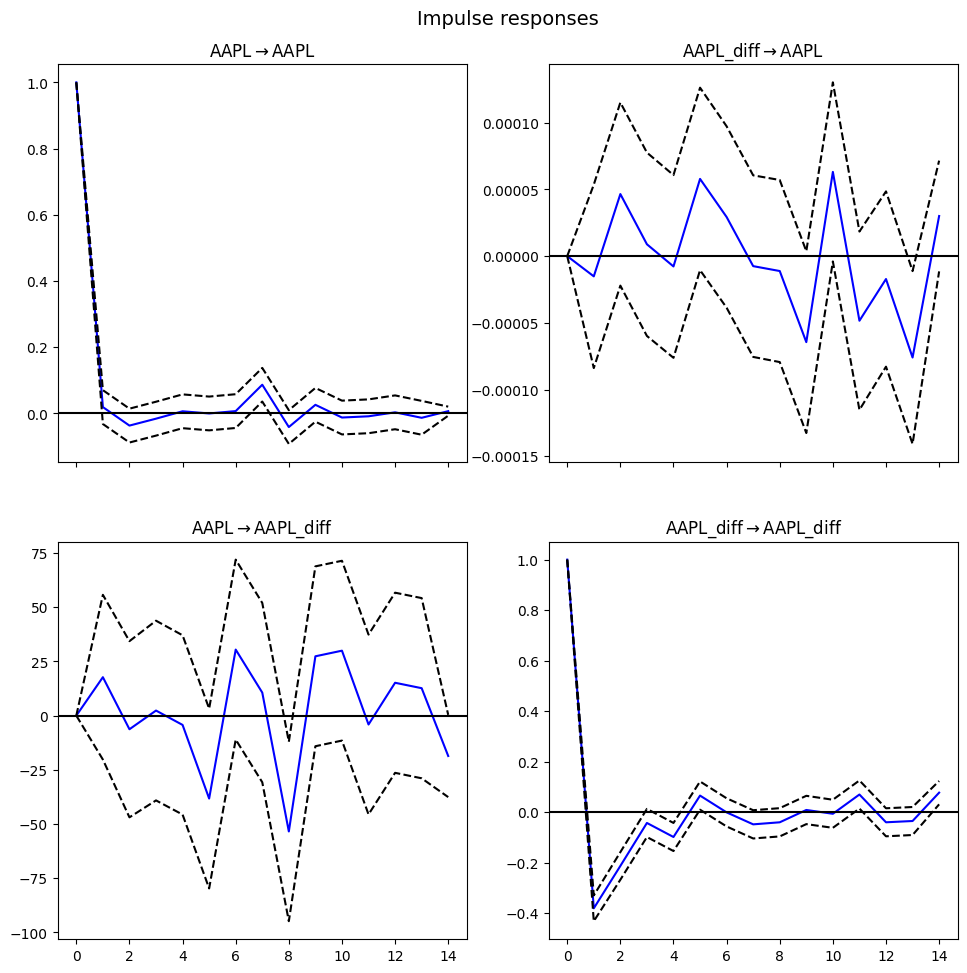

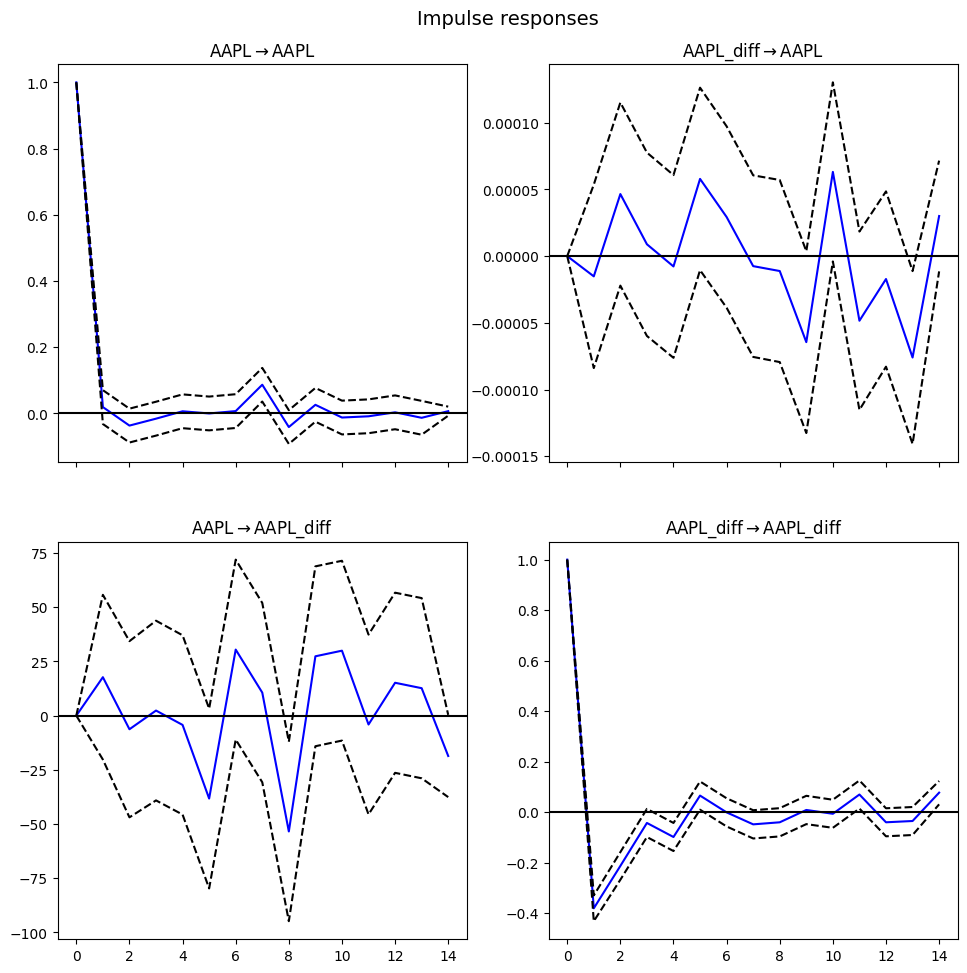

In [311]:
Var_Apple_results.irf(14).plot()

In [230]:
hist = msft.history(period="max")

In [312]:
# last date in train set: 2019-12-30
# downloading testset


AAPL_stock_price_future = yf.Ticker("AAPL")
Ground_thuth_stockprice_21_days = pd.DataFrame(AAPL_stock_price_future.history(start = '2019-12-30', end = '2020-1-20')['Close'])

In [313]:
# we save the value at 2019-12-30 as the initial price, this wil be needed to undo the transformation in order to do the forecasting

initial_value = Ground_thuth_stockprice_21_days.iloc[0,:]
print('initial_value', initial_value)
Ground_thuth_stockprice_21_days


initial_value Close    71.398903
Name: 2019-12-30 00:00:00-05:00, dtype: float64


Close
Date                                
2019-12-30 00:00:00-05:00  71.398903
2019-12-31 00:00:00-05:00  71.920570
2020-01-02 00:00:00-05:00  73.561531
2020-01-03 00:00:00-05:00  72.846367
2020-01-06 00:00:00-05:00  73.426826
2020-01-07 00:00:00-05:00  73.081505
2020-01-08 00:00:00-05:00  74.257095
2020-01-09 00:00:00-05:00  75.834381
2020-01-10 00:00:00-05:00  76.005829
2020-01-13 00:00:00-05:00  77.629639
2020-01-14 00:00:00-05:00  76.581390
2020-01-15 00:00:00-05:00  76.253189
2020-01-16 00:00:00-05:00  77.208389
2020-01-17 00:00:00-05:00  78.063171

In [314]:
#since we have bank holidays, and other days on which no trading happens, we assume the model predicts the stock values on the day the market is open.
# thus, a ground thruth windows of 21 days will result in 14 effective days.

print(Ground_thuth_stockprice_21_days.index)
print(len(Ground_thuth_stockprice_21_days.index))

DatetimeIndex(['2019-12-30 00:00:00-05:00', '2019-12-31 00:00:00-05:00',
               '2020-01-02 00:00:00-05:00', '2020-01-03 00:00:00-05:00',
               '2020-01-06 00:00:00-05:00', '2020-01-07 00:00:00-05:00',
               '2020-01-08 00:00:00-05:00', '2020-01-09 00:00:00-05:00',
               '2020-01-10 00:00:00-05:00', '2020-01-13 00:00:00-05:00',
               '2020-01-14 00:00:00-05:00', '2020-01-15 00:00:00-05:00',
               '2020-01-16 00:00:00-05:00', '2020-01-17 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', freq=None)
14


In [315]:
df_forecast = pd.DataFrame(Var_Apple_results.forecast(np.array(combined_df), 14))

# renaming columns of the forecast

df_forecast.columns = ['AAPL_stock_price', 'APPL_sentiment']

In [316]:
initial_value[0]

71.3989028930664

In [317]:


# recall AAPL stock prive is percent change, and APPL setiment is differences

# undoing the differencing of APPL_sentiment by taking the cumsum

df_forecast['APPL_sentiment'].cumsum(axis=0)

forecasted_prices_AAPL = df_forecast.assign(AAPL_stock_price_PCT_undone=df_forecast.AAPL_stock_price.pct_change(-1)+initial_value[0])




In [318]:
forecasted_prices_AAPL['AAPL_stock_price_PCT_undone'].index = Ground_thuth_stockprice_21_days.index

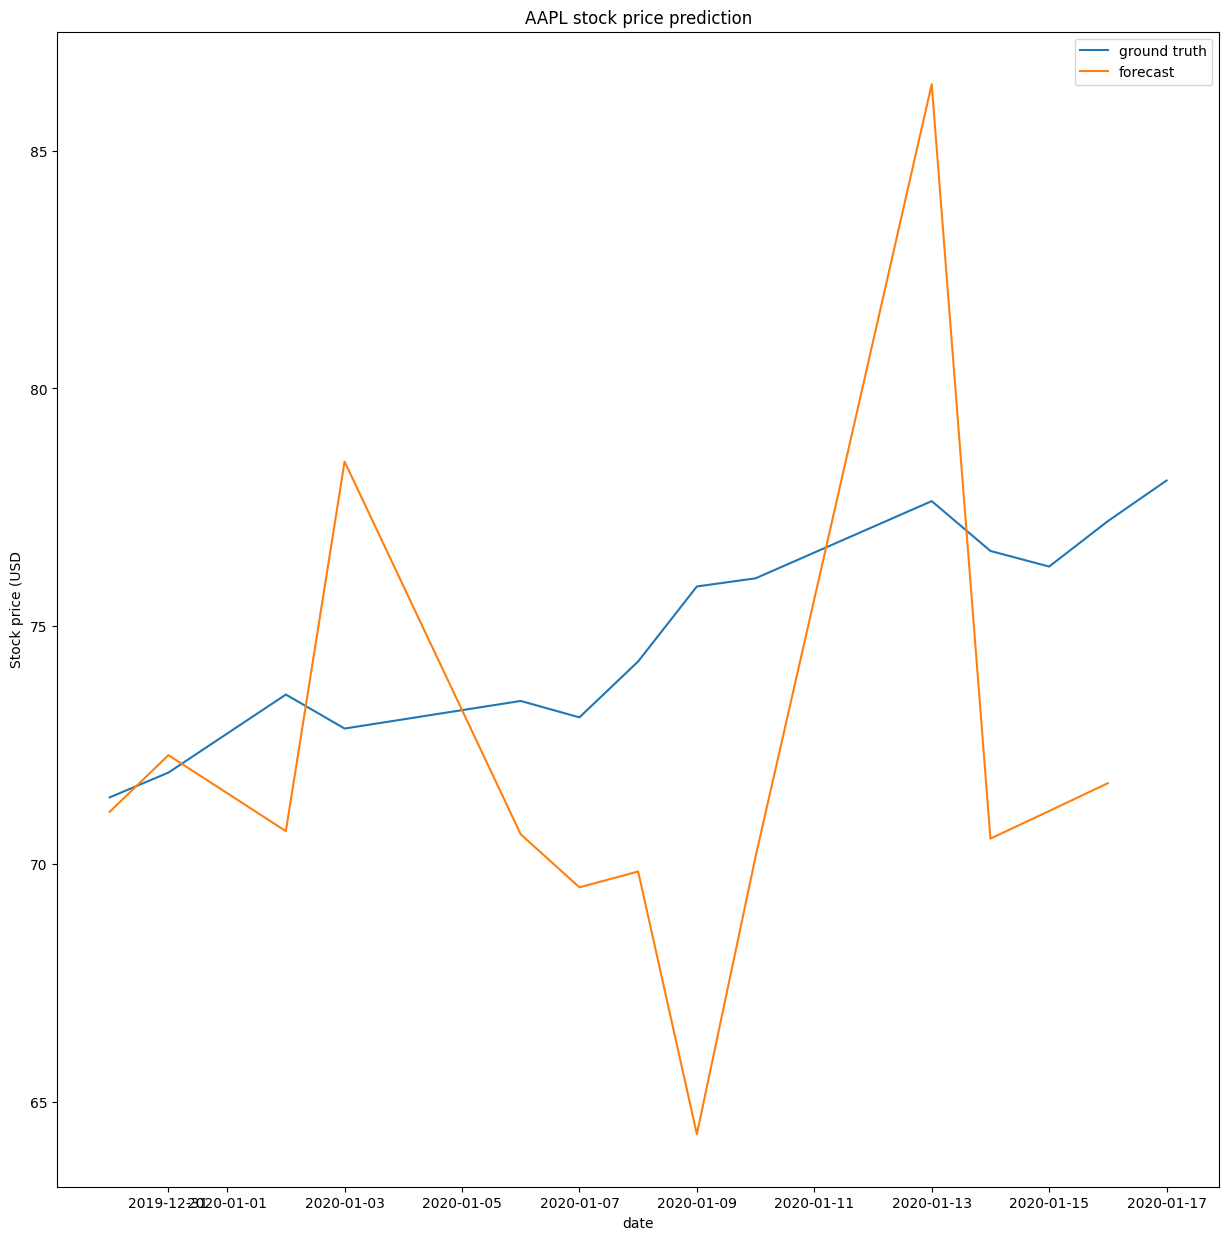

In [333]:
plt.figure(figsize=(15,15))
plt.xlabel('date')
plt.ylabel('Stock price (USD')
# plt.figure(figsize=(15,15))
plt.plot(Ground_thuth_stockprice_21_days, label='ground truth')
plt.plot(forecasted_prices_AAPL['AAPL_stock_price_PCT_undone'], label='forecast')
plt.legend()
plt.title("AAPL stock price prediction")
plt.show()

# Old code

In [320]:
dataframe_stock_data_reselected_stocks_pct_change_with_date_index = dataframe_stock_data_selected_stocks_pct_change_with_date_index.drop()

ValueError: Need to specify at least one of 'labels', 'index' or 'columns'

In [ ]:
list_of_stocks = []
for col in df_sentiment_daily.columns.tolist()[1:]:
    col = col[]

['release_date',
 'AAPL_daily',
 'AAPL_diff',
 'AMZN_daily',
 'AMZN_diff',
 'BAC_daily',
 'BAC_diff',
 'CVX_daily',
 'CVX_diff',
 'HD_daily',
 'HD_diff',
 'JNJ_daily',
 'JNJ_diff',
 'JPM_daily',
 'JPM_diff',
 'KO_daily',
 'KO_diff',
 'LLY_daily',
 'LLY_diff',
 'MRK_daily',
 'MRK_diff',
 'MSFT_daily',
 'MSFT_diff',
 'PFE_daily',
 'PFE_diff',
 'PG_daily',
 'PG_diff',
 'TSLA_daily',
 'TSLA_diff',
 'WMT_daily',
 'WMT_diff',
 'XOM_daily',
 'XOM_diff']

In [ ]:
Var_model_results_daily = Var_model_daily.fit(0)

In [ ]:
df_sentiment_daily['AAPL_daily']

0        0.9747
1        2.6382
2        2.6382
3       -0.2695
4       -0.2695
         ...   
2132    33.1780
2133    33.1780
2134    33.1780
2135    33.1780
2136    33.1780
Name: AAPL_daily, Length: 2137, dtype: float64

In [ ]:
dataframe_stock_data_selected_stocks_pct_change_with_date_index[ 'AAPL']

Date
2011-01-04    0.005219
2011-01-05    0.008180
2011-01-06   -0.000808
2011-01-07    0.007161
2011-01-10    0.018833
                ...   
2019-12-23    0.016319
2019-12-24    0.000951
2019-12-26    0.019840
2019-12-27   -0.000379
2019-12-30    0.005935
Name: AAPL, Length: 2262, dtype: float64

In [ ]:
Var_model_results_daily.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 09, Dec, 2022
Time:                     23:07:17
--------------------------------------------------------------------
No. of Equations:         20.0000    BIC:                   -179.924
Nobs:                     2262.00    HQIC:                  -179.956
Log likelihood:           139378.    FPE:                6.88935e-79
AIC:                     -179.974    Det(Omega_mle):     6.82872e-79
--------------------------------------------------------------------
Results for equation AAPL
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         0.000999         0.000340            2.941           0.003

Results for equation MSFT
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------

In [ ]:
#results indicate significant residual auto correlation

Var_model_results_daily.test_whiteness().summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [ ]:
#Normality looks okay

Var_model_results_daily.test_normality().summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [ ]:
#testing for ARCH effects

residuals = Var_model_results_daily.resid
print("Engle’s Test for Autoregressive Conditional Heteroscedasticity (ARCH)\n")
for var in residuals.columns:
    het_test_result= het_arch(residuals[var],nlags=0)
print(het_test_result)
    # print(f'the Lagrange multiplier test of variable: {residuals.columns[var]} has test statistic: {het_test_result[0]} and has p-value: {het_test_result[1]}')
    # if het_test_result[1] <=0.05:
    #     print('found p-value < 0.05, so H0: no Autoregressive Conditional Heteroscedasticity is rejected\n')
    # else:
    #     print('found p-value > 0.05, so H0: no Autoregressive Conditional Heteroscedasticity is not rejected\n')

Engle’s Test for Autoregressive Conditional Heteroscedasticity (ARCH)

(5.022648963404208e-13, nan, nan, nan)


het_test_result

In [ ]:
dataframe_stock_data_selected_stocks_pct_change_with_date_index.resample("MS").sum()

AAPL      MSFT       BAC      AMZN      TSLA       XOM  \
Date                                                                     
2011-01-01  0.030964 -0.007098 -0.029679 -0.077011 -0.089929  0.079900   
2011-02-01  0.041850 -0.035725  0.042695  0.023624  0.002679  0.065533   
2011-03-01 -0.010508 -0.044526 -0.065444  0.041807  0.165641 -0.014513   
2011-04-01  0.005919  0.022165 -0.080462  0.087751  0.000660  0.045750   
2011-05-01 -0.005204 -0.028282 -0.042873  0.007367  0.098482 -0.045715   
...              ...       ...       ...       ...       ...       ...   
2019-08-01 -0.010856  0.018236 -0.103879 -0.046722 -0.061252 -0.066904   
2019-09-01  0.072270  0.009597  0.067343 -0.021693  0.073461  0.031332   
2019-10-01  0.107217  0.032556  0.071825  0.024313  0.289684 -0.042188   
2019-11-01  0.075723  0.058074  0.064210  0.014156  0.050924  0.022628   
2019-12-01  0.088225  0.040663  0.059958  0.026658  0.234171  0.020399   

                 JPM        KO       WMT       CVX       JNJ        HD  \
Date                                                                     
2011-01-01  0.033442 -0.036512  0.028109  0.032635 -0.049249  0.042195   
2011-02-01  0.040631  0.017257 -0.074472  0.097316  0.037190  0.019522   
2011-03-01 -0.010590  0.045576  0.008807  0.037233 -0.035734 -0.001961   
2011-04-01 -0.003534  0.017252  0.055133  0.019517  0.105023  0.002869   
2011-05-01 -0.052412 -0.009302  0.011268 -0.032988  0.032863 -0.023321   
...              ...       ...       ...       ...       ...       ...   
2019-08-01 -0.050793  0.045872  0.042869 -0.032224 -0.005754  0.067955   
2019-09-01  0.070112 -0.003262  0.038403  0.008618  0.008579  0.024859   
2019-10-01  0.069619  0.001157 -0.011349 -0.019358  0.024125  0.011819   
2019-11-01  0.053797 -0.011088  0.015984  0.020167  0.048105 -0.059505   
2019-12-01  0.051789  0.034741  0.007340  0.023757  0.055658 -0.007411   

                  PG       MRK       PFE       LLY      NVDA        MA  \
Date                                                                     
2011-01-01 -0.017392 -0.080182  0.030665 -0.006054  0.444329  0.070518   
2011-02-01 -0.000833 -0.017185  0.067230  0.008342 -0.037925  0.018203   
2011-03-01 -0.022643  0.026375  0.055991  0.018287 -0.193429  0.047524   
2011-04-01  0.060905  0.086272  0.033152  0.051637  0.085149  0.093782   
2011-05-01  0.032340  0.022563  0.033597  0.052382  0.013506  0.041929   
...              ...       ...       ...       ...       ...       ...   
2019-08-01  0.020020  0.042795 -0.076808  0.045104  0.006434  0.037227   
2019-09-01  0.034832 -0.018607  0.011389 -0.008884  0.043129 -0.033012   
2019-10-01  0.009139  0.031788  0.067101  0.021073  0.149411  0.023659   
2019-11-01 -0.018587  0.006778  0.014610  0.036108  0.079778  0.055162   
2019-12-01  0.019921  0.050415  0.010548  0.113474  0.071691  0.019167   

                 UNH         V  
Date                            
2011-01-01  0.103572 -0.007633  
2011-02-01  0.037654  0.048633  
2011-03-01  0.065074  0.009759  
2011-04-01  0.089808  0.060242  
2011-05-01 -0.004701  0.039902  
...              ...       ...  
2019-08-01 -0.059207  0.020630  
2019-09-01 -0.067471 -0.048552  
2019-10-01  0.155539  0.041352  
2019-11-01  0.104263  0.033410  
2019-12-01  0.053298  0.018297  

[108 rows x 20 columns]

In [ ]:
df_summed_monthly = dataframe_stock_data_selected_stocks_pct_change_with_date_index.resample("MS").sum()
df_mean_per_month = dataframe_stock_data_selected_stocks_pct_change_with_date_index.resample("MS").mean()

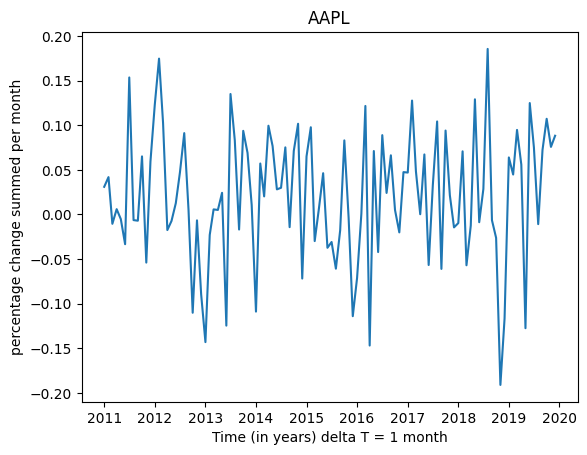

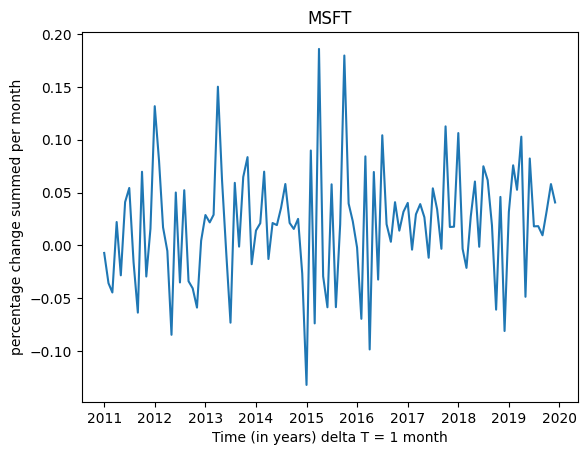

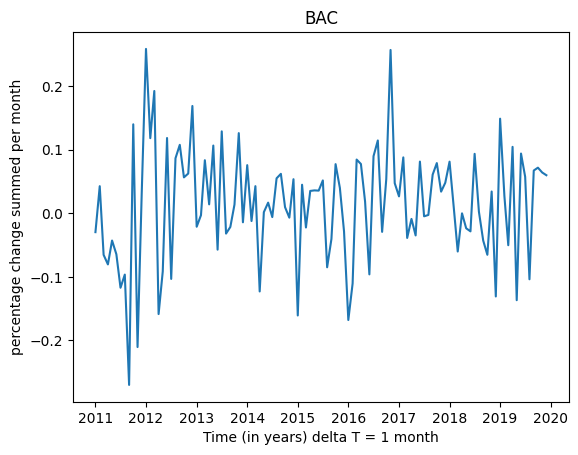

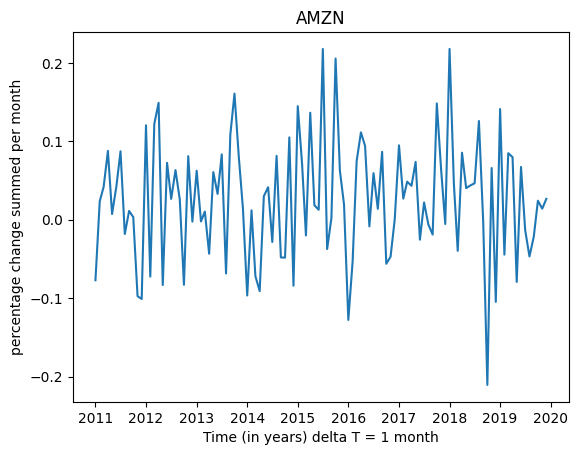

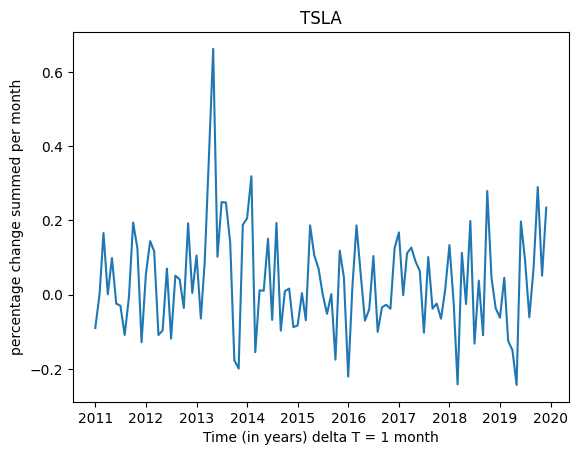

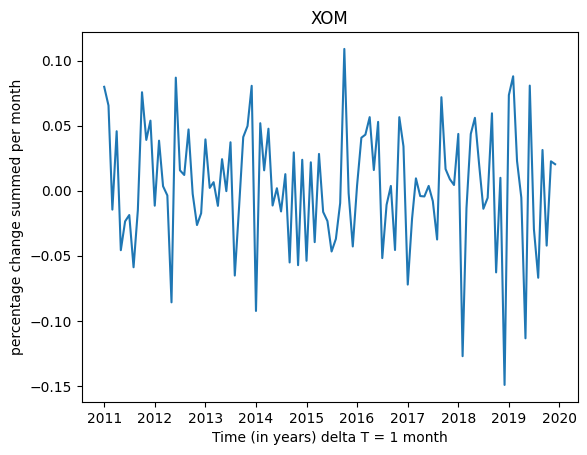

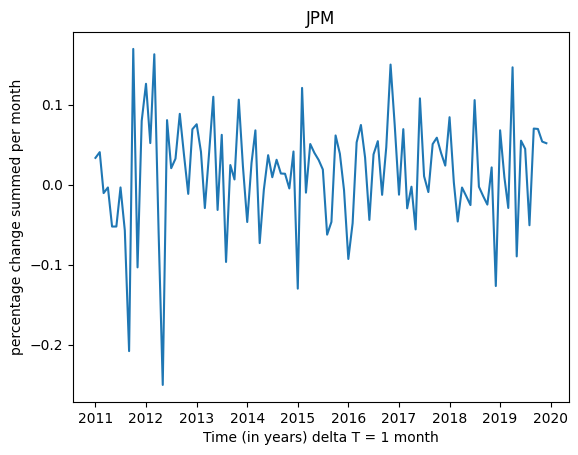

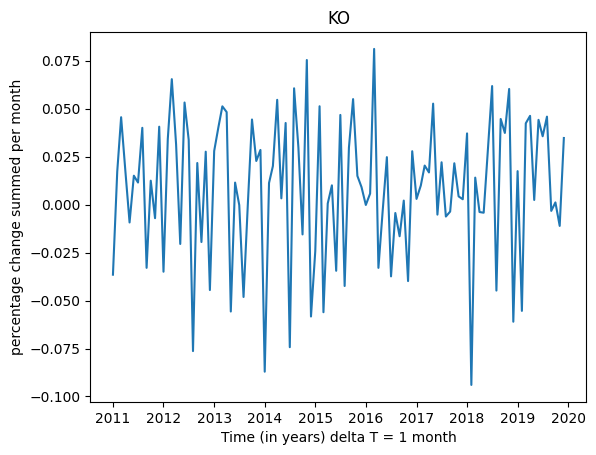

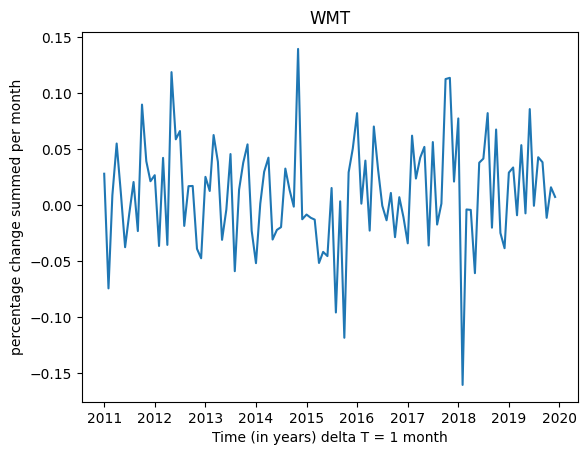

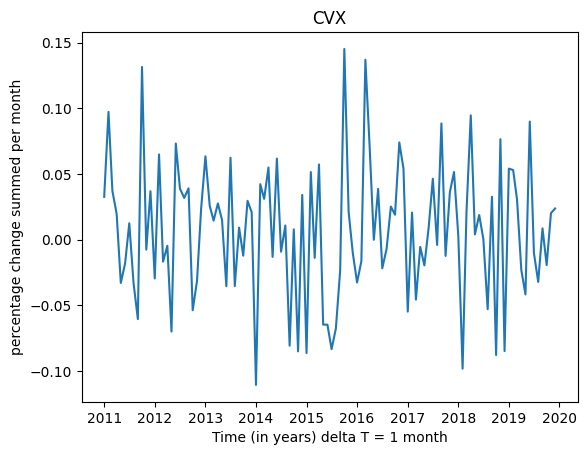

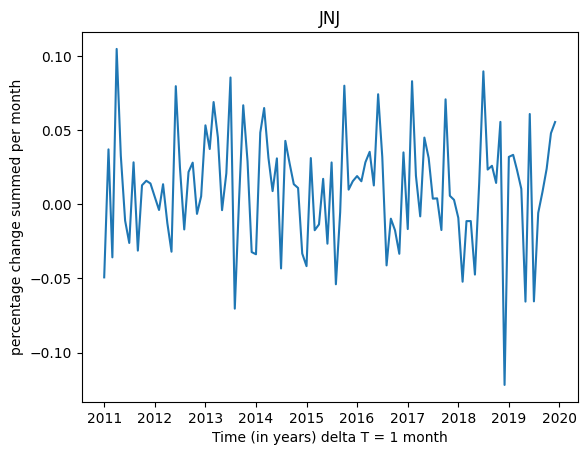

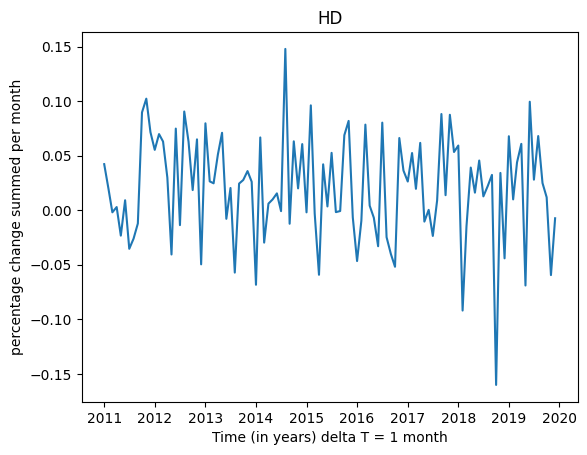

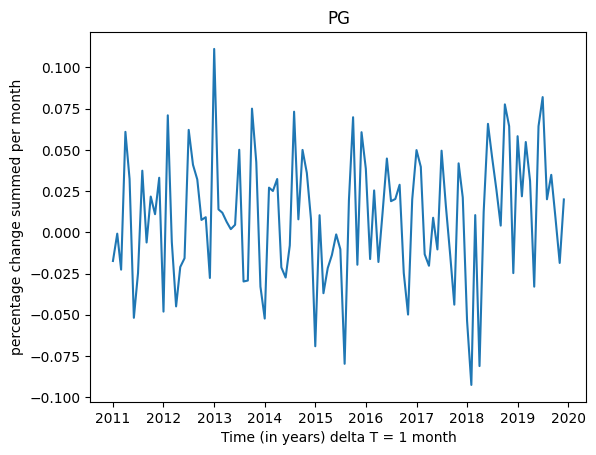

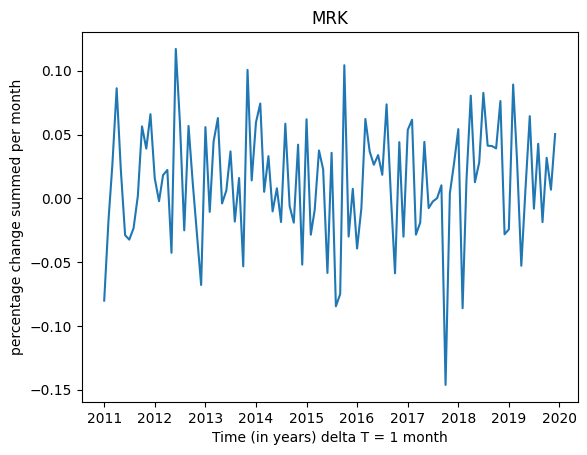

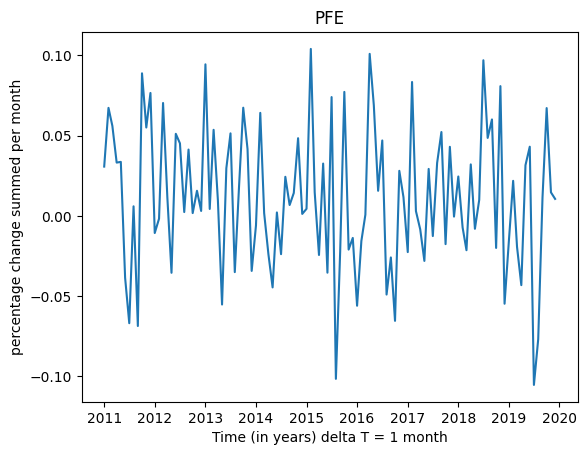

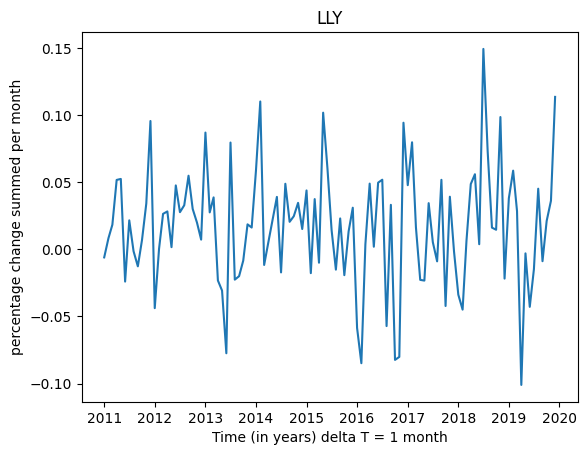

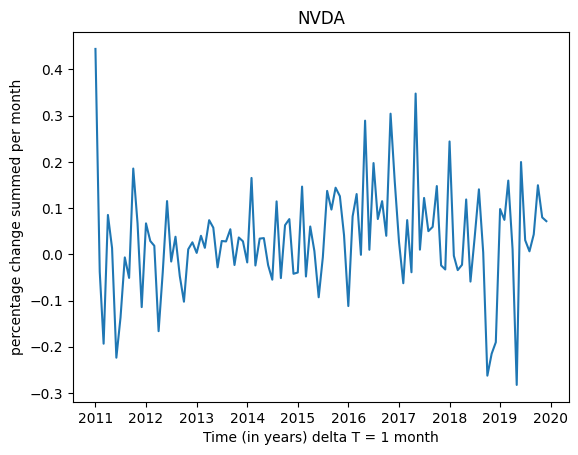

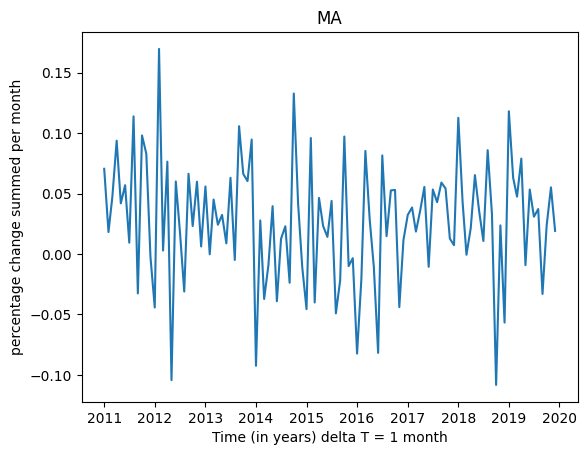

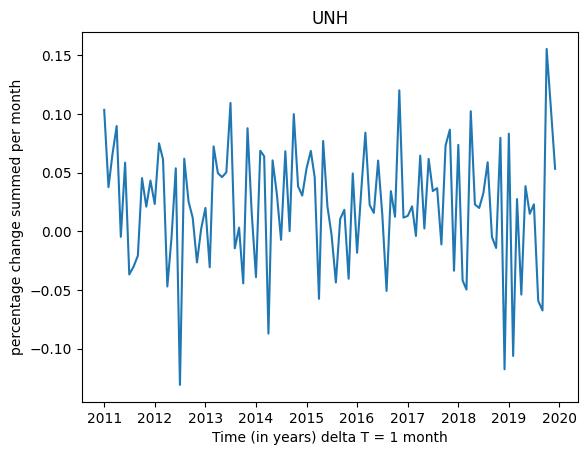

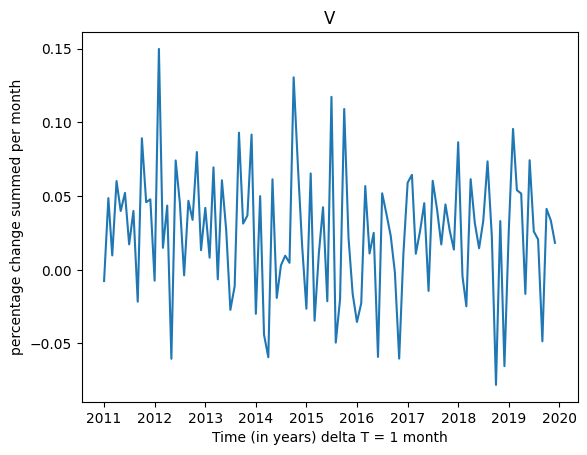

In [ ]:
for ticker in df_summed_monthly.columns:
    plt.title(str(ticker))
    plt.plot(df_summed_monthly[ticker])
    plt.xlabel('Time (in years) delta T = 1 month')
    plt.ylabel('percentage change summed per month')
    plt.show()


In [ ]:
df= df_summed_monthly

#checking if the timeseries are stationairy

Stationary_series =[]
Non_stationairy_series = []
#df.columns[:-1] cause we want to skip the date column
for variable in df.columns[:-1]:
    print(f"Output results augmented Dickey Fuller test for variable: {variable}")
    results_augmented_dickey_fuller = adfuller(df[variable])
    print('ADF Statistic: %f' % results_augmented_dickey_fuller[0])
    print('p-value: %f' % results_augmented_dickey_fuller[1])
    print('Critical Values:')
    for key, value in results_augmented_dickey_fuller[4].items():
        print('\t%s: %.3f' % (key, value))

    if results_augmented_dickey_fuller[1] <= 0.05:
        print("Conclusion: p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary")
        print('\n')
        Stationary_series.append(variable)
    else:
        print("Conclusion: p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary")
        print('\n')
        Non_stationairy_series.append(variable)
        
print(f'Stationary_series: {Stationary_series}, Non_stationairy_series: {Non_stationairy_series}')

Output results augmented Dickey Fuller test for variable: AAPL
ADF Statistic: -9.741567
p-value: 0.000000
Critical Values:
	1%: -3.493
	5%: -2.889
	10%: -2.581
Conclusion: p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary


Output results augmented Dickey Fuller test for variable: MSFT
ADF Statistic: -6.995052
p-value: 0.000000
Critical Values:
	1%: -3.495
	5%: -2.890
	10%: -2.582
Conclusion: p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary


Output results augmented Dickey Fuller test for variable: BAC
ADF Statistic: -10.641796
p-value: 0.000000
Critical Values:
	1%: -3.493
	5%: -2.889
	10%: -2.581
Conclusion: p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary


Output results augmented Dickey Fuller test for variable: AMZN
ADF Statistic: -11.801421
p-value: 0.000000
Critical Values:
	1%: -3.493
	5%: -2.889
	10%: -2.581
Conclusi

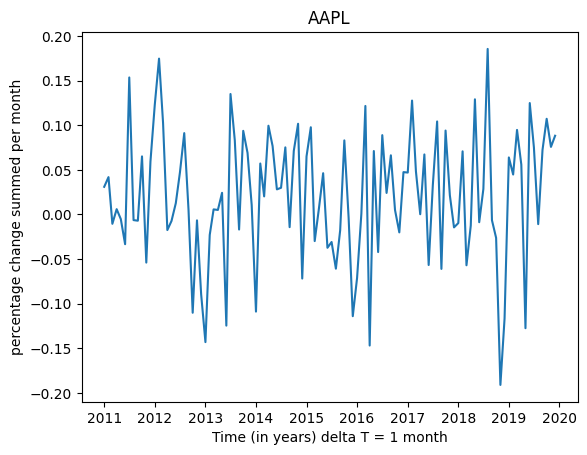

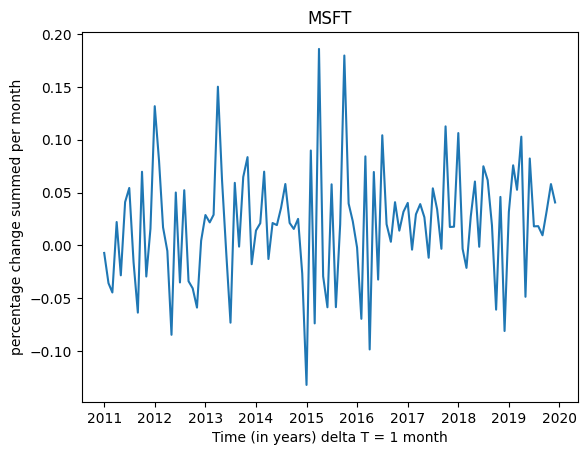

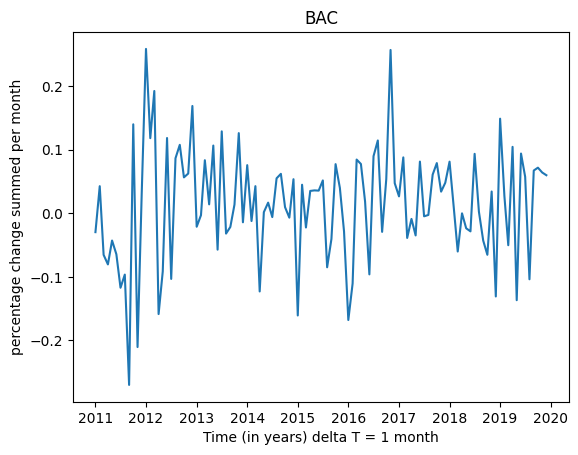

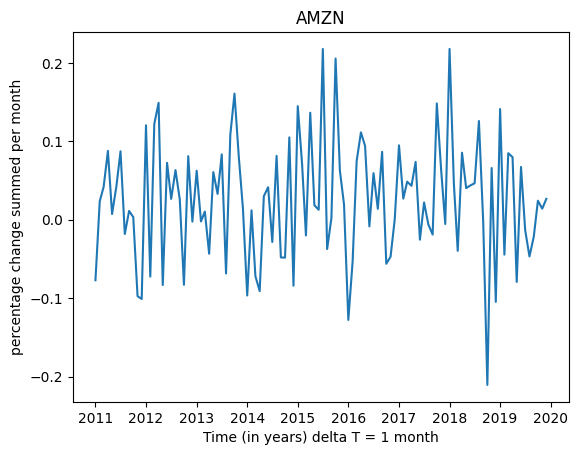

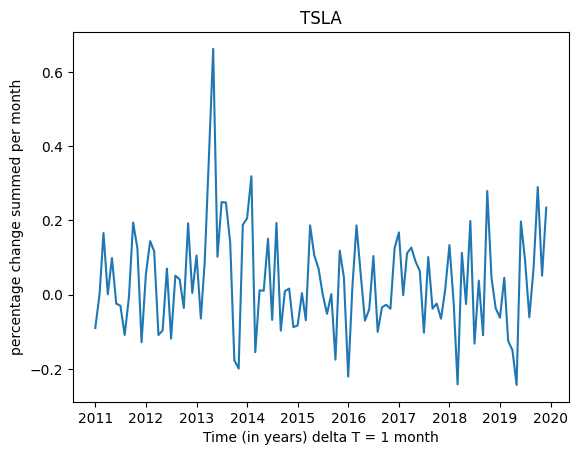

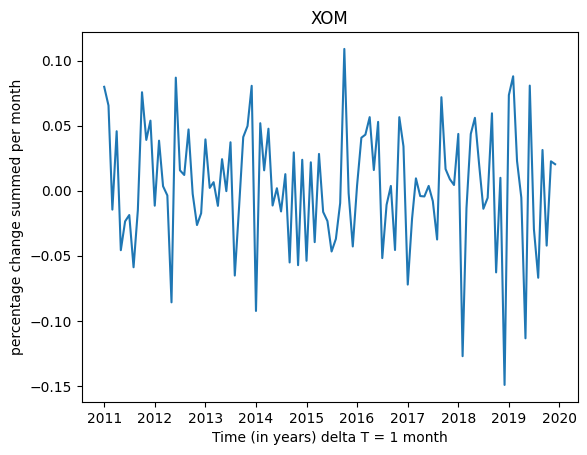

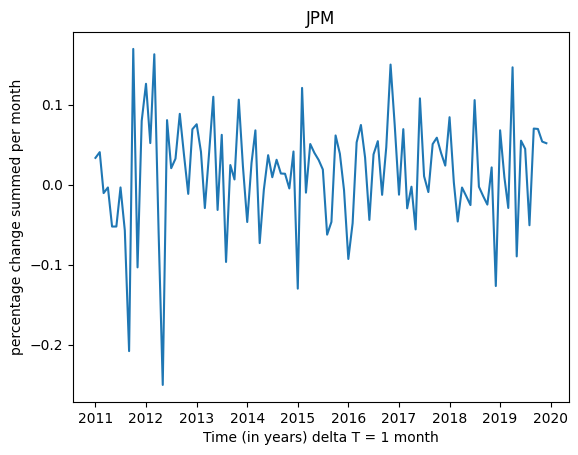

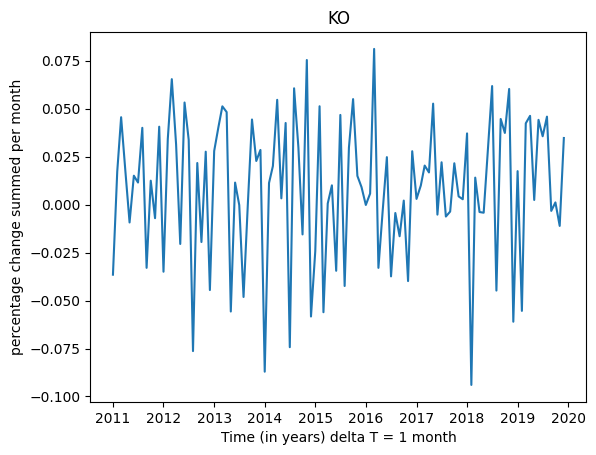

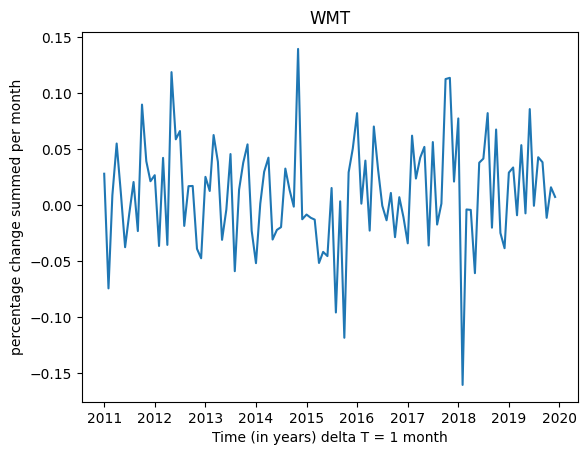

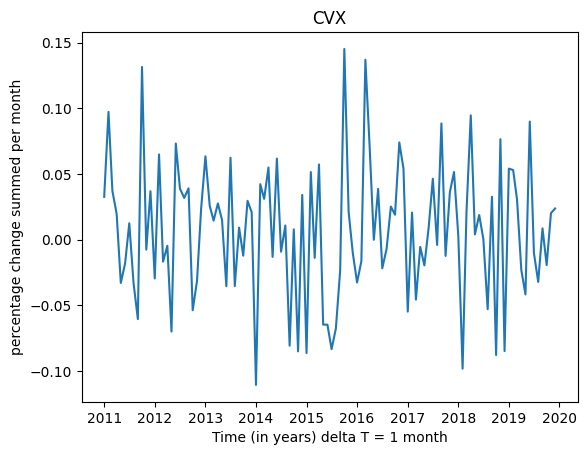

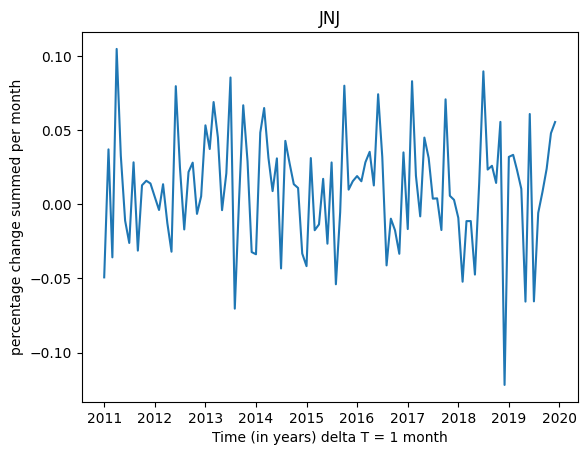

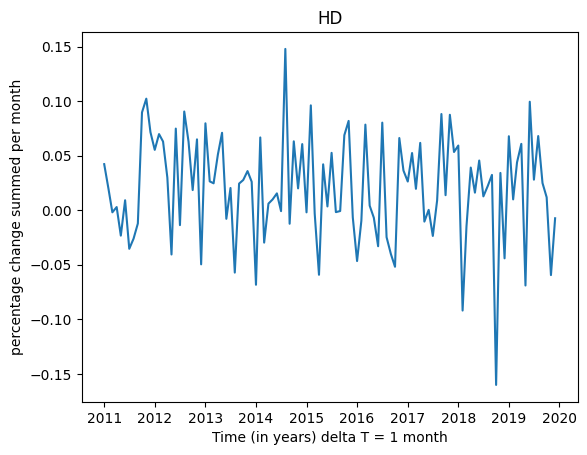

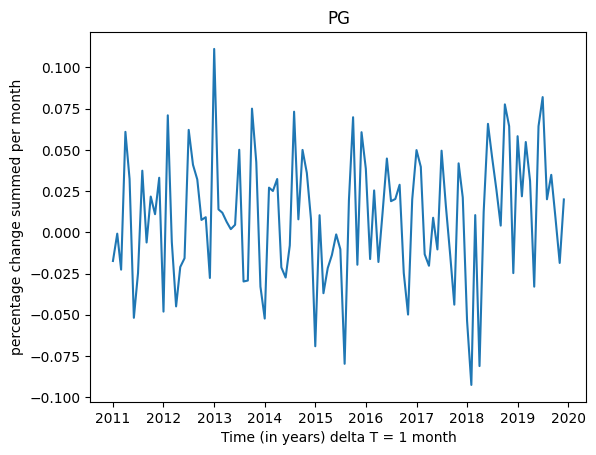

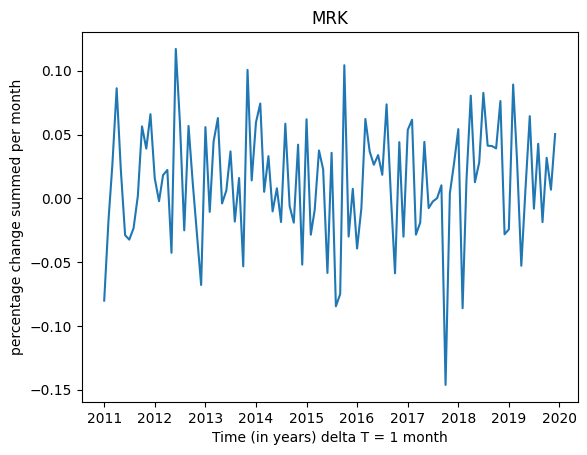

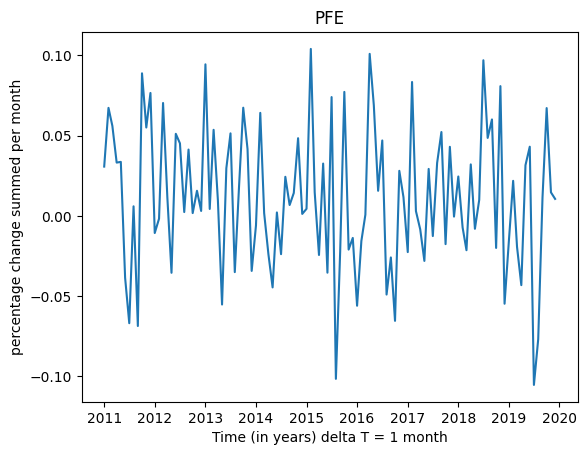

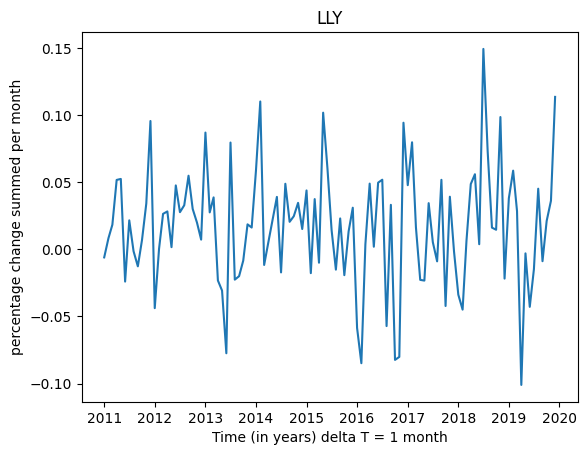

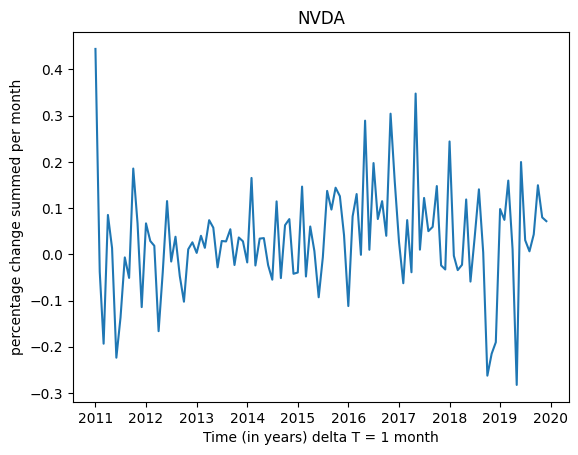

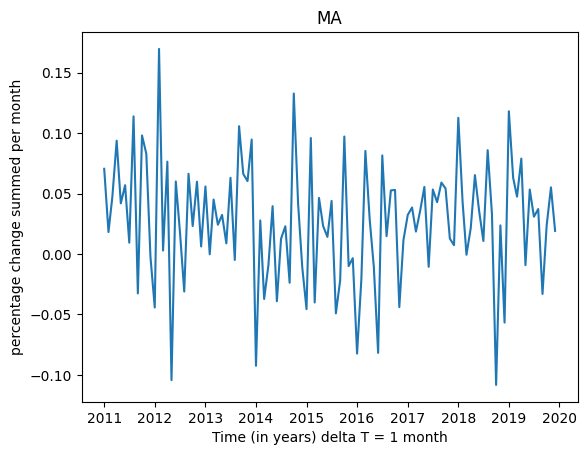

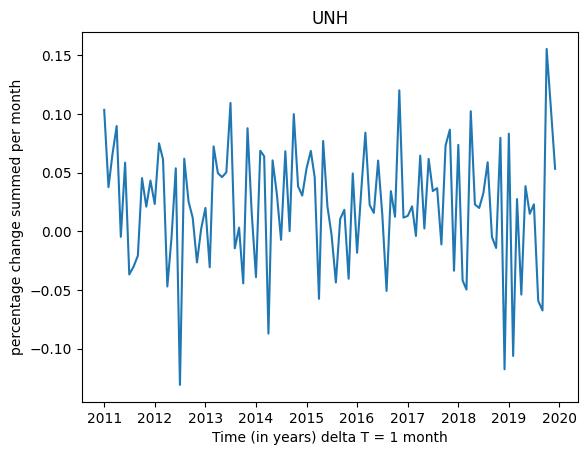

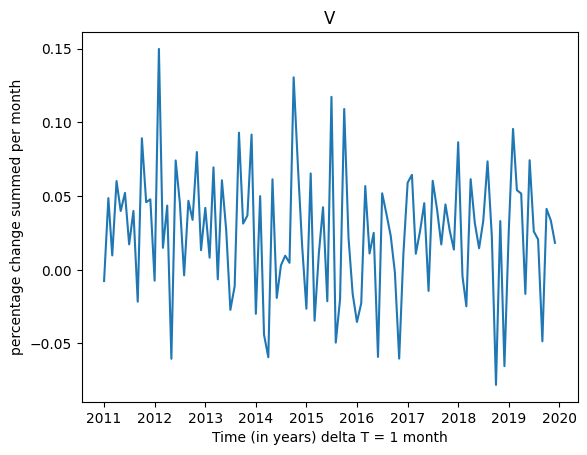

In [ ]:
for ticker in df_mean_per_month.columns:
    plt.title(str(ticker))
    plt.plot(df_summed_monthly[ticker])
    plt.xlabel('Time (in years) delta T = 1 month')
    plt.ylabel('percentage change summed per month')
    plt.show()


In [ ]:
df = df_mean_per_month

#checking if the timeseries are stationairy

Stationary_series =[]
Non_stationairy_series = []
#df.columns[:-1] cause we want to skip the date column
for variable in df.columns[:-1]:
    print(f"Output results augmented Dickey Fuller test for variable: {variable}")
    results_augmented_dickey_fuller = adfuller(df[variable])
    print('ADF Statistic: %f' % results_augmented_dickey_fuller[0])
    print('p-value: %f' % results_augmented_dickey_fuller[1])
    print('Critical Values:')
    for key, value in results_augmented_dickey_fuller[4].items():
        print('\t%s: %.3f' % (key, value))

    if results_augmented_dickey_fuller[1] <= 0.05:
        print("Conclusion: p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary")
        print('\n')
        Stationary_series.append(variable)
    else:
        print("Conclusion: p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary")
        print('\n')
        Non_stationairy_series.append(variable)
        
print(f'Stationary_series: {Stationary_series}, Non_stationairy_series: {Non_stationairy_series}')

Output results augmented Dickey Fuller test for variable: AAPL
ADF Statistic: -9.635734
p-value: 0.000000
Critical Values:
	1%: -3.493
	5%: -2.889
	10%: -2.581
Conclusion: p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary


Output results augmented Dickey Fuller test for variable: MSFT
ADF Statistic: -6.978284
p-value: 0.000000
Critical Values:
	1%: -3.495
	5%: -2.890
	10%: -2.582
Conclusion: p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary


Output results augmented Dickey Fuller test for variable: BAC
ADF Statistic: -10.581496
p-value: 0.000000
Critical Values:
	1%: -3.493
	5%: -2.889
	10%: -2.581
Conclusion: p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary


Output results augmented Dickey Fuller test for variable: AMZN
ADF Statistic: -11.894427
p-value: 0.000000
Critical Values:
	1%: -3.493
	5%: -2.889
	10%: -2.581
Conclusi

In [ ]:
Var_model = VAR(df_summed_monthly)

In [ ]:
Var_model.select_order(maxlags = 1).summary()

<class 'statsmodels.iolib.table.SimpleTable'>

The information criteria confirm that 0 lags is the right amount of lags to use

In [ ]:
Var_model_results = Var_model.fit(0)

In [ ]:
Var_model_results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 09, Dec, 2022
Time:                     23:07:29
--------------------------------------------------------------------
No. of Equations:         20.0000    BIC:                   -123.781
Nobs:                     108.000    HQIC:                  -124.077
Log likelihood:           3666.10    FPE:                1.06363e-54
AIC:                     -124.278    Det(Omega_mle):     8.84573e-55
--------------------------------------------------------------------
Results for equation AAPL
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         0.020915         0.007036            2.972           0.003

Results for equation MSFT
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------

In [ ]:
#results indicate significant residual auto correlation

Var_model_results.test_whiteness().summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [ ]:
#Normality looks okay

Var_model_results.test_normality().summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [ ]:
#testing for ARCH effects

residuals = Var_model_results.resid
print("Engle’s Test for Autoregressive Conditional Heteroscedasticity (ARCH)\n")
for var in residuals.columns:
    het_test_result= het_arch(residuals[var],nlags=0)

het_test_result

    # print(f'the Lagrange multiplier test of variable: {residuals.columns[var]} has test statistic: {het_test_result[0]} and has p-value: {het_test_result[1]}')
    # if het_test_result[1] <=0.05:
    #     print('found p-value < 0.05, so H0: no Autoregressive Conditional Heteroscedasticity is rejected\n')
    # else:
    #     print('found p-value > 0.05, so H0: no Autoregressive Conditional Heteroscedasticity is not rejected\n')

Engle’s Test for Autoregressive Conditional Heteroscedasticity (ARCH)



(1.199040866595169e-14, nan, nan, nan)

In [ ]:
Var_model_results.resid

AAPL      MSFT       BAC      AMZN      TSLA       XOM  \
Date                                                                     
2011-01-01  0.010050 -0.027296 -0.043302 -0.102284 -0.125666  0.076367   
2011-02-01  0.020935 -0.055923  0.029072 -0.001649 -0.033058  0.062001   
2011-03-01 -0.031422 -0.064724 -0.079067  0.016535  0.129904 -0.018045   
2011-04-01 -0.014995  0.001967 -0.094085  0.062478 -0.035078  0.042217   
2011-05-01 -0.026118 -0.048480 -0.056495 -0.017905  0.062745 -0.049247   
...              ...       ...       ...       ...       ...       ...   
2019-08-01 -0.031770 -0.001962 -0.117502 -0.071995 -0.096990 -0.070436   
2019-09-01  0.051356 -0.010601  0.053720 -0.046965  0.037724  0.027800   
2019-10-01  0.086303  0.012358  0.058202 -0.000959  0.253946 -0.045720   
2019-11-01  0.054809  0.037876  0.050588 -0.011116  0.015187  0.019096   
2019-12-01  0.067311  0.020465  0.046335  0.001385  0.198434  0.016866   

                 JPM        KO       WMT       CVX       JNJ        HD  \
Date                                                                     
2011-01-01  0.018065 -0.044865  0.017484  0.025214 -0.060454  0.021891   
2011-02-01  0.025254  0.008904 -0.085098  0.089895  0.025985 -0.000782   
2011-03-01 -0.025967  0.037224 -0.001818  0.029812 -0.046939 -0.022265   
2011-04-01 -0.018911  0.008899  0.044508  0.012097  0.093818 -0.017435   
2011-05-01 -0.067789 -0.017654  0.000643 -0.040409  0.021658 -0.043625   
...              ...       ...       ...       ...       ...       ...   
2019-08-01 -0.066170  0.037519  0.032244 -0.039645 -0.016959  0.047651   
2019-09-01  0.054735 -0.011615  0.027778  0.001197 -0.002626  0.004555   
2019-10-01  0.054241 -0.007196 -0.021974 -0.026779  0.012920 -0.008485   
2019-11-01  0.038420 -0.019441  0.005359  0.012746  0.036900 -0.079809   
2019-12-01  0.036412  0.026388 -0.003286  0.016337  0.044453 -0.027716   

                  PG       MRK       PFE       LLY      NVDA        MA  \
Date                                                                     
2011-01-01 -0.027007 -0.093106  0.018990 -0.022760  0.412022  0.043574   
2011-02-01 -0.010447 -0.030109  0.055555 -0.008364 -0.070232 -0.008741   
2011-03-01 -0.032258  0.013451  0.044316  0.001581 -0.225736  0.020581   
2011-04-01  0.051290  0.073348  0.021477  0.034931  0.052843  0.066838   
2011-05-01  0.022725  0.009639  0.021922  0.035676 -0.018801  0.014985   
...              ...       ...       ...       ...       ...       ...   
2019-08-01  0.010406  0.029870 -0.088483  0.028397 -0.025872  0.010284   
2019-09-01  0.025217 -0.031531 -0.000286 -0.025590  0.010823 -0.059956   
2019-10-01 -0.000475  0.018863  0.055426  0.004366  0.117105 -0.003285   
2019-11-01 -0.028201 -0.006146  0.002935  0.019402  0.047472  0.028218   
2019-12-01  0.010306  0.037491 -0.001127  0.096768  0.039384 -0.007776   

                 UNH         V  
Date                            
2011-01-01  0.081024 -0.032192  
2011-02-01  0.015106  0.024074  
2011-03-01  0.042526 -0.014800  
2011-04-01  0.067260  0.035683  
2011-05-01 -0.027249  0.015343  
...              ...       ...  
2019-08-01 -0.081755 -0.003929  
2019-09-01 -0.090019 -0.073111  
2019-10-01  0.132992  0.016793  
2019-11-01  0.081715  0.008851  
2019-12-01  0.030750 -0.006262  

[108 rows x 20 columns]

In [ ]:
Everything below was from my thesis

Everything below was from my thesis

In [ ]:
modelVAR.select_order(maxlags = 3).summary()

NameError: name 'modelVAR' is not defined

In [ ]:
results = modelVAR.fit(3)
results.summary()

In [ ]:
corr = df.corr()
corr
# corr.style.background_gradient(cmap='coolwarm')

In [ ]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson(residuals)

In [ ]:

from statsmodels.tsa.stattools import grangercausalitytests
maxlag=2
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df


df_1 = grangers_causation_matrix(df, variables = df.columns)  
df_1
